## Lib Imports and Environment Setup

In [1]:
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
import datetime

from unityagents import UnityEnvironment
from model import Actor, Critic
from ddpg_agent import Agent, OUNoise, ReplayBuffer

In [2]:
env = UnityEnvironment(file_name='C:/Users/adamb/OneDrive/Documents/Udacity Reinforcement Learning/4. Multi Agent Learning/Tennis_Windows_x86_64/Tennis')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
##Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
##Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [5]:
##Retrieve number of agents
num_agents = len(env_info.agents)

In [6]:
##Retrieve action size
action_size = brain.vector_action_space_size

In [7]:
##Retrieve state size
states = env_info.vector_observations
state_size = states.shape[1]

## Train Model

In [8]:
##Instanstiate Agent
agent = Agent(state_size=state_size, 
              action_size=action_size,
              random_seed=42,
              update_every=1)

In [9]:
##Define training loop
def ddpg(n_episodes=2000, max_t=1000, deque_len=100, print_every=100):
    
    scores_all = []
    scores_window = deque(maxlen=deque_len)
    scores_all_avg = []
    steps_taken = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            ##Determine next actions for both agents
            actions = agent.act(states)
            
            ##Execute Action
            env_info = env.step(actions)[brain_name]  
            
            ##Get Next State after Action
            next_states = env_info.vector_observations
            
            ##Get reward and done status from environment
            rewards = env_info.rewards
            #print(rewards)
            dones = env_info.local_done  
            
            ##Update Agent
            for a in range(num_agents):
                agent.step(states[a], actions[a], rewards[a], next_states[a], dones[a])
            
            ##Update Scores and state
            scores += rewards  
            states = next_states  
            
            ##End episode if done
            if any(dones):
                steps_taken.append(t)
                break
            
        print(datetime.datetime.now())
        print('Scores: ' + str(scores))
        
        scores_window.append(scores)
        scores_all.append(scores)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        scores_all_avg.append(np.mean(scores_window))
        print()
        
    return scores_all, scores_all_avg, steps_taken

In [10]:
##Execute Training
scores, scores_avg, steps_taken = ddpg(n_episodes = 20000, max_t = 2000, deque_len = 100, print_every=100)

C:\Users\adamb\Anaconda3\envs\testenv4\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


2019-12-31 19:51:05.809737
Scores: [ 0.   -0.01]
Episode 1	Average Score: -0.00
2019-12-31 19:51:06.877736
Scores: [ 0.   -0.01]
Episode 2	Average Score: -0.00
2019-12-31 19:51:06.911739
Scores: [ 0.   -0.01]
Episode 3	Average Score: -0.00
2019-12-31 19:51:06.944735
Scores: [ 0.   -0.01]
Episode 4	Average Score: -0.00
2019-12-31 19:51:06.978313
Scores: [ 0.   -0.01]
Episode 5	Average Score: -0.00
2019-12-31 19:51:07.013516
Scores: [-0.01  0.  ]
Episode 6	Average Score: -0.00
2019-12-31 19:51:07.047022
Scores: [ 0.   -0.01]
Episode 7	Average Score: -0.00
2019-12-31 19:51:07.079535
Scores: [-0.01  0.  ]
Episode 8	Average Score: -0.00
2019-12-31 19:51:07.122588
Scores: [ 0.   -0.01]
Episode 9	Average Score: -0.00
2019-12-31 19:51:07.156570
Scores: [ 0.   -0.01]
Episode 10	Average Score: -0.00
2019-12-31 19:51:07.190572
Scores: [ 0.   -0.01]
Episode 11	Average Score: -0.00
2019-12-31 19:51:07.223570
Scores: [ 0.   -0.01]
Episode 12	Average Score: -0.00
2019-12-31 19:51:07.255571
Scores: [ 

2019-12-31 19:52:03.807627
Scores: [ 0.   -0.01]
Episode 103	Average Score: -0.00
2019-12-31 19:52:04.475626
Scores: [ 0.   -0.01]
Episode 104	Average Score: -0.00
2019-12-31 19:52:05.120667
Scores: [-0.01  0.  ]
Episode 105	Average Score: -0.00
2019-12-31 19:52:05.749666
Scores: [-0.01  0.  ]
Episode 106	Average Score: -0.00
2019-12-31 19:52:06.387677
Scores: [ 0.   -0.01]
Episode 107	Average Score: -0.00
2019-12-31 19:52:07.017701
Scores: [ 0.   -0.01]
Episode 108	Average Score: -0.00
2019-12-31 19:52:07.725703
Scores: [ 0.   -0.01]
Episode 109	Average Score: -0.00
2019-12-31 19:52:08.385243
Scores: [-0.01  0.  ]
Episode 110	Average Score: -0.00
2019-12-31 19:52:09.015275
Scores: [ 0.   -0.01]
Episode 111	Average Score: -0.00
2019-12-31 19:52:09.668273
Scores: [-0.01  0.  ]
Episode 112	Average Score: -0.00
2019-12-31 19:52:10.312276
Scores: [ 0.   -0.01]
Episode 113	Average Score: -0.00
2019-12-31 19:52:11.012272
Scores: [-0.01  0.  ]
Episode 114	Average Score: -0.00
2019-12-31 19:52

2019-12-31 19:53:10.395896
Scores: [ 0.   -0.01]
Episode 203	Average Score: -0.00
2019-12-31 19:53:11.033309
Scores: [-0.01  0.  ]
Episode 204	Average Score: -0.00
2019-12-31 19:53:12.479000
Scores: [0.   0.09]
Episode 205	Average Score: -0.00
2019-12-31 19:53:13.119974
Scores: [ 0.   -0.01]
Episode 206	Average Score: -0.00
2019-12-31 19:53:13.808973
Scores: [ 0.   -0.01]
Episode 207	Average Score: -0.00
2019-12-31 19:53:14.462005
Scores: [-0.01  0.  ]
Episode 208	Average Score: -0.00
2019-12-31 19:53:15.108001
Scores: [ 0.   -0.01]
Episode 209	Average Score: -0.00
2019-12-31 19:53:15.742577
Scores: [-0.01  0.  ]
Episode 210	Average Score: -0.00
2019-12-31 19:53:16.408206
Scores: [-0.01  0.  ]
Episode 211	Average Score: -0.00
2019-12-31 19:53:17.109750
Scores: [ 0.   -0.01]
Episode 212	Average Score: -0.00
2019-12-31 19:53:17.766854
Scores: [ 0.   -0.01]
Episode 213	Average Score: -0.00
2019-12-31 19:53:18.419941
Scores: [ 0.   -0.01]
Episode 214	Average Score: -0.00
2019-12-31 19:53:1

2019-12-31 19:54:25.624051
Scores: [-0.01  0.  ]
Episode 304	Average Score: 0.01
2019-12-31 19:54:26.323050
Scores: [-0.01  0.  ]
Episode 305	Average Score: 0.01
2019-12-31 19:54:26.974895
Scores: [ 0.   -0.01]
Episode 306	Average Score: 0.01
2019-12-31 19:54:27.614892
Scores: [ 0.   -0.01]
Episode 307	Average Score: 0.01
2019-12-31 19:54:28.250918
Scores: [-0.01  0.  ]
Episode 308	Average Score: 0.01
2019-12-31 19:54:28.891919
Scores: [-0.01  0.  ]
Episode 309	Average Score: 0.01
2019-12-31 19:54:29.600918
Scores: [ 0.   -0.01]
Episode 310	Average Score: 0.01
2019-12-31 19:54:30.242836
Scores: [ 0.   -0.01]
Episode 311	Average Score: 0.01
2019-12-31 19:54:30.890876
Scores: [-0.01  0.  ]
Episode 312	Average Score: 0.01
2019-12-31 19:54:31.536910
Scores: [-0.01  0.  ]
Episode 313	Average Score: 0.01
2019-12-31 19:54:32.190909
Scores: [-0.01  0.  ]
Episode 314	Average Score: 0.01
2019-12-31 19:54:32.875910
Scores: [-0.01  0.  ]
Episode 315	Average Score: 0.00
2019-12-31 19:54:33.522911
S

2019-12-31 19:55:36.304072
Scores: [ 0.   -0.01]
Episode 405	Average Score: -0.00
2019-12-31 19:55:36.965086
Scores: [ 0.   -0.01]
Episode 406	Average Score: -0.00
2019-12-31 19:55:37.586109
Scores: [ 0.   -0.01]
Episode 407	Average Score: -0.00
2019-12-31 19:55:38.275110
Scores: [ 0.   -0.01]
Episode 408	Average Score: -0.00
2019-12-31 19:55:38.914086
Scores: [-0.01  0.  ]
Episode 409	Average Score: -0.00
2019-12-31 19:55:39.542680
Scores: [ 0.   -0.01]
Episode 410	Average Score: -0.00
2019-12-31 19:55:40.186676
Scores: [ 0.   -0.01]
Episode 411	Average Score: -0.00
2019-12-31 19:55:40.831712
Scores: [-0.01  0.  ]
Episode 412	Average Score: -0.00
2019-12-31 19:55:41.508684
Scores: [ 0.   -0.01]
Episode 413	Average Score: -0.00
2019-12-31 19:55:42.156755
Scores: [-0.01  0.  ]
Episode 414	Average Score: -0.00
2019-12-31 19:55:42.797751
Scores: [ 0.   -0.01]
Episode 415	Average Score: -0.00
2019-12-31 19:55:43.442318
Scores: [ 0.   -0.01]
Episode 416	Average Score: -0.00
2019-12-31 19:55

2019-12-31 19:56:55.665555
Scores: [ 0.1  -0.01]
Episode 506	Average Score: 0.02
2019-12-31 19:56:56.755099
Scores: [-0.01  0.1 ]
Episode 507	Average Score: 0.02
2019-12-31 19:56:58.197647
Scores: [0.   0.09]
Episode 508	Average Score: 0.02
2019-12-31 19:56:59.600649
Scores: [0.   0.09]
Episode 509	Average Score: 0.02
2019-12-31 19:57:00.960810
Scores: [0.   0.09]
Episode 510	Average Score: 0.03
2019-12-31 19:57:02.362320
Scores: [0.   0.09]
Episode 511	Average Score: 0.03
2019-12-31 19:57:03.759322
Scores: [ 0.1  -0.01]
Episode 512	Average Score: 0.03
2019-12-31 19:57:05.192321
Scores: [0.   0.09]
Episode 513	Average Score: 0.03
2019-12-31 19:57:05.815321
Scores: [-0.01  0.  ]
Episode 514	Average Score: 0.03
2019-12-31 19:57:07.185323
Scores: [0.   0.09]
Episode 515	Average Score: 0.03
2019-12-31 19:57:07.866349
Scores: [ 0.   -0.01]
Episode 516	Average Score: 0.03
2019-12-31 19:57:09.157187
Scores: [-0.01  0.  ]
Episode 517	Average Score: 0.02
2019-12-31 19:57:10.043217
Scores: [-0.0

2019-12-31 19:58:50.366376
Scores: [ 0.   -0.01]
Episode 608	Average Score: 0.03
2019-12-31 19:58:51.572376
Scores: [-0.01  0.  ]
Episode 609	Average Score: 0.03
2019-12-31 19:58:52.970351
Scores: [ 0.1  -0.01]
Episode 610	Average Score: 0.03
2019-12-31 19:58:54.344121
Scores: [0.   0.09]
Episode 611	Average Score: 0.03
2019-12-31 19:58:54.944328
Scores: [-0.01  0.  ]
Episode 612	Average Score: 0.03
2019-12-31 19:58:56.385010
Scores: [ 0.1  -0.01]
Episode 613	Average Score: 0.03
2019-12-31 19:58:57.011041
Scores: [-0.01  0.  ]
Episode 614	Average Score: 0.03
2019-12-31 19:58:57.893093
Scores: [ 0.   -0.01]
Episode 615	Average Score: 0.03
2019-12-31 19:58:59.282042
Scores: [ 0.1  -0.01]
Episode 616	Average Score: 0.03
2019-12-31 19:58:59.997041
Scores: [ 0.   -0.01]
Episode 617	Average Score: 0.02
2019-12-31 19:59:00.839377
Scores: [ 0.   -0.01]
Episode 618	Average Score: 0.02
2019-12-31 19:59:02.291935
Scores: [0.   0.09]
Episode 619	Average Score: 0.02
2019-12-31 19:59:03.757795
Score

2019-12-31 20:01:08.628181
Scores: [0.   0.09]
Episode 711	Average Score: 0.05
2019-12-31 20:01:10.018317
Scores: [ 0.1  -0.01]
Episode 712	Average Score: 0.05
2019-12-31 20:01:11.418578
Scores: [0.   0.09]
Episode 713	Average Score: 0.05
2019-12-31 20:01:13.659526
Scores: [0.19000001 0.        ]
Episode 714	Average Score: 0.06
2019-12-31 20:01:16.553694
Scores: [0.1  0.09]
Episode 715	Average Score: 0.06
2019-12-31 20:01:17.993975
Scores: [0.   0.09]
Episode 716	Average Score: 0.06
2019-12-31 20:01:19.466457
Scores: [ 0.1  -0.01]
Episode 717	Average Score: 0.06
2019-12-31 20:01:23.203124
Scores: [0.1  0.19]
Episode 718	Average Score: 0.06
2019-12-31 20:01:24.652124
Scores: [0.   0.09]
Episode 719	Average Score: 0.06
2019-12-31 20:01:27.508900
Scores: [0.1  0.09]
Episode 720	Average Score: 0.06
2019-12-31 20:01:29.004211
Scores: [-0.01  0.1 ]
Episode 721	Average Score: 0.06
2019-12-31 20:01:30.878301
Scores: [0.1  0.09]
Episode 722	Average Score: 0.06
2019-12-31 20:01:32.336951
Scores:

2019-12-31 20:03:45.782906
Scores: [ 0.   -0.01]
Episode 814	Average Score: 0.04
2019-12-31 20:03:47.274412
Scores: [ 0.1  -0.01]
Episode 815	Average Score: 0.04
2019-12-31 20:03:48.695430
Scores: [ 0.1  -0.01]
Episode 816	Average Score: 0.04
2019-12-31 20:03:49.345430
Scores: [-0.01  0.  ]
Episode 817	Average Score: 0.04
2019-12-31 20:03:50.774430
Scores: [0.   0.09]
Episode 818	Average Score: 0.04
2019-12-31 20:03:52.167467
Scores: [-0.01  0.  ]
Episode 819	Average Score: 0.03
2019-12-31 20:03:52.884153
Scores: [-0.01  0.  ]
Episode 820	Average Score: 0.03
2019-12-31 20:03:54.335152
Scores: [ 0.1  -0.01]
Episode 821	Average Score: 0.03
2019-12-31 20:03:55.741331
Scores: [ 0.1  -0.01]
Episode 822	Average Score: 0.03
2019-12-31 20:03:57.176552
Scores: [ 0.1  -0.01]
Episode 823	Average Score: 0.03
2019-12-31 20:03:58.559563
Scores: [-0.01  0.  ]
Episode 824	Average Score: 0.03
2019-12-31 20:03:59.977588
Scores: [0.   0.09]
Episode 825	Average Score: 0.03
2019-12-31 20:04:01.429699
Score

2019-12-31 20:06:15.020995
Scores: [0.   0.09]
Episode 916	Average Score: 0.05
2019-12-31 20:06:16.462029
Scores: [ 0.1  -0.01]
Episode 917	Average Score: 0.05
2019-12-31 20:06:18.467142
Scores: [-0.01  0.1 ]
Episode 918	Average Score: 0.05
2019-12-31 20:06:19.894144
Scores: [ 0.1  -0.01]
Episode 919	Average Score: 0.04
2019-12-31 20:06:22.238755
Scores: [0.09 0.1 ]
Episode 920	Average Score: 0.04
2019-12-31 20:06:23.677765
Scores: [ 0.1  -0.01]
Episode 921	Average Score: 0.04
2019-12-31 20:06:24.341463
Scores: [-0.01  0.  ]
Episode 922	Average Score: 0.04
2019-12-31 20:06:25.772061
Scores: [ 0.1  -0.01]
Episode 923	Average Score: 0.04
2019-12-31 20:06:27.232390
Scores: [0.   0.09]
Episode 924	Average Score: 0.04
2019-12-31 20:06:28.596003
Scores: [ 0.1  -0.01]
Episode 925	Average Score: 0.04
2019-12-31 20:06:29.262132
Scores: [ 0.   -0.01]
Episode 926	Average Score: 0.04
2019-12-31 20:06:30.706124
Scores: [ 0.1  -0.01]
Episode 927	Average Score: 0.04
2019-12-31 20:06:32.137169
Scores:

2019-12-31 20:08:46.898821
Scores: [ 0.1  -0.01]
Episode 1018	Average Score: 0.04
2019-12-31 20:08:47.606975
Scores: [-0.01  0.  ]
Episode 1019	Average Score: 0.03
2019-12-31 20:08:50.579009
Scores: [0.1  0.09]
Episode 1020	Average Score: 0.04
2019-12-31 20:08:51.976038
Scores: [ 0.1  -0.01]
Episode 1021	Average Score: 0.04
2019-12-31 20:08:53.410036
Scores: [ 0.1  -0.01]
Episode 1022	Average Score: 0.04
2019-12-31 20:08:54.840574
Scores: [-0.01  0.1 ]
Episode 1023	Average Score: 0.04
2019-12-31 20:08:56.265601
Scores: [-0.01  0.1 ]
Episode 1024	Average Score: 0.04
2019-12-31 20:08:57.719531
Scores: [ 0.1  -0.01]
Episode 1025	Average Score: 0.04
2019-12-31 20:08:58.390776
Scores: [-0.01  0.  ]
Episode 1026	Average Score: 0.04
2019-12-31 20:09:01.296395
Scores: [-0.01  0.1 ]
Episode 1027	Average Score: 0.04
2019-12-31 20:09:04.049304
Scores: [ 0.1  -0.01]
Episode 1028	Average Score: 0.04
2019-12-31 20:09:06.523348
Scores: [-0.01  0.1 ]
Episode 1029	Average Score: 0.04
2019-12-31 20:09:0

2019-12-31 20:11:21.189172
Scores: [ 0.1  -0.01]
Episode 1119	Average Score: 0.03
2019-12-31 20:11:22.692328
Scores: [0.   0.09]
Episode 1120	Average Score: 0.03
2019-12-31 20:11:24.093085
Scores: [-0.01  0.1 ]
Episode 1121	Average Score: 0.03
2019-12-31 20:11:24.813100
Scores: [ 0.   -0.01]
Episode 1122	Average Score: 0.03
2019-12-31 20:11:26.266061
Scores: [ 0.1  -0.01]
Episode 1123	Average Score: 0.03
2019-12-31 20:11:27.702094
Scores: [ 0.1  -0.01]
Episode 1124	Average Score: 0.03
2019-12-31 20:11:30.999878
Scores: [0.09 0.1 ]
Episode 1125	Average Score: 0.04
2019-12-31 20:11:32.459429
Scores: [ 0.1  -0.01]
Episode 1126	Average Score: 0.04
2019-12-31 20:11:33.224456
Scores: [ 0.   -0.01]
Episode 1127	Average Score: 0.04
2019-12-31 20:11:34.675053
Scores: [0.   0.09]
Episode 1128	Average Score: 0.04
2019-12-31 20:11:35.337238
Scores: [-0.01  0.  ]
Episode 1129	Average Score: 0.04
2019-12-31 20:11:36.773546
Scores: [ 0.1  -0.01]
Episode 1130	Average Score: 0.04
2019-12-31 20:11:39.50

2019-12-31 20:13:35.983009
Scores: [-0.01  0.1 ]
Episode 1220	Average Score: 0.04
2019-12-31 20:13:37.350574
Scores: [ 0.1  -0.01]
Episode 1221	Average Score: 0.04
2019-12-31 20:13:38.778575
Scores: [0.   0.09]
Episode 1222	Average Score: 0.04
2019-12-31 20:13:40.262575
Scores: [0.   0.09]
Episode 1223	Average Score: 0.05
2019-12-31 20:13:41.704153
Scores: [ 0.1  -0.01]
Episode 1224	Average Score: 0.05
2019-12-31 20:13:42.414153
Scores: [-0.01  0.  ]
Episode 1225	Average Score: 0.04
2019-12-31 20:13:43.785332
Scores: [ 0.1  -0.01]
Episode 1226	Average Score: 0.04
2019-12-31 20:13:47.059299
Scores: [0.1  0.19]
Episode 1227	Average Score: 0.05
2019-12-31 20:13:49.093625
Scores: [-0.01  0.1 ]
Episode 1228	Average Score: 0.05
2019-12-31 20:13:51.505269
Scores: [-0.01  0.1 ]
Episode 1229	Average Score: 0.05
2019-12-31 20:13:53.931902
Scores: [0.09 0.1 ]
Episode 1230	Average Score: 0.05
2019-12-31 20:13:56.265937
Scores: [0.1  0.09]
Episode 1231	Average Score: 0.05
2019-12-31 20:13:59.865024

2019-12-31 20:16:23.124375
Scores: [0.   0.09]
Episode 1321	Average Score: 0.04
2019-12-31 20:16:24.652379
Scores: [0.   0.09]
Episode 1322	Average Score: 0.04
2019-12-31 20:16:25.242363
Scores: [ 0.   -0.01]
Episode 1323	Average Score: 0.04
2019-12-31 20:16:26.752568
Scores: [ 0.1  -0.01]
Episode 1324	Average Score: 0.04
2019-12-31 20:16:28.080247
Scores: [ 0.1  -0.01]
Episode 1325	Average Score: 0.04
2019-12-31 20:16:30.215222
Scores: [0.1  0.09]
Episode 1326	Average Score: 0.04
2019-12-31 20:16:30.849220
Scores: [-0.01  0.  ]
Episode 1327	Average Score: 0.04
2019-12-31 20:16:32.280247
Scores: [ 0.1  -0.01]
Episode 1328	Average Score: 0.04
2019-12-31 20:16:33.682250
Scores: [ 0.1  -0.01]
Episode 1329	Average Score: 0.04
2019-12-31 20:16:34.370248
Scores: [-0.01  0.  ]
Episode 1330	Average Score: 0.04
2019-12-31 20:16:35.023221
Scores: [-0.01  0.  ]
Episode 1331	Average Score: 0.04
2019-12-31 20:16:36.457375
Scores: [-0.01  0.1 ]
Episode 1332	Average Score: 0.04
2019-12-31 20:16:37.92

2019-12-31 20:18:53.594582
Scores: [-0.01  0.  ]
Episode 1422	Average Score: 0.04
2019-12-31 20:18:54.355583
Scores: [ 0.   -0.01]
Episode 1423	Average Score: 0.03
2019-12-31 20:18:55.787582
Scores: [0.   0.09]
Episode 1424	Average Score: 0.04
2019-12-31 20:18:57.239062
Scores: [ 0.1  -0.01]
Episode 1425	Average Score: 0.03
2019-12-31 20:18:57.906660
Scores: [-0.01  0.  ]
Episode 1426	Average Score: 0.03
2019-12-31 20:18:58.612662
Scores: [ 0.   -0.01]
Episode 1427	Average Score: 0.03
2019-12-31 20:19:01.616940
Scores: [0.1  0.09]
Episode 1428	Average Score: 0.03
2019-12-31 20:19:04.270939
Scores: [0.1  0.09]
Episode 1429	Average Score: 0.04
2019-12-31 20:19:05.039946
Scores: [-0.01  0.  ]
Episode 1430	Average Score: 0.03
2019-12-31 20:19:05.722944
Scores: [-0.01  0.  ]
Episode 1431	Average Score: 0.03
2019-12-31 20:19:07.173913
Scores: [0.   0.09]
Episode 1432	Average Score: 0.04
2019-12-31 20:19:09.617532
Scores: [0.09 0.1 ]
Episode 1433	Average Score: 0.04
2019-12-31 20:19:11.166531

2019-12-31 20:21:05.850511
Scores: [-0.01  0.1 ]
Episode 1523	Average Score: 0.03
2019-12-31 20:21:07.223514
Scores: [ 0.1  -0.01]
Episode 1524	Average Score: 0.03
2019-12-31 20:21:08.606488
Scores: [ 0.   -0.01]
Episode 1525	Average Score: 0.03
2019-12-31 20:21:10.030518
Scores: [ 0.1  -0.01]
Episode 1526	Average Score: 0.03
2019-12-31 20:21:10.718514
Scores: [ 0.   -0.01]
Episode 1527	Average Score: 0.03
2019-12-31 20:21:11.795527
Scores: [ 0.   -0.01]
Episode 1528	Average Score: 0.03
2019-12-31 20:21:12.514550
Scores: [-0.01  0.  ]
Episode 1529	Average Score: 0.03
2019-12-31 20:21:13.994354
Scores: [ 0.1  -0.01]
Episode 1530	Average Score: 0.03
2019-12-31 20:21:15.224327
Scores: [ 0.1  -0.01]
Episode 1531	Average Score: 0.03
2019-12-31 20:21:17.659197
Scores: [0.09 0.1 ]
Episode 1532	Average Score: 0.03
2019-12-31 20:21:21.123275
Scores: [0.09 0.1 ]
Episode 1533	Average Score: 0.04
2019-12-31 20:21:24.100704
Scores: [0.1  0.09]
Episode 1534	Average Score: 0.04
2019-12-31 20:21:25.00

2019-12-31 20:23:59.207939
Scores: [ 0.1  -0.01]
Episode 1624	Average Score: 0.04
2019-12-31 20:24:00.606514
Scores: [-0.01  0.1 ]
Episode 1625	Average Score: 0.04
2019-12-31 20:24:02.080663
Scores: [ 0.1  -0.01]
Episode 1626	Average Score: 0.04
2019-12-31 20:24:02.791659
Scores: [-0.01  0.  ]
Episode 1627	Average Score: 0.04
2019-12-31 20:24:04.278282
Scores: [0.   0.09]
Episode 1628	Average Score: 0.04
2019-12-31 20:24:05.065863
Scores: [ 0.   -0.01]
Episode 1629	Average Score: 0.04
2019-12-31 20:24:07.387812
Scores: [-0.01  0.1 ]
Episode 1630	Average Score: 0.04
2019-12-31 20:24:08.757818
Scores: [-0.01  0.1 ]
Episode 1631	Average Score: 0.04
2019-12-31 20:24:10.178881
Scores: [-0.01  0.1 ]
Episode 1632	Average Score: 0.04
2019-12-31 20:24:11.574118
Scores: [-0.01  0.1 ]
Episode 1633	Average Score: 0.04
2019-12-31 20:24:14.588274
Scores: [0.1  0.09]
Episode 1634	Average Score: 0.05
2019-12-31 20:24:16.914498
Scores: [ 0.1  -0.01]
Episode 1635	Average Score: 0.05
2019-12-31 20:24:18.

2019-12-31 20:27:01.201633
Scores: [ 0.1  -0.01]
Episode 1725	Average Score: 0.06
2019-12-31 20:27:02.580842
Scores: [ 0.1  -0.01]
Episode 1726	Average Score: 0.06
2019-12-31 20:27:07.317418
Scores: [0.1  0.19]
Episode 1727	Average Score: 0.06
2019-12-31 20:27:08.147413
Scores: [-0.01  0.  ]
Episode 1728	Average Score: 0.06
2019-12-31 20:27:09.679417
Scores: [ 0.1  -0.01]
Episode 1729	Average Score: 0.06
2019-12-31 20:27:11.073988
Scores: [-0.01  0.1 ]
Episode 1730	Average Score: 0.06
2019-12-31 20:27:13.949544
Scores: [0.09 0.1 ]
Episode 1731	Average Score: 0.06
2019-12-31 20:27:15.474370
Scores: [-0.01  0.1 ]
Episode 1732	Average Score: 0.06
2019-12-31 20:27:18.318393
Scores: [ 0.1  -0.01]
Episode 1733	Average Score: 0.06
2019-12-31 20:27:20.804716
Scores: [ 0.1  -0.01]
Episode 1734	Average Score: 0.06
2019-12-31 20:27:22.227329
Scores: [ 0.1  -0.01]
Episode 1735	Average Score: 0.06
2019-12-31 20:27:23.716362
Scores: [0.   0.09]
Episode 1736	Average Score: 0.05
2019-12-31 20:27:25.14

2019-12-31 20:29:49.149415
Scores: [ 0.1  -0.01]
Episode 1826	Average Score: 0.03
2019-12-31 20:29:50.353475
Scores: [-0.01  0.  ]
Episode 1827	Average Score: 0.03
2019-12-31 20:29:51.766310
Scores: [ 0.1  -0.01]
Episode 1828	Average Score: 0.03
2019-12-31 20:29:53.164308
Scores: [0.   0.09]
Episode 1829	Average Score: 0.03
2019-12-31 20:29:54.859035
Scores: [-0.01  0.  ]
Episode 1830	Average Score: 0.03
2019-12-31 20:29:55.545189
Scores: [-0.01  0.  ]
Episode 1831	Average Score: 0.03
2019-12-31 20:29:56.986904
Scores: [0.   0.09]
Episode 1832	Average Score: 0.03
2019-12-31 20:29:57.694471
Scores: [ 0.   -0.01]
Episode 1833	Average Score: 0.03
2019-12-31 20:29:58.996425
Scores: [0.09 0.  ]
Episode 1834	Average Score: 0.03
2019-12-31 20:29:59.654835
Scores: [-0.01  0.  ]
Episode 1835	Average Score: 0.03
2019-12-31 20:30:01.098156
Scores: [ 0.1  -0.01]
Episode 1836	Average Score: 0.03
2019-12-31 20:30:03.034785
Scores: [ 0.1  -0.01]
Episode 1837	Average Score: 0.03
2019-12-31 20:30:03.72

2019-12-31 20:32:04.977396
Scores: [0.   0.09]
Episode 1927	Average Score: 0.03
2019-12-31 20:32:05.660368
Scores: [ 0.   -0.01]
Episode 1928	Average Score: 0.03
2019-12-31 20:32:06.274369
Scores: [-0.01  0.  ]
Episode 1929	Average Score: 0.03
2019-12-31 20:32:07.727368
Scores: [ 0.1  -0.01]
Episode 1930	Average Score: 0.03
2019-12-31 20:32:09.178393
Scores: [ 0.1  -0.01]
Episode 1931	Average Score: 0.03
2019-12-31 20:32:10.625230
Scores: [0.   0.09]
Episode 1932	Average Score: 0.03
2019-12-31 20:32:12.038847
Scores: [0.   0.09]
Episode 1933	Average Score: 0.03
2019-12-31 20:32:13.466894
Scores: [0.   0.09]
Episode 1934	Average Score: 0.03
2019-12-31 20:32:14.924456
Scores: [0.   0.09]
Episode 1935	Average Score: 0.03
2019-12-31 20:32:16.352432
Scores: [0.   0.09]
Episode 1936	Average Score: 0.03
2019-12-31 20:32:19.006109
Scores: [0.09 0.1 ]
Episode 1937	Average Score: 0.04
2019-12-31 20:32:20.259648
Scores: [-0.01  0.  ]
Episode 1938	Average Score: 0.04
2019-12-31 20:32:20.962931
Sco

2019-12-31 20:35:23.114867
Scores: [0.   0.09]
Episode 2029	Average Score: 0.06
2019-12-31 20:35:23.849896
Scores: [ 0.   -0.01]
Episode 2030	Average Score: 0.06
2019-12-31 20:35:26.338972
Scores: [0.1  0.09]
Episode 2031	Average Score: 0.06
2019-12-31 20:35:27.845466
Scores: [0.   0.09]
Episode 2032	Average Score: 0.06
2019-12-31 20:35:30.378963
Scores: [0.09 0.1 ]
Episode 2033	Average Score: 0.06
2019-12-31 20:35:31.913964
Scores: [ 0.1  -0.01]
Episode 2034	Average Score: 0.06
2019-12-31 20:35:35.441965
Scores: [0.1  0.09]
Episode 2035	Average Score: 0.06
2019-12-31 20:35:36.932992
Scores: [ 0.1  -0.01]
Episode 2036	Average Score: 0.06
2019-12-31 20:35:38.743993
Scores: [-0.01  0.1 ]
Episode 2037	Average Score: 0.06
2019-12-31 20:35:41.276038
Scores: [0.1  0.09]
Episode 2038	Average Score: 0.06
2019-12-31 20:35:42.073038
Scores: [-0.01  0.  ]
Episode 2039	Average Score: 0.06
2019-12-31 20:35:43.541876
Scores: [0.   0.09]
Episode 2040	Average Score: 0.06
2019-12-31 20:35:45.030054
Sco

2019-12-31 20:38:15.858566
Scores: [-0.01  0.1 ]
Episode 2130	Average Score: 0.05
2019-12-31 20:38:17.290553
Scores: [0.   0.09]
Episode 2131	Average Score: 0.05
2019-12-31 20:38:18.594878
Scores: [-0.01  0.  ]
Episode 2132	Average Score: 0.04
2019-12-31 20:38:21.734949
Scores: [0.1  0.19]
Episode 2133	Average Score: 0.05
2019-12-31 20:38:22.645949
Scores: [ 0.   -0.01]
Episode 2134	Average Score: 0.05
2019-12-31 20:38:24.103303
Scores: [-0.01  0.1 ]
Episode 2135	Average Score: 0.05
2019-12-31 20:38:25.556336
Scores: [ 0.1  -0.01]
Episode 2136	Average Score: 0.05
2019-12-31 20:38:28.059310
Scores: [0.09 0.1 ]
Episode 2137	Average Score: 0.05
2019-12-31 20:38:29.523138
Scores: [ 0.1  -0.01]
Episode 2138	Average Score: 0.05
2019-12-31 20:38:30.938215
Scores: [0.   0.09]
Episode 2139	Average Score: 0.05
2019-12-31 20:38:33.852781
Scores: [ 0.2  -0.01]
Episode 2140	Average Score: 0.05
2019-12-31 20:38:36.941621
Scores: [0.1  0.09]
Episode 2141	Average Score: 0.05
2019-12-31 20:38:38.453642

2019-12-31 20:41:02.719018
Scores: [-0.01  0.1 ]
Episode 2231	Average Score: 0.05
2019-12-31 20:41:04.202018
Scores: [ 0.1  -0.01]
Episode 2232	Average Score: 0.05
2019-12-31 20:41:06.296903
Scores: [0.   0.09]
Episode 2233	Average Score: 0.04
2019-12-31 20:41:07.769904
Scores: [-0.01  0.1 ]
Episode 2234	Average Score: 0.04
2019-12-31 20:41:08.521934
Scores: [-0.01  0.  ]
Episode 2235	Average Score: 0.04
2019-12-31 20:41:09.439935
Scores: [-0.01  0.  ]
Episode 2236	Average Score: 0.04
2019-12-31 20:41:10.818942
Scores: [ 0.1  -0.01]
Episode 2237	Average Score: 0.04
2019-12-31 20:41:12.257970
Scores: [0.   0.09]
Episode 2238	Average Score: 0.04
2019-12-31 20:41:15.478078
Scores: [0.1  0.19]
Episode 2239	Average Score: 0.04
2019-12-31 20:41:16.168077
Scores: [ 0.   -0.01]
Episode 2240	Average Score: 0.04
2019-12-31 20:41:17.676178
Scores: [ 0.1  -0.01]
Episode 2241	Average Score: 0.04
2019-12-31 20:41:19.121177
Scores: [ 0.1  -0.01]
Episode 2242	Average Score: 0.04
2019-12-31 20:41:20.56

2019-12-31 20:44:01.503530
Scores: [-0.01  0.1 ]
Episode 2332	Average Score: 0.05
2019-12-31 20:44:02.997528
Scores: [ 0.1  -0.01]
Episode 2333	Average Score: 0.05
2019-12-31 20:44:04.810760
Scores: [ 0.1  -0.01]
Episode 2334	Average Score: 0.05
2019-12-31 20:44:07.238494
Scores: [ 0.1  -0.01]
Episode 2335	Average Score: 0.05
2019-12-31 20:44:10.398064
Scores: [0.1  0.09]
Episode 2336	Average Score: 0.05
2019-12-31 20:44:11.854610
Scores: [0.   0.09]
Episode 2337	Average Score: 0.05
2019-12-31 20:44:13.253576
Scores: [-0.01  0.1 ]
Episode 2338	Average Score: 0.05
2019-12-31 20:44:14.801601
Scores: [ 0.   -0.01]
Episode 2339	Average Score: 0.04
2019-12-31 20:44:15.644575
Scores: [ 0.   -0.01]
Episode 2340	Average Score: 0.04
2019-12-31 20:44:18.052243
Scores: [-0.01  0.1 ]
Episode 2341	Average Score: 0.04
2019-12-31 20:44:19.559750
Scores: [ 0.1  -0.01]
Episode 2342	Average Score: 0.04
2019-12-31 20:44:20.227266
Scores: [ 0.   -0.01]
Episode 2343	Average Score: 0.04
2019-12-31 20:44:21.

2019-12-31 20:46:49.858769
Scores: [ 0.   -0.01]
Episode 2433	Average Score: 0.03
2019-12-31 20:46:52.029487
Scores: [0.1  0.09]
Episode 2434	Average Score: 0.04
2019-12-31 20:46:55.891484
Scores: [0.09 0.2 ]
Episode 2435	Average Score: 0.04
2019-12-31 20:46:56.525513
Scores: [ 0.   -0.01]
Episode 2436	Average Score: 0.04
2019-12-31 20:46:58.003048
Scores: [ 0.1  -0.01]
Episode 2437	Average Score: 0.04
2019-12-31 20:46:59.562266
Scores: [0.   0.09]
Episode 2438	Average Score: 0.04
2019-12-31 20:47:04.008757
Scores: [0.19 0.2 ]
Episode 2439	Average Score: 0.05
2019-12-31 20:47:06.879788
Scores: [0.1  0.19]
Episode 2440	Average Score: 0.06
2019-12-31 20:47:08.372788
Scores: [-0.01  0.1 ]
Episode 2441	Average Score: 0.06
2019-12-31 20:47:09.823783
Scores: [0.   0.09]
Episode 2442	Average Score: 0.06
2019-12-31 20:47:10.516784
Scores: [-0.01  0.  ]
Episode 2443	Average Score: 0.06
2019-12-31 20:47:11.724788
Scores: [ 0.1  -0.01]
Episode 2444	Average Score: 0.06
2019-12-31 20:47:15.225734
S

2019-12-31 20:49:40.004620
Scores: [0.   0.09]
Episode 2534	Average Score: 0.04
2019-12-31 20:49:41.596658
Scores: [ 0.1  -0.01]
Episode 2535	Average Score: 0.04
2019-12-31 20:49:43.132653
Scores: [-0.01  0.1 ]
Episode 2536	Average Score: 0.04
2019-12-31 20:49:43.854687
Scores: [-0.01  0.  ]
Episode 2537	Average Score: 0.04
2019-12-31 20:49:44.549695
Scores: [-0.01  0.  ]
Episode 2538	Average Score: 0.03
2019-12-31 20:49:46.007755
Scores: [ 0.1  -0.01]
Episode 2539	Average Score: 0.03
2019-12-31 20:49:47.432669
Scores: [0.   0.09]
Episode 2540	Average Score: 0.03
2019-12-31 20:49:50.006639
Scores: [0.1  0.09]
Episode 2541	Average Score: 0.04
2019-12-31 20:49:51.438622
Scores: [ 0.1  -0.01]
Episode 2542	Average Score: 0.04
2019-12-31 20:49:52.280647
Scores: [ 0.   -0.01]
Episode 2543	Average Score: 0.03
2019-12-31 20:49:53.801169
Scores: [ 0.1  -0.01]
Episode 2544	Average Score: 0.04
2019-12-31 20:49:58.066041
Scores: [0.09 0.1 ]
Episode 2545	Average Score: 0.04
2019-12-31 20:49:59.4890

2019-12-31 20:52:18.438231
Scores: [ 0.1  -0.01]
Episode 2635	Average Score: 0.04
2019-12-31 20:52:20.414743
Scores: [0.09 0.1 ]
Episode 2636	Average Score: 0.05
2019-12-31 20:52:21.920254
Scores: [ 0.1  -0.01]
Episode 2637	Average Score: 0.05
2019-12-31 20:52:22.940593
Scores: [ 0.   -0.01]
Episode 2638	Average Score: 0.05
2019-12-31 20:52:24.367686
Scores: [0.   0.09]
Episode 2639	Average Score: 0.05
2019-12-31 20:52:25.864686
Scores: [ 0.1  -0.01]
Episode 2640	Average Score: 0.04
2019-12-31 20:52:27.336721
Scores: [0.   0.09]
Episode 2641	Average Score: 0.05
2019-12-31 20:52:29.365293
Scores: [0.   0.09]
Episode 2642	Average Score: 0.05
2019-12-31 20:52:30.839360
Scores: [ 0.1  -0.01]
Episode 2643	Average Score: 0.05
2019-12-31 20:52:32.724255
Scores: [ 0.1  -0.01]
Episode 2644	Average Score: 0.05
2019-12-31 20:52:34.257826
Scores: [-0.01  0.1 ]
Episode 2645	Average Score: 0.04
2019-12-31 20:52:35.739794
Scores: [ 0.1  -0.01]
Episode 2646	Average Score: 0.05
2019-12-31 20:52:37.1801

2019-12-31 20:55:01.009281
Scores: [0.1  0.09]
Episode 2736	Average Score: 0.04
2019-12-31 20:55:04.899316
Scores: [0.1  0.19]
Episode 2737	Average Score: 0.05
2019-12-31 20:55:06.105319
Scores: [-0.01  0.  ]
Episode 2738	Average Score: 0.05
2019-12-31 20:55:07.647882
Scores: [-0.01  0.1 ]
Episode 2739	Average Score: 0.05
2019-12-31 20:55:08.597882
Scores: [-0.01  0.  ]
Episode 2740	Average Score: 0.05
2019-12-31 20:55:10.671856
Scores: [0.1  0.09]
Episode 2741	Average Score: 0.05
2019-12-31 20:55:12.296073
Scores: [ 0.   -0.01]
Episode 2742	Average Score: 0.05
2019-12-31 20:55:13.717123
Scores: [ 0.1  -0.01]
Episode 2743	Average Score: 0.05
2019-12-31 20:55:14.809123
Scores: [-0.01  0.  ]
Episode 2744	Average Score: 0.05
2019-12-31 20:55:16.314798
Scores: [ 0.1  -0.01]
Episode 2745	Average Score: 0.05
2019-12-31 20:55:17.824801
Scores: [ 0.1  -0.01]
Episode 2746	Average Score: 0.05
2019-12-31 20:55:19.279449
Scores: [ 0.1  -0.01]
Episode 2747	Average Score: 0.05
2019-12-31 20:55:21.28

2019-12-31 20:57:49.650741
Scores: [0.1  0.09]
Episode 2837	Average Score: 0.05
2019-12-31 20:57:51.211561
Scores: [0.   0.09]
Episode 2838	Average Score: 0.04
2019-12-31 20:57:52.753422
Scores: [0.   0.09]
Episode 2839	Average Score: 0.04
2019-12-31 20:57:54.284543
Scores: [-0.01  0.1 ]
Episode 2840	Average Score: 0.05
2019-12-31 20:57:55.764550
Scores: [ 0.1  -0.01]
Episode 2841	Average Score: 0.05
2019-12-31 20:57:57.248532
Scores: [ 0.1  -0.01]
Episode 2842	Average Score: 0.05
2019-12-31 20:57:58.060561
Scores: [ 0.   -0.01]
Episode 2843	Average Score: 0.04
2019-12-31 20:57:58.836561
Scores: [-0.01  0.  ]
Episode 2844	Average Score: 0.04
2019-12-31 20:58:00.406632
Scores: [ 0.1  -0.01]
Episode 2845	Average Score: 0.04
2019-12-31 20:58:01.256947
Scores: [-0.01  0.  ]
Episode 2846	Average Score: 0.04
2019-12-31 20:58:02.746547
Scores: [-0.01  0.1 ]
Episode 2847	Average Score: 0.03
2019-12-31 20:58:04.278548
Scores: [0.09 0.  ]
Episode 2848	Average Score: 0.03
2019-12-31 20:58:05.0265

2019-12-31 21:00:20.752211
Scores: [ 0.1  -0.01]
Episode 2938	Average Score: 0.03
2019-12-31 21:00:21.567964
Scores: [-0.01  0.  ]
Episode 2939	Average Score: 0.03
2019-12-31 21:00:23.097993
Scores: [0.   0.09]
Episode 2940	Average Score: 0.03
2019-12-31 21:00:24.564652
Scores: [0.   0.09]
Episode 2941	Average Score: 0.03
2019-12-31 21:00:26.858678
Scores: [ 0.1  -0.01]
Episode 2942	Average Score: 0.03
2019-12-31 21:00:29.909744
Scores: [0.09 0.1 ]
Episode 2943	Average Score: 0.04
2019-12-31 21:00:31.549169
Scores: [ 0.1  -0.01]
Episode 2944	Average Score: 0.04
2019-12-31 21:00:33.173170
Scores: [-0.01  0.1 ]
Episode 2945	Average Score: 0.04
2019-12-31 21:00:34.673737
Scores: [0.   0.09]
Episode 2946	Average Score: 0.04
2019-12-31 21:00:36.253737
Scores: [0.   0.09]
Episode 2947	Average Score: 0.04
2019-12-31 21:00:37.768382
Scores: [0.   0.09]
Episode 2948	Average Score: 0.04
2019-12-31 21:00:39.334991
Scores: [0.   0.09]
Episode 2949	Average Score: 0.04
2019-12-31 21:00:42.513745
Sco

2019-12-31 21:03:00.131036
Scores: [0.   0.09]
Episode 3039	Average Score: 0.05
2019-12-31 21:03:02.818063
Scores: [0.1  0.09]
Episode 3040	Average Score: 0.05
2019-12-31 21:03:04.331663
Scores: [0.   0.09]
Episode 3041	Average Score: 0.05
2019-12-31 21:03:05.812742
Scores: [0.   0.09]
Episode 3042	Average Score: 0.05
2019-12-31 21:03:07.628595
Scores: [ 0.1  -0.01]
Episode 3043	Average Score: 0.05
2019-12-31 21:03:09.133595
Scores: [0.   0.09]
Episode 3044	Average Score: 0.05
2019-12-31 21:03:10.755594
Scores: [0.   0.09]
Episode 3045	Average Score: 0.05
2019-12-31 21:03:11.917442
Scores: [-0.01  0.  ]
Episode 3046	Average Score: 0.05
2019-12-31 21:03:13.470012
Scores: [ 0.1  -0.01]
Episode 3047	Average Score: 0.05
2019-12-31 21:03:18.027600
Scores: [ 0.1  -0.01]
Episode 3048	Average Score: 0.05
2019-12-31 21:03:19.546636
Scores: [0.   0.09]
Episode 3049	Average Score: 0.05
2019-12-31 21:03:21.133660
Scores: [ 0.1  -0.01]
Episode 3050	Average Score: 0.05
2019-12-31 21:03:22.619299
Sco

2019-12-31 21:05:49.924127
Scores: [ 0.1  -0.01]
Episode 3140	Average Score: 0.04
2019-12-31 21:05:52.292549
Scores: [-0.01  0.  ]
Episode 3141	Average Score: 0.04
2019-12-31 21:05:53.789362
Scores: [0.   0.09]
Episode 3142	Average Score: 0.04
2019-12-31 21:05:55.220329
Scores: [ 0.1  -0.01]
Episode 3143	Average Score: 0.04
2019-12-31 21:05:57.928475
Scores: [0.09 0.1 ]
Episode 3144	Average Score: 0.04
2019-12-31 21:05:59.855986
Scores: [-0.01  0.1 ]
Episode 3145	Average Score: 0.04
2019-12-31 21:06:01.372377
Scores: [-0.01  0.1 ]
Episode 3146	Average Score: 0.04
2019-12-31 21:06:02.992548
Scores: [ 0.1  -0.01]
Episode 3147	Average Score: 0.04
2019-12-31 21:06:04.455548
Scores: [0.   0.09]
Episode 3148	Average Score: 0.04
2019-12-31 21:06:06.031781
Scores: [0.   0.09]
Episode 3149	Average Score: 0.04
2019-12-31 21:06:08.220867
Scores: [0.1  0.09]
Episode 3150	Average Score: 0.04
2019-12-31 21:06:09.763907
Scores: [ 0.1  -0.01]
Episode 3151	Average Score: 0.05
2019-12-31 21:06:11.315907

2019-12-31 21:08:40.440417
Scores: [0.   0.09]
Episode 3242	Average Score: 0.04
2019-12-31 21:08:41.993459
Scores: [ 0.1  -0.01]
Episode 3243	Average Score: 0.04
2019-12-31 21:08:43.505490
Scores: [ 0.1  -0.01]
Episode 3244	Average Score: 0.04
2019-12-31 21:08:45.021485
Scores: [0.   0.09]
Episode 3245	Average Score: 0.04
2019-12-31 21:08:46.651488
Scores: [ 0.1  -0.01]
Episode 3246	Average Score: 0.04
2019-12-31 21:08:48.195142
Scores: [0.   0.09]
Episode 3247	Average Score: 0.04
2019-12-31 21:08:49.822542
Scores: [ 0.1  -0.01]
Episode 3248	Average Score: 0.04
2019-12-31 21:08:51.336536
Scores: [0.   0.09]
Episode 3249	Average Score: 0.04
2019-12-31 21:08:52.872982
Scores: [0.   0.09]
Episode 3250	Average Score: 0.04
2019-12-31 21:08:54.009522
Scores: [-0.01  0.  ]
Episode 3251	Average Score: 0.04
2019-12-31 21:08:55.542521
Scores: [0.   0.09]
Episode 3252	Average Score: 0.04
2019-12-31 21:08:57.052555
Scores: [0.   0.09]
Episode 3253	Average Score: 0.04
2019-12-31 21:08:58.557460
Sco

2019-12-31 21:11:09.496678
Scores: [0.   0.09]
Episode 3343	Average Score: 0.04
2019-12-31 21:11:11.046152
Scores: [0.   0.09]
Episode 3344	Average Score: 0.04
2019-12-31 21:11:12.024178
Scores: [-0.01  0.  ]
Episode 3345	Average Score: 0.04
2019-12-31 21:11:14.527308
Scores: [0.1  0.09]
Episode 3346	Average Score: 0.04
2019-12-31 21:11:16.038052
Scores: [0.   0.09]
Episode 3347	Average Score: 0.05
2019-12-31 21:11:17.580728
Scores: [0.   0.09]
Episode 3348	Average Score: 0.05
2019-12-31 21:11:19.092575
Scores: [0.   0.09]
Episode 3349	Average Score: 0.05
2019-12-31 21:11:20.552599
Scores: [0.   0.09]
Episode 3350	Average Score: 0.05
2019-12-31 21:11:22.041703
Scores: [ 0.1  -0.01]
Episode 3351	Average Score: 0.05
2019-12-31 21:11:24.785256
Scores: [0.1  0.09]
Episode 3352	Average Score: 0.05
2019-12-31 21:11:26.322958
Scores: [ 0.1  -0.01]
Episode 3353	Average Score: 0.05
2019-12-31 21:11:28.095991
Scores: [0.1  0.09]
Episode 3354	Average Score: 0.06
2019-12-31 21:11:29.638840
Scores:

2019-12-31 21:14:02.077127
Scores: [ 0.1  -0.01]
Episode 3445	Average Score: 0.05
2019-12-31 21:14:03.675754
Scores: [0.   0.09]
Episode 3446	Average Score: 0.05
2019-12-31 21:14:07.293710
Scores: [0.2  0.09]
Episode 3447	Average Score: 0.05
2019-12-31 21:14:09.141219
Scores: [-0.01  0.1 ]
Episode 3448	Average Score: 0.05
2019-12-31 21:14:10.735815
Scores: [0.   0.09]
Episode 3449	Average Score: 0.05
2019-12-31 21:14:13.057813
Scores: [0.   0.09]
Episode 3450	Average Score: 0.06
2019-12-31 21:14:14.653814
Scores: [ 0.1  -0.01]
Episode 3451	Average Score: 0.06
2019-12-31 21:14:16.240379
Scores: [0.   0.09]
Episode 3452	Average Score: 0.06
2019-12-31 21:14:18.313742
Scores: [-0.01  0.1 ]
Episode 3453	Average Score: 0.06
2019-12-31 21:14:20.991778
Scores: [ 0.1  -0.01]
Episode 3454	Average Score: 0.06
2019-12-31 21:14:24.989767
Scores: [0.2  0.09]
Episode 3455	Average Score: 0.06
2019-12-31 21:14:26.487590
Scores: [ 0.   -0.01]
Episode 3456	Average Score: 0.06
2019-12-31 21:14:27.275702
S

2019-12-31 21:16:50.896977
Scores: [ 0.1  -0.01]
Episode 3546	Average Score: 0.03
2019-12-31 21:16:52.381073
Scores: [-0.01  0.1 ]
Episode 3547	Average Score: 0.03
2019-12-31 21:16:53.918032
Scores: [ 0.1  -0.01]
Episode 3548	Average Score: 0.03
2019-12-31 21:16:55.484256
Scores: [ 0.1  -0.01]
Episode 3549	Average Score: 0.03
2019-12-31 21:16:57.704559
Scores: [ 0.1  -0.01]
Episode 3550	Average Score: 0.03
2019-12-31 21:16:58.501636
Scores: [-0.01  0.  ]
Episode 3551	Average Score: 0.03
2019-12-31 21:17:00.120605
Scores: [0.   0.09]
Episode 3552	Average Score: 0.03
2019-12-31 21:17:01.746186
Scores: [ 0.1  -0.01]
Episode 3553	Average Score: 0.03
2019-12-31 21:17:03.335213
Scores: [0.   0.09]
Episode 3554	Average Score: 0.03
2019-12-31 21:17:06.806215
Scores: [0.2  0.09]
Episode 3555	Average Score: 0.03
2019-12-31 21:17:09.249177
Scores: [-0.01  0.1 ]
Episode 3556	Average Score: 0.04
2019-12-31 21:17:10.815099
Scores: [-0.01  0.1 ]
Episode 3557	Average Score: 0.04
2019-12-31 21:17:12.35

2019-12-31 21:19:38.042508
Scores: [ 0.1  -0.01]
Episode 3647	Average Score: 0.04
2019-12-31 21:19:39.610671
Scores: [ 0.1  -0.01]
Episode 3648	Average Score: 0.04
2019-12-31 21:19:40.391647
Scores: [ 0.   -0.01]
Episode 3649	Average Score: 0.04
2019-12-31 21:19:41.918380
Scores: [ 0.1  -0.01]
Episode 3650	Average Score: 0.04
2019-12-31 21:19:42.640403
Scores: [-0.01  0.  ]
Episode 3651	Average Score: 0.04
2019-12-31 21:19:44.964012
Scores: [ 0.1  -0.01]
Episode 3652	Average Score: 0.04
2019-12-31 21:19:45.794972
Scores: [-0.01  0.  ]
Episode 3653	Average Score: 0.04
2019-12-31 21:19:47.332543
Scores: [0.   0.09]
Episode 3654	Average Score: 0.04
2019-12-31 21:19:50.901541
Scores: [0.09 0.1 ]
Episode 3655	Average Score: 0.04
2019-12-31 21:19:51.762516
Scores: [-0.01  0.  ]
Episode 3656	Average Score: 0.04
2019-12-31 21:19:55.966583
Scores: [0.1  0.09]
Episode 3657	Average Score: 0.04
2019-12-31 21:19:56.692732
Scores: [-0.01  0.  ]
Episode 3658	Average Score: 0.04
2019-12-31 21:19:57.42

2019-12-31 21:22:23.763233
Scores: [-0.01  0.  ]
Episode 3748	Average Score: 0.04
2019-12-31 21:22:24.556564
Scores: [-0.01  0.  ]
Episode 3749	Average Score: 0.04
2019-12-31 21:22:25.323088
Scores: [ 0.   -0.01]
Episode 3750	Average Score: 0.03
2019-12-31 21:22:26.957604
Scores: [0.   0.09]
Episode 3751	Average Score: 0.04
2019-12-31 21:22:28.535553
Scores: [ 0.1  -0.01]
Episode 3752	Average Score: 0.04
2019-12-31 21:22:30.082786
Scores: [0.   0.09]
Episode 3753	Average Score: 0.04
2019-12-31 21:22:31.683893
Scores: [0.   0.09]
Episode 3754	Average Score: 0.04
2019-12-31 21:22:33.264023
Scores: [0.   0.09]
Episode 3755	Average Score: 0.03
2019-12-31 21:22:34.937659
Scores: [ 0.1  -0.01]
Episode 3756	Average Score: 0.04
2019-12-31 21:22:35.690659
Scores: [-0.01  0.  ]
Episode 3757	Average Score: 0.04
2019-12-31 21:22:36.685660
Scores: [-0.01  0.  ]
Episode 3758	Average Score: 0.03
2019-12-31 21:22:38.197256
Scores: [ 0.1  -0.01]
Episode 3759	Average Score: 0.03
2019-12-31 21:22:39.9417

2019-12-31 21:25:16.928562
Scores: [ 0.   -0.01]
Episode 3849	Average Score: 0.05
2019-12-31 21:25:18.408465
Scores: [0.   0.09]
Episode 3850	Average Score: 0.05
2019-12-31 21:25:19.988571
Scores: [ 0.1  -0.01]
Episode 3851	Average Score: 0.04
2019-12-31 21:25:20.781756
Scores: [ 0.   -0.01]
Episode 3852	Average Score: 0.04
2019-12-31 21:25:21.753762
Scores: [-0.01  0.  ]
Episode 3853	Average Score: 0.04
2019-12-31 21:25:23.362756
Scores: [ 0.1  -0.01]
Episode 3854	Average Score: 0.04
2019-12-31 21:25:25.038756
Scores: [ 0.1  -0.01]
Episode 3855	Average Score: 0.04
2019-12-31 21:25:26.648140
Scores: [0.   0.09]
Episode 3856	Average Score: 0.05
2019-12-31 21:25:29.459251
Scores: [0.1  0.09]
Episode 3857	Average Score: 0.05
2019-12-31 21:25:31.004929
Scores: [ 0.1  -0.01]
Episode 3858	Average Score: 0.05
2019-12-31 21:25:32.649927
Scores: [-0.01  0.1 ]
Episode 3859	Average Score: 0.05
2019-12-31 21:25:34.277438
Scores: [ 0.1  -0.01]
Episode 3860	Average Score: 0.05
2019-12-31 21:25:35.05

2019-12-31 21:28:02.205509
Scores: [ 0.1  -0.01]
Episode 3950	Average Score: 0.03
2019-12-31 21:28:03.829125
Scores: [ 0.1  -0.01]
Episode 3951	Average Score: 0.03
2019-12-31 21:28:05.571385
Scores: [ 0.   -0.01]
Episode 3952	Average Score: 0.03
2019-12-31 21:28:07.183509
Scores: [ 0.1  -0.01]
Episode 3953	Average Score: 0.03
2019-12-31 21:28:08.720512
Scores: [0.   0.09]
Episode 3954	Average Score: 0.03
2019-12-31 21:28:10.326504
Scores: [0.   0.09]
Episode 3955	Average Score: 0.03
2019-12-31 21:28:11.945442
Scores: [ 0.1  -0.01]
Episode 3956	Average Score: 0.03
2019-12-31 21:28:13.544742
Scores: [ 0.1  -0.01]
Episode 3957	Average Score: 0.03
2019-12-31 21:28:17.006774
Scores: [0.19 0.3 ]
Episode 3958	Average Score: 0.04
2019-12-31 21:28:18.653327
Scores: [0.   0.09]
Episode 3959	Average Score: 0.04
2019-12-31 21:28:20.200979
Scores: [0.   0.09]
Episode 3960	Average Score: 0.04
2019-12-31 21:28:21.805683
Scores: [0.   0.09]
Episode 3961	Average Score: 0.04
2019-12-31 21:28:23.480247
S

2019-12-31 21:30:47.214074
Scores: [0.   0.09]
Episode 4051	Average Score: 0.04
2019-12-31 21:30:48.241640
Scores: [ 0.   -0.01]
Episode 4052	Average Score: 0.04
2019-12-31 21:30:49.833674
Scores: [0.   0.09]
Episode 4053	Average Score: 0.04
2019-12-31 21:30:51.492677
Scores: [ 0.1  -0.01]
Episode 4054	Average Score: 0.04
2019-12-31 21:30:53.071225
Scores: [0.   0.09]
Episode 4055	Average Score: 0.04
2019-12-31 21:30:54.724262
Scores: [ 0.1  -0.01]
Episode 4056	Average Score: 0.04
2019-12-31 21:30:55.527289
Scores: [ 0.   -0.01]
Episode 4057	Average Score: 0.04
2019-12-31 21:30:56.598005
Scores: [-0.01  0.  ]
Episode 4058	Average Score: 0.04
2019-12-31 21:30:58.180000
Scores: [0.   0.09]
Episode 4059	Average Score: 0.04
2019-12-31 21:30:59.124705
Scores: [-0.01  0.  ]
Episode 4060	Average Score: 0.04
2019-12-31 21:31:01.924739
Scores: [0.1  0.09]
Episode 4061	Average Score: 0.04
2019-12-31 21:31:03.501763
Scores: [ 0.1  -0.01]
Episode 4062	Average Score: 0.04
2019-12-31 21:31:05.457277

2019-12-31 21:33:17.809685
Scores: [0.   0.09]
Episode 4152	Average Score: 0.03
2019-12-31 21:33:20.123270
Scores: [ 0.1  -0.01]
Episode 4153	Average Score: 0.03
2019-12-31 21:33:21.848619
Scores: [0.   0.09]
Episode 4154	Average Score: 0.03
2019-12-31 21:33:23.527310
Scores: [0.   0.09]
Episode 4155	Average Score: 0.03
2019-12-31 21:33:25.094890
Scores: [ 0.1  -0.01]
Episode 4156	Average Score: 0.04
2019-12-31 21:33:26.767481
Scores: [0.   0.09]
Episode 4157	Average Score: 0.04
2019-12-31 21:33:28.364480
Scores: [ 0.1  -0.01]
Episode 4158	Average Score: 0.04
2019-12-31 21:33:30.011515
Scores: [ 0.1  -0.01]
Episode 4159	Average Score: 0.04
2019-12-31 21:33:31.612240
Scores: [ 0.1  -0.01]
Episode 4160	Average Score: 0.04
2019-12-31 21:33:33.231241
Scores: [0.   0.09]
Episode 4161	Average Score: 0.04
2019-12-31 21:33:34.865242
Scores: [0.   0.09]
Episode 4162	Average Score: 0.04
2019-12-31 21:33:36.487213
Scores: [0.   0.09]
Episode 4163	Average Score: 0.04
2019-12-31 21:33:38.109212
Sco

2019-12-31 21:35:58.112978
Scores: [ 0.   -0.01]
Episode 4253	Average Score: 0.03
2019-12-31 21:35:59.698529
Scores: [0.   0.09]
Episode 4254	Average Score: 0.03
2019-12-31 21:36:01.321046
Scores: [0.   0.09]
Episode 4255	Average Score: 0.03
2019-12-31 21:36:02.980057
Scores: [ 0.1  -0.01]
Episode 4256	Average Score: 0.04
2019-12-31 21:36:04.612081
Scores: [-0.01  0.1 ]
Episode 4257	Average Score: 0.04
2019-12-31 21:36:06.177081
Scores: [ 0.1  -0.01]
Episode 4258	Average Score: 0.04
2019-12-31 21:36:06.929081
Scores: [-0.01  0.  ]
Episode 4259	Average Score: 0.04
2019-12-31 21:36:08.528005
Scores: [ 0.1  -0.01]
Episode 4260	Average Score: 0.04
2019-12-31 21:36:10.073055
Scores: [ 0.1  -0.01]
Episode 4261	Average Score: 0.04
2019-12-31 21:36:11.402108
Scores: [0.09 0.  ]
Episode 4262	Average Score: 0.04
2019-12-31 21:36:12.944021
Scores: [-0.01  0.1 ]
Episode 4263	Average Score: 0.04
2019-12-31 21:36:14.555022
Scores: [0.   0.09]
Episode 4264	Average Score: 0.04
2019-12-31 21:36:16.1915

2019-12-31 21:38:37.704586
Scores: [ 0.1  -0.01]
Episode 4354	Average Score: 0.03
2019-12-31 21:38:38.504843
Scores: [-0.01  0.  ]
Episode 4355	Average Score: 0.03
2019-12-31 21:38:39.304950
Scores: [ 0.   -0.01]
Episode 4356	Average Score: 0.03
2019-12-31 21:38:40.168057
Scores: [-0.01  0.  ]
Episode 4357	Average Score: 0.03
2019-12-31 21:38:40.975264
Scores: [-0.01  0.  ]
Episode 4358	Average Score: 0.02
2019-12-31 21:38:42.599754
Scores: [0.   0.09]
Episode 4359	Average Score: 0.02
2019-12-31 21:38:44.234762
Scores: [0.   0.09]
Episode 4360	Average Score: 0.03
2019-12-31 21:38:46.054314
Scores: [-0.01  0.  ]
Episode 4361	Average Score: 0.02
2019-12-31 21:38:46.900487
Scores: [-0.01  0.  ]
Episode 4362	Average Score: 0.02
2019-12-31 21:38:48.569516
Scores: [ 0.1  -0.01]
Episode 4363	Average Score: 0.02
2019-12-31 21:38:50.238516
Scores: [ 0.   -0.01]
Episode 4364	Average Score: 0.02
2019-12-31 21:38:51.935016
Scores: [0.   0.09]
Episode 4365	Average Score: 0.02
2019-12-31 21:38:53.63

2019-12-31 21:41:17.934786
Scores: [-0.01  0.  ]
Episode 4455	Average Score: 0.02
2019-12-31 21:41:18.712899
Scores: [-0.01  0.  ]
Episode 4456	Average Score: 0.02
2019-12-31 21:41:20.320892
Scores: [ 0.1  -0.01]
Episode 4457	Average Score: 0.03
2019-12-31 21:41:21.114867
Scores: [ 0.   -0.01]
Episode 4458	Average Score: 0.02
2019-12-31 21:41:22.722886
Scores: [ 0.1  -0.01]
Episode 4459	Average Score: 0.02
2019-12-31 21:41:24.346927
Scores: [ 0.1  -0.01]
Episode 4460	Average Score: 0.03
2019-12-31 21:41:25.986099
Scores: [ 0.1  -0.01]
Episode 4461	Average Score: 0.03
2019-12-31 21:41:27.545472
Scores: [0.   0.09]
Episode 4462	Average Score: 0.03
2019-12-31 21:41:29.194009
Scores: [ 0.1  -0.01]
Episode 4463	Average Score: 0.03
2019-12-31 21:41:30.479011
Scores: [-0.01  0.  ]
Episode 4464	Average Score: 0.02
2019-12-31 21:41:32.117135
Scores: [0.   0.09]
Episode 4465	Average Score: 0.03
2019-12-31 21:41:34.525922
Scores: [0.   0.09]
Episode 4466	Average Score: 0.03
2019-12-31 21:41:36.16

2019-12-31 21:43:47.459759
Scores: [ 0.   -0.01]
Episode 4556	Average Score: 0.03
2019-12-31 21:43:49.918784
Scores: [ 0.1  -0.01]
Episode 4557	Average Score: 0.03
2019-12-31 21:43:51.141257
Scores: [-0.01  0.  ]
Episode 4558	Average Score: 0.03
2019-12-31 21:43:53.609786
Scores: [ 0.1  -0.01]
Episode 4559	Average Score: 0.03
2019-12-31 21:43:55.869192
Scores: [0.   0.09]
Episode 4560	Average Score: 0.03
2019-12-31 21:43:57.492222
Scores: [0.   0.09]
Episode 4561	Average Score: 0.03
2019-12-31 21:43:59.077461
Scores: [ 0.1  -0.01]
Episode 4562	Average Score: 0.03
2019-12-31 21:44:00.734462
Scores: [ 0.1  -0.01]
Episode 4563	Average Score: 0.03
2019-12-31 21:44:01.555461
Scores: [ 0.   -0.01]
Episode 4564	Average Score: 0.03
2019-12-31 21:44:02.306436
Scores: [ 0.   -0.01]
Episode 4565	Average Score: 0.03
2019-12-31 21:44:03.530464
Scores: [ 0.   -0.01]
Episode 4566	Average Score: 0.03
2019-12-31 21:44:05.604487
Scores: [0.1  0.09]
Episode 4567	Average Score: 0.03
2019-12-31 21:44:06.41

2019-12-31 21:46:26.339490
Scores: [0.1  0.09]
Episode 4657	Average Score: 0.02
2019-12-31 21:46:27.611059
Scores: [ 0.   -0.01]
Episode 4658	Average Score: 0.02
2019-12-31 21:46:29.453032
Scores: [ 0.1  -0.01]
Episode 4659	Average Score: 0.03
2019-12-31 21:46:30.429057
Scores: [0.   0.09]
Episode 4660	Average Score: 0.03
2019-12-31 21:46:32.083060
Scores: [0.   0.09]
Episode 4661	Average Score: 0.03
2019-12-31 21:46:32.975032
Scores: [ 0.   -0.01]
Episode 4662	Average Score: 0.03
2019-12-31 21:46:34.617084
Scores: [-0.01  0.1 ]
Episode 4663	Average Score: 0.03
2019-12-31 21:46:36.270599
Scores: [-0.01  0.1 ]
Episode 4664	Average Score: 0.03
2019-12-31 21:46:37.247599
Scores: [-0.01  0.  ]
Episode 4665	Average Score: 0.03
2019-12-31 21:46:37.999271
Scores: [ 0.   -0.01]
Episode 4666	Average Score: 0.03
2019-12-31 21:46:39.741265
Scores: [ 0.1  -0.01]
Episode 4667	Average Score: 0.03
2019-12-31 21:46:41.359246
Scores: [0.   0.09]
Episode 4668	Average Score: 0.03
2019-12-31 21:46:43.0010

2019-12-31 21:49:08.582890
Scores: [ 0.   -0.01]
Episode 4758	Average Score: 0.02
2019-12-31 21:49:10.257954
Scores: [ 0.1  -0.01]
Episode 4759	Average Score: 0.02
2019-12-31 21:49:11.928217
Scores: [-0.01  0.1 ]
Episode 4760	Average Score: 0.03
2019-12-31 21:49:13.649304
Scores: [0.   0.09]
Episode 4761	Average Score: 0.03
2019-12-31 21:49:14.458272
Scores: [-0.01  0.  ]
Episode 4762	Average Score: 0.02
2019-12-31 21:49:16.158977
Scores: [0.   0.09]
Episode 4763	Average Score: 0.03
2019-12-31 21:49:17.006418
Scores: [ 0.   -0.01]
Episode 4764	Average Score: 0.02
2019-12-31 21:49:17.922931
Scores: [-0.01  0.  ]
Episode 4765	Average Score: 0.02
2019-12-31 21:49:19.588493
Scores: [ 0.1  -0.01]
Episode 4766	Average Score: 0.02
2019-12-31 21:49:20.395493
Scores: [ 0.   -0.01]
Episode 4767	Average Score: 0.02
2019-12-31 21:49:21.805494
Scores: [-0.01  0.  ]
Episode 4768	Average Score: 0.02
2019-12-31 21:49:23.436779
Scores: [0.   0.09]
Episode 4769	Average Score: 0.02
2019-12-31 21:49:25.10

2019-12-31 21:51:51.745319
Scores: [0.   0.09]
Episode 4859	Average Score: 0.03
2019-12-31 21:51:52.762970
Scores: [-0.01  0.  ]
Episode 4860	Average Score: 0.03
2019-12-31 21:51:54.422075
Scores: [0.   0.09]
Episode 4861	Average Score: 0.03
2019-12-31 21:51:56.932571
Scores: [0.1  0.09]
Episode 4862	Average Score: 0.03
2019-12-31 21:51:58.581735
Scores: [ 0.1  -0.01]
Episode 4863	Average Score: 0.03
2019-12-31 21:52:02.859278
Scores: [0.2  0.09]
Episode 4864	Average Score: 0.04
2019-12-31 21:52:04.536302
Scores: [-0.01  0.1 ]
Episode 4865	Average Score: 0.04
2019-12-31 21:52:06.259246
Scores: [ 0.1  -0.01]
Episode 4866	Average Score: 0.04
2019-12-31 21:52:07.048348
Scores: [ 0.   -0.01]
Episode 4867	Average Score: 0.04
2019-12-31 21:52:08.780294
Scores: [ 0.1  -0.01]
Episode 4868	Average Score: 0.04
2019-12-31 21:52:10.402337
Scores: [ 0.1  -0.01]
Episode 4869	Average Score: 0.04
2019-12-31 21:52:12.119239
Scores: [ 0.1  -0.01]
Episode 4870	Average Score: 0.04
2019-12-31 21:52:13.6186

2019-12-31 21:54:38.217031
Scores: [ 0.   -0.01]
Episode 4960	Average Score: 0.03
2019-12-31 21:54:39.873187
Scores: [0.   0.09]
Episode 4961	Average Score: 0.03
2019-12-31 21:54:41.564192
Scores: [0.   0.09]
Episode 4962	Average Score: 0.03
2019-12-31 21:54:42.383752
Scores: [-0.01  0.  ]
Episode 4963	Average Score: 0.03
2019-12-31 21:54:44.212756
Scores: [ 0.   -0.01]
Episode 4964	Average Score: 0.03
2019-12-31 21:54:46.008971
Scores: [ 0.1  -0.01]
Episode 4965	Average Score: 0.03
2019-12-31 21:54:47.669971
Scores: [ 0.1  -0.01]
Episode 4966	Average Score: 0.03
2019-12-31 21:54:49.442997
Scores: [ 0.1  -0.01]
Episode 4967	Average Score: 0.03
2019-12-31 21:54:50.749001
Scores: [ 0.1  -0.01]
Episode 4968	Average Score: 0.02
2019-12-31 21:54:52.516659
Scores: [ 0.1  -0.01]
Episode 4969	Average Score: 0.03
2019-12-31 21:54:54.266769
Scores: [-0.01  0.1 ]
Episode 4970	Average Score: 0.03
2019-12-31 21:54:55.865743
Scores: [ 0.1  -0.01]
Episode 4971	Average Score: 0.03
2019-12-31 21:54:56.

2019-12-31 21:57:26.050430
Scores: [0.   0.09]
Episode 5061	Average Score: 0.03
2019-12-31 21:57:27.119042
Scores: [-0.01  0.  ]
Episode 5062	Average Score: 0.03
2019-12-31 21:57:28.804728
Scores: [ 0.1  -0.01]
Episode 5063	Average Score: 0.03
2019-12-31 21:57:30.535693
Scores: [-0.01  0.1 ]
Episode 5064	Average Score: 0.03
2019-12-31 21:57:32.346749
Scores: [0.   0.09]
Episode 5065	Average Score: 0.03
2019-12-31 21:57:34.032142
Scores: [ 0.1  -0.01]
Episode 5066	Average Score: 0.03
2019-12-31 21:57:35.821145
Scores: [ 0.1  -0.01]
Episode 5067	Average Score: 0.03
2019-12-31 21:57:36.737400
Scores: [-0.01  0.  ]
Episode 5068	Average Score: 0.03
2019-12-31 21:57:38.398427
Scores: [ 0.1  -0.01]
Episode 5069	Average Score: 0.03
2019-12-31 21:57:39.201453
Scores: [ 0.   -0.01]
Episode 5070	Average Score: 0.03
2019-12-31 21:57:40.908585
Scores: [0.   0.09]
Episode 5071	Average Score: 0.03
2019-12-31 21:57:42.658558
Scores: [ 0.1  -0.01]
Episode 5072	Average Score: 0.03
2019-12-31 21:57:44.34

2019-12-31 21:59:57.059335
Scores: [ 0.1  -0.01]
Episode 5162	Average Score: 0.03
2019-12-31 21:59:59.637843
Scores: [ 0.1  -0.01]
Episode 5163	Average Score: 0.03
2019-12-31 22:00:02.329746
Scores: [0.09 0.1 ]
Episode 5164	Average Score: 0.03
2019-12-31 22:00:04.034011
Scores: [ 0.1  -0.01]
Episode 5165	Average Score: 0.04
2019-12-31 22:00:05.722110
Scores: [ 0.1  -0.01]
Episode 5166	Average Score: 0.04
2019-12-31 22:00:06.496148
Scores: [ 0.   -0.01]
Episode 5167	Average Score: 0.03
2019-12-31 22:00:08.413471
Scores: [ 0.1  -0.01]
Episode 5168	Average Score: 0.03
2019-12-31 22:00:09.721732
Scores: [-0.01  0.  ]
Episode 5169	Average Score: 0.03
2019-12-31 22:00:10.552377
Scores: [ 0.   -0.01]
Episode 5170	Average Score: 0.03
2019-12-31 22:00:12.239466
Scores: [0.   0.09]
Episode 5171	Average Score: 0.03
2019-12-31 22:00:13.923493
Scores: [-0.01  0.1 ]
Episode 5172	Average Score: 0.03
2019-12-31 22:00:15.801058
Scores: [ 0.1  -0.01]
Episode 5173	Average Score: 0.03
2019-12-31 22:00:17.

2019-12-31 22:03:02.762202
Scores: [0.3  0.19]
Episode 5263	Average Score: 0.07
2019-12-31 22:03:04.452201
Scores: [0.   0.09]
Episode 5264	Average Score: 0.07
2019-12-31 22:03:06.191711
Scores: [-0.01  0.1 ]
Episode 5265	Average Score: 0.07
2019-12-31 22:03:09.053280
Scores: [ 0.1  -0.01]
Episode 5266	Average Score: 0.07
2019-12-31 22:03:10.762413
Scores: [0.   0.09]
Episode 5267	Average Score: 0.06
2019-12-31 22:03:12.492545
Scores: [-0.01  0.1 ]
Episode 5268	Average Score: 0.06
2019-12-31 22:03:14.269704
Scores: [ 0.1  -0.01]
Episode 5269	Average Score: 0.06
2019-12-31 22:03:18.744902
Scores: [0.2  0.09]
Episode 5270	Average Score: 0.07
2019-12-31 22:03:24.539374
Scores: [0.2  0.19]
Episode 5271	Average Score: 0.08
2019-12-31 22:03:26.261374
Scores: [ 0.1  -0.01]
Episode 5272	Average Score: 0.08
2019-12-31 22:03:27.986375
Scores: [0.   0.09]
Episode 5273	Average Score: 0.08
2019-12-31 22:03:31.675211
Scores: [0.1  0.19]
Episode 5274	Average Score: 0.08
2019-12-31 22:03:33.430272
Sco

2019-12-31 22:07:58.679792
Scores: [0.   0.09]
Episode 5364	Average Score: 0.07
2019-12-31 22:08:04.174567
Scores: [0.2  0.19]
Episode 5365	Average Score: 0.07
2019-12-31 22:08:05.929052
Scores: [ 0.1  -0.01]
Episode 5366	Average Score: 0.07
2019-12-31 22:08:07.741165
Scores: [-0.01  0.1 ]
Episode 5367	Average Score: 0.07
2019-12-31 22:08:09.499387
Scores: [0.   0.09]
Episode 5368	Average Score: 0.07
2019-12-31 22:08:11.275425
Scores: [0.   0.09]
Episode 5369	Average Score: 0.07
2019-12-31 22:08:15.207511
Scores: [0.2  0.09]
Episode 5370	Average Score: 0.08
2019-12-31 22:08:17.036653
Scores: [ 0.1  -0.01]
Episode 5371	Average Score: 0.07
2019-12-31 22:08:20.041746
Scores: [0.1  0.09]
Episode 5372	Average Score: 0.08
2019-12-31 22:08:21.859849
Scores: [ 0.1  -0.01]
Episode 5373	Average Score: 0.08
2019-12-31 22:08:29.153509
Scores: [0.2  0.29]
Episode 5374	Average Score: 0.09
2019-12-31 22:08:30.935527
Scores: [0.   0.09]
Episode 5375	Average Score: 0.08
2019-12-31 22:08:32.772930
Score

2019-12-31 22:11:10.400978
Scores: [ 0.   -0.01]
Episode 5465	Average Score: 0.02
2019-12-31 22:11:12.185696
Scores: [-0.01  0.1 ]
Episode 5466	Average Score: 0.02
2019-12-31 22:11:13.127056
Scores: [ 0.   -0.01]
Episode 5467	Average Score: 0.02
2019-12-31 22:11:14.053067
Scores: [ 0.   -0.01]
Episode 5468	Average Score: 0.02
2019-12-31 22:11:15.047037
Scores: [ 0.   -0.01]
Episode 5469	Average Score: 0.02
2019-12-31 22:11:16.023903
Scores: [ 0.   -0.01]
Episode 5470	Average Score: 0.02
2019-12-31 22:11:17.925936
Scores: [ 0.1  -0.01]
Episode 5471	Average Score: 0.02
2019-12-31 22:11:19.651342
Scores: [ 0.1  -0.01]
Episode 5472	Average Score: 0.02
2019-12-31 22:11:21.506293
Scores: [0.   0.09]
Episode 5473	Average Score: 0.02
2019-12-31 22:11:23.317300
Scores: [ 0.1  -0.01]
Episode 5474	Average Score: 0.02
2019-12-31 22:11:28.353938
Scores: [0.1  0.09]
Episode 5475	Average Score: 0.03
2019-12-31 22:11:29.269543
Scores: [ 0.   -0.01]
Episode 5476	Average Score: 0.02
2019-12-31 22:11:31.

2019-12-31 22:13:31.069722
Scores: [ 0.   -0.01]
Episode 5566	Average Score: 0.00
2019-12-31 22:13:31.989760
Scores: [ 0.   -0.01]
Episode 5567	Average Score: 0.00
2019-12-31 22:13:32.932762
Scores: [-0.01  0.  ]
Episode 5568	Average Score: 0.00
2019-12-31 22:13:34.678897
Scores: [ 0.1  -0.01]
Episode 5569	Average Score: 0.00
2019-12-31 22:13:35.655898
Scores: [ 0.   -0.01]
Episode 5570	Average Score: 0.00
2019-12-31 22:13:36.601895
Scores: [-0.01  0.  ]
Episode 5571	Average Score: 0.00
2019-12-31 22:13:37.401919
Scores: [ 0.   -0.01]
Episode 5572	Average Score: 0.00
2019-12-31 22:13:38.257894
Scores: [-0.01  0.  ]
Episode 5573	Average Score: 0.00
2019-12-31 22:13:40.105882
Scores: [ 0.   -0.01]
Episode 5574	Average Score: 0.00
2019-12-31 22:13:41.163391
Scores: [-0.01  0.  ]
Episode 5575	Average Score: 0.00
2019-12-31 22:13:42.161391
Scores: [ 0.   -0.01]
Episode 5576	Average Score: 0.00
2019-12-31 22:13:43.131391
Scores: [-0.01  0.  ]
Episode 5577	Average Score: 0.00
2019-12-31 22:13

2019-12-31 22:15:41.412046
Scores: [-0.01  0.  ]
Episode 5666	Average Score: 0.01
2019-12-31 22:15:42.344041
Scores: [ 0.   -0.01]
Episode 5667	Average Score: 0.01
2019-12-31 22:15:44.091082
Scores: [ 0.1  -0.01]
Episode 5668	Average Score: 0.01
2019-12-31 22:15:44.879428
Scores: [-0.01  0.  ]
Episode 5669	Average Score: 0.01
2019-12-31 22:15:45.752200
Scores: [-0.01  0.  ]
Episode 5670	Average Score: 0.01
2019-12-31 22:15:46.559669
Scores: [-0.01  0.  ]
Episode 5671	Average Score: 0.01
2019-12-31 22:15:47.409685
Scores: [ 0.   -0.01]
Episode 5672	Average Score: 0.01
2019-12-31 22:15:48.237686
Scores: [ 0.   -0.01]
Episode 5673	Average Score: 0.01
2019-12-31 22:15:49.115341
Scores: [-0.01  0.  ]
Episode 5674	Average Score: 0.01
2019-12-31 22:15:50.002601
Scores: [ 0.   -0.01]
Episode 5675	Average Score: 0.00
2019-12-31 22:15:50.920252
Scores: [-0.01  0.  ]
Episode 5676	Average Score: 0.00
2019-12-31 22:15:51.849286
Scores: [ 0.   -0.01]
Episode 5677	Average Score: 0.00
2019-12-31 22:15

2019-12-31 22:17:32.279422
Scores: [-0.01  0.  ]
Episode 5766	Average Score: 0.00
2019-12-31 22:17:33.846868
Scores: [-0.01  0.  ]
Episode 5767	Average Score: 0.00
2019-12-31 22:17:34.770879
Scores: [-0.01  0.  ]
Episode 5768	Average Score: 0.00
2019-12-31 22:17:35.585384
Scores: [ 0.   -0.01]
Episode 5769	Average Score: 0.00
2019-12-31 22:17:36.396423
Scores: [ 0.   -0.01]
Episode 5770	Average Score: 0.00
2019-12-31 22:17:37.278459
Scores: [-0.01  0.  ]
Episode 5771	Average Score: 0.00
2019-12-31 22:17:38.162934
Scores: [ 0.   -0.01]
Episode 5772	Average Score: 0.00
2019-12-31 22:17:39.016929
Scores: [ 0.   -0.01]
Episode 5773	Average Score: 0.00
2019-12-31 22:17:39.877499
Scores: [ 0.   -0.01]
Episode 5774	Average Score: 0.00
2019-12-31 22:17:40.755977
Scores: [ 0.   -0.01]
Episode 5775	Average Score: 0.00
2019-12-31 22:17:41.676009
Scores: [-0.01  0.  ]
Episode 5776	Average Score: 0.00
2019-12-31 22:17:42.523169
Scores: [-0.01  0.  ]
Episode 5777	Average Score: 0.00
2019-12-31 22:17

2019-12-31 22:19:21.106611
Scores: [ 0.1  -0.01]
Episode 5866	Average Score: 0.01
2019-12-31 22:19:22.803610
Scores: [0.   0.09]
Episode 5867	Average Score: 0.01
2019-12-31 22:19:24.580323
Scores: [0.   0.09]
Episode 5868	Average Score: 0.02
2019-12-31 22:19:26.376350
Scores: [ 0.1  -0.01]
Episode 5869	Average Score: 0.02
2019-12-31 22:19:28.446219
Scores: [-0.01  0.  ]
Episode 5870	Average Score: 0.02
2019-12-31 22:19:30.130776
Scores: [-0.01  0.  ]
Episode 5871	Average Score: 0.02
2019-12-31 22:19:31.883777
Scores: [ 0.1  -0.01]
Episode 5872	Average Score: 0.02
2019-12-31 22:19:32.725770
Scores: [-0.01  0.  ]
Episode 5873	Average Score: 0.02
2019-12-31 22:19:34.513813
Scores: [ 0.1  -0.01]
Episode 5874	Average Score: 0.02
2019-12-31 22:19:35.333800
Scores: [-0.01  0.  ]
Episode 5875	Average Score: 0.02
2019-12-31 22:19:38.274835
Scores: [-0.01  0.  ]
Episode 5876	Average Score: 0.02
2019-12-31 22:19:39.200404
Scores: [-0.01  0.  ]
Episode 5877	Average Score: 0.01
2019-12-31 22:19:40.

2019-12-31 22:22:06.701164
Scores: [ 0.1  -0.01]
Episode 5967	Average Score: 0.03
2019-12-31 22:22:07.523299
Scores: [ 0.   -0.01]
Episode 5968	Average Score: 0.03
2019-12-31 22:22:09.208300
Scores: [ 0.1  -0.01]
Episode 5969	Average Score: 0.03
2019-12-31 22:22:10.995808
Scores: [0.   0.09]
Episode 5970	Average Score: 0.04
2019-12-31 22:22:11.829808
Scores: [-0.01  0.  ]
Episode 5971	Average Score: 0.03
2019-12-31 22:22:13.612848
Scores: [0.   0.09]
Episode 5972	Average Score: 0.03
2019-12-31 22:22:15.496030
Scores: [0.   0.09]
Episode 5973	Average Score: 0.03
2019-12-31 22:22:17.319304
Scores: [ 0.1  -0.01]
Episode 5974	Average Score: 0.03
2019-12-31 22:22:19.077570
Scores: [ 0.1  -0.01]
Episode 5975	Average Score: 0.04
2019-12-31 22:22:19.963076
Scores: [ 0.   -0.01]
Episode 5976	Average Score: 0.03
2019-12-31 22:22:21.664114
Scores: [ 0.1  -0.01]
Episode 5977	Average Score: 0.03
2019-12-31 22:22:23.364114
Scores: [ 0.1  -0.01]
Episode 5978	Average Score: 0.03
2019-12-31 22:22:24.23

2019-12-31 22:25:22.723015
Scores: [-0.01  0.1 ]
Episode 6068	Average Score: 0.05
2019-12-31 22:25:24.503526
Scores: [ 0.1  -0.01]
Episode 6069	Average Score: 0.05
2019-12-31 22:25:25.347529
Scores: [-0.01  0.  ]
Episode 6070	Average Score: 0.05
2019-12-31 22:25:27.093968
Scores: [ 0.1  -0.01]
Episode 6071	Average Score: 0.05
2019-12-31 22:25:28.867299
Scores: [0.   0.09]
Episode 6072	Average Score: 0.05
2019-12-31 22:25:29.848153
Scores: [-0.01  0.  ]
Episode 6073	Average Score: 0.04
2019-12-31 22:25:31.709738
Scores: [-0.01  0.1 ]
Episode 6074	Average Score: 0.04
2019-12-31 22:25:38.727822
Scores: [0.2  0.19]
Episode 6075	Average Score: 0.05
2019-12-31 22:25:40.551861
Scores: [0.   0.09]
Episode 6076	Average Score: 0.05
2019-12-31 22:25:42.385093
Scores: [ 0.1  -0.01]
Episode 6077	Average Score: 0.05
2019-12-31 22:25:44.239073
Scores: [0.   0.09]
Episode 6078	Average Score: 0.05
2019-12-31 22:25:45.928703
Scores: [0.   0.09]
Episode 6079	Average Score: 0.05
2019-12-31 22:25:47.806519

2019-12-31 22:28:36.882235
Scores: [ 0.1  -0.01]
Episode 6169	Average Score: 0.05
2019-12-31 22:28:38.788524
Scores: [ 0.1  -0.01]
Episode 6170	Average Score: 0.05
2019-12-31 22:28:42.505034
Scores: [0.1  0.09]
Episode 6171	Average Score: 0.05
2019-12-31 22:28:45.133519
Scores: [ 0.1  -0.01]
Episode 6172	Average Score: 0.05
2019-12-31 22:28:46.941129
Scores: [0.   0.09]
Episode 6173	Average Score: 0.05
2019-12-31 22:28:48.764347
Scores: [ 0.1  -0.01]
Episode 6174	Average Score: 0.05
2019-12-31 22:28:51.046410
Scores: [ 0.1  -0.01]
Episode 6175	Average Score: 0.05
2019-12-31 22:28:52.795414
Scores: [-0.01  0.1 ]
Episode 6176	Average Score: 0.05
2019-12-31 22:28:55.874527
Scores: [0.09 0.1 ]
Episode 6177	Average Score: 0.05
2019-12-31 22:28:57.833606
Scores: [-0.01  0.1 ]
Episode 6178	Average Score: 0.05
2019-12-31 22:28:59.619114
Scores: [0.   0.09]
Episode 6179	Average Score: 0.05
2019-12-31 22:29:03.442068
Scores: [0.1  0.09]
Episode 6180	Average Score: 0.06
2019-12-31 22:29:07.260068

2019-12-31 22:32:53.025959
Scores: [ 0.1  -0.01]
Episode 6270	Average Score: 0.06
2019-12-31 22:33:02.840289
Scores: [0.40000001 0.39000001]
Episode 6271	Average Score: 0.08
2019-12-31 22:33:07.670333
Scores: [0.1  0.19]
Episode 6272	Average Score: 0.09
2019-12-31 22:33:10.571696
Scores: [0.1  0.09]
Episode 6273	Average Score: 0.09
2019-12-31 22:33:16.339725
Scores: [0.2  0.19]
Episode 6274	Average Score: 0.10
2019-12-31 22:33:17.304645
Scores: [ 0.   -0.01]
Episode 6275	Average Score: 0.10
2019-12-31 22:33:19.071927
Scores: [0.   0.09]
Episode 6276	Average Score: 0.09
2019-12-31 22:33:20.624875
Scores: [ 0.   -0.01]
Episode 6277	Average Score: 0.09
2019-12-31 22:33:25.511218
Scores: [0.1  0.19]
Episode 6278	Average Score: 0.09
2019-12-31 22:33:26.533324
Scores: [ 0.   -0.01]
Episode 6279	Average Score: 0.09
2019-12-31 22:33:29.317348
Scores: [0.1  0.09]
Episode 6280	Average Score: 0.08
2019-12-31 22:33:31.144324
Scores: [0.   0.09]
Episode 6281	Average Score: 0.08
2019-12-31 22:33:35.

2019-12-31 22:40:35.308857
Scores: [0.3  0.19]
Episode 6370	Average Score: 0.09
2019-12-31 22:40:38.134411
Scores: [0.1  0.09]
Episode 6371	Average Score: 0.09
2019-12-31 22:40:40.023445
Scores: [0.   0.09]
Episode 6372	Average Score: 0.09
2019-12-31 22:40:41.904812
Scores: [0.   0.09]
Episode 6373	Average Score: 0.09
2019-12-31 22:40:46.201278
Scores: [0.1  0.19]
Episode 6374	Average Score: 0.10
2019-12-31 22:40:47.188977
Scores: [-0.01  0.  ]
Episode 6375	Average Score: 0.09
2019-12-31 22:40:50.273962
Scores: [0.09 0.1 ]
Episode 6376	Average Score: 0.09
2019-12-31 22:40:53.469989
Scores: [0.1  0.09]
Episode 6377	Average Score: 0.09
2019-12-31 22:40:56.596337
Scores: [0.09 0.1 ]
Episode 6378	Average Score: 0.09
2019-12-31 22:41:02.033468
Scores: [0.2  0.19]
Episode 6379	Average Score: 0.10
2019-12-31 22:41:06.771083
Scores: [0.09 0.2 ]
Episode 6380	Average Score: 0.11
2019-12-31 22:41:08.663113
Scores: [-0.01  0.1 ]
Episode 6381	Average Score: 0.09
2019-12-31 22:41:10.511682
Scores: [

2019-12-31 22:45:24.697113
Scores: [0.   0.09]
Episode 6471	Average Score: 0.07
2019-12-31 22:45:30.208285
Scores: [0.19 0.2 ]
Episode 6472	Average Score: 0.08
2019-12-31 22:45:33.345514
Scores: [0.09 0.1 ]
Episode 6473	Average Score: 0.08
2019-12-31 22:45:35.176517
Scores: [ 0.1  -0.01]
Episode 6474	Average Score: 0.08
2019-12-31 22:45:36.963495
Scores: [ 0.1  -0.01]
Episode 6475	Average Score: 0.08
2019-12-31 22:45:41.217805
Scores: [0.1  0.19]
Episode 6476	Average Score: 0.07
2019-12-31 22:45:43.104132
Scores: [ 0.1  -0.01]
Episode 6477	Average Score: 0.07
2019-12-31 22:45:44.883236
Scores: [0.   0.09]
Episode 6478	Average Score: 0.06
2019-12-31 22:45:51.643436
Scores: [0.3  0.19]
Episode 6479	Average Score: 0.07
2019-12-31 22:45:53.531521
Scores: [-0.01  0.1 ]
Episode 6480	Average Score: 0.07
2019-12-31 22:45:57.739244
Scores: [0.2  0.09]
Episode 6481	Average Score: 0.07
2019-12-31 22:46:06.680138
Scores: [0.29       0.40000001]
Episode 6482	Average Score: 0.09
2019-12-31 22:46:08.

2019-12-31 22:49:21.139459
Scores: [ 0.1  -0.01]
Episode 6572	Average Score: 0.04
2019-12-31 22:49:23.004245
Scores: [ 0.1  -0.01]
Episode 6573	Average Score: 0.04
2019-12-31 22:49:24.849458
Scores: [ 0.1  -0.01]
Episode 6574	Average Score: 0.04
2019-12-31 22:49:26.604463
Scores: [ 0.1  -0.01]
Episode 6575	Average Score: 0.04
2019-12-31 22:49:30.861644
Scores: [0.1  0.19]
Episode 6576	Average Score: 0.04
2019-12-31 22:49:31.799650
Scores: [-0.01  0.  ]
Episode 6577	Average Score: 0.04
2019-12-31 22:49:33.681794
Scores: [ 0.1  -0.01]
Episode 6578	Average Score: 0.04
2019-12-31 22:49:35.552873
Scores: [ 0.1  -0.01]
Episode 6579	Average Score: 0.04
2019-12-31 22:49:36.494848
Scores: [-0.01  0.  ]
Episode 6580	Average Score: 0.04
2019-12-31 22:49:38.365890
Scores: [ 0.1  -0.01]
Episode 6581	Average Score: 0.04
2019-12-31 22:49:40.304469
Scores: [ 0.1  -0.01]
Episode 6582	Average Score: 0.04
2019-12-31 22:49:41.165698
Scores: [-0.01  0.  ]
Episode 6583	Average Score: 0.04
2019-12-31 22:49:4

2019-12-31 22:52:45.607498
Scores: [ 0.1  -0.01]
Episode 6673	Average Score: 0.05
2019-12-31 22:52:47.410032
Scores: [ 0.1  -0.01]
Episode 6674	Average Score: 0.05
2019-12-31 22:52:49.340614
Scores: [0.   0.09]
Episode 6675	Average Score: 0.05
2019-12-31 22:52:51.261122
Scores: [0.   0.09]
Episode 6676	Average Score: 0.05
2019-12-31 22:52:55.576123
Scores: [0.09 0.1 ]
Episode 6677	Average Score: 0.05
2019-12-31 22:52:57.471140
Scores: [ 0.1  -0.01]
Episode 6678	Average Score: 0.05
2019-12-31 22:52:58.398063
Scores: [ 0.   -0.01]
Episode 6679	Average Score: 0.04
2019-12-31 22:53:00.297473
Scores: [ 0.1  -0.01]
Episode 6680	Average Score: 0.04
2019-12-31 22:53:02.099144
Scores: [ 0.1  -0.01]
Episode 6681	Average Score: 0.04
2019-12-31 22:53:03.932728
Scores: [ 0.1  -0.01]
Episode 6682	Average Score: 0.04
2019-12-31 22:53:05.845533
Scores: [0.   0.09]
Episode 6683	Average Score: 0.04
2019-12-31 22:53:06.740665
Scores: [ 0.   -0.01]
Episode 6684	Average Score: 0.04
2019-12-31 22:53:08.5850

2019-12-31 22:55:57.688992
Scores: [ 0.   -0.01]
Episode 6774	Average Score: 0.04
2019-12-31 22:55:59.587121
Scores: [ 0.1  -0.01]
Episode 6775	Average Score: 0.04
2019-12-31 22:56:00.528963
Scores: [-0.01  0.  ]
Episode 6776	Average Score: 0.04
2019-12-31 22:56:03.740584
Scores: [0.09 0.1 ]
Episode 6777	Average Score: 0.04
2019-12-31 22:56:06.553581
Scores: [-0.01  0.1 ]
Episode 6778	Average Score: 0.04
2019-12-31 22:56:08.421470
Scores: [ 0.1  -0.01]
Episode 6779	Average Score: 0.04
2019-12-31 22:56:10.281469
Scores: [ 0.1  -0.01]
Episode 6780	Average Score: 0.04
2019-12-31 22:56:13.458497
Scores: [0.09 0.1 ]
Episode 6781	Average Score: 0.04
2019-12-31 22:56:14.538497
Scores: [ 0.   -0.01]
Episode 6782	Average Score: 0.04
2019-12-31 22:56:16.925528
Scores: [0.1  0.09]
Episode 6783	Average Score: 0.04
2019-12-31 22:56:18.822556
Scores: [ 0.1  -0.01]
Episode 6784	Average Score: 0.04
2019-12-31 22:56:20.482556
Scores: [ 0.   -0.01]
Episode 6785	Average Score: 0.04
2019-12-31 22:56:22.35

2019-12-31 22:59:11.467045
Scores: [ 0.   -0.01]
Episode 6875	Average Score: 0.03
2019-12-31 22:59:13.245890
Scores: [0.   0.09]
Episode 6876	Average Score: 0.04
2019-12-31 22:59:15.117865
Scores: [0.   0.09]
Episode 6877	Average Score: 0.04
2019-12-31 22:59:17.025528
Scores: [-0.01  0.1 ]
Episode 6878	Average Score: 0.04
2019-12-31 22:59:18.909956
Scores: [ 0.1  -0.01]
Episode 6879	Average Score: 0.04
2019-12-31 22:59:22.549073
Scores: [0.1  0.09]
Episode 6880	Average Score: 0.04
2019-12-31 22:59:24.391274
Scores: [ 0.1  -0.01]
Episode 6881	Average Score: 0.04
2019-12-31 22:59:26.350974
Scores: [ 0.1  -0.01]
Episode 6882	Average Score: 0.04
2019-12-31 22:59:27.290999
Scores: [-0.01  0.  ]
Episode 6883	Average Score: 0.04
2019-12-31 22:59:28.142140
Scores: [ 0.   -0.01]
Episode 6884	Average Score: 0.03
2019-12-31 22:59:30.048706
Scores: [ 0.1  -0.01]
Episode 6885	Average Score: 0.03
2019-12-31 22:59:31.909702
Scores: [-0.01  0.1 ]
Episode 6886	Average Score: 0.03
2019-12-31 22:59:33.79

2019-12-31 23:02:23.471670
Scores: [ 0.1  -0.01]
Episode 6976	Average Score: 0.04
2019-12-31 23:02:25.378569
Scores: [ 0.1  -0.01]
Episode 6977	Average Score: 0.04
2019-12-31 23:02:26.268544
Scores: [ 0.   -0.01]
Episode 6978	Average Score: 0.04
2019-12-31 23:02:27.769708
Scores: [-0.01  0.  ]
Episode 6979	Average Score: 0.04
2019-12-31 23:02:28.659708
Scores: [-0.01  0.  ]
Episode 6980	Average Score: 0.04
2019-12-31 23:02:32.490304
Scores: [0.1  0.09]
Episode 6981	Average Score: 0.04
2019-12-31 23:02:34.312303
Scores: [0.   0.09]
Episode 6982	Average Score: 0.04
2019-12-31 23:02:36.235420
Scores: [-0.01  0.1 ]
Episode 6983	Average Score: 0.04
2019-12-31 23:02:38.181419
Scores: [ 0.1  -0.01]
Episode 6984	Average Score: 0.04
2019-12-31 23:02:41.414419
Scores: [0.1  0.09]
Episode 6985	Average Score: 0.04
2019-12-31 23:02:45.702455
Scores: [0.1  0.19]
Episode 6986	Average Score: 0.05
2019-12-31 23:02:47.649315
Scores: [ 0.1  -0.01]
Episode 6987	Average Score: 0.05
2019-12-31 23:02:48.6123

2019-12-31 23:05:29.427139
Scores: [0.   0.09]
Episode 7077	Average Score: 0.05
2019-12-31 23:05:32.739741
Scores: [0.09 0.1 ]
Episode 7078	Average Score: 0.05
2019-12-31 23:05:34.626829
Scores: [0.   0.09]
Episode 7079	Average Score: 0.05
2019-12-31 23:05:35.567750
Scores: [-0.01  0.  ]
Episode 7080	Average Score: 0.04
2019-12-31 23:05:36.445756
Scores: [ 0.   -0.01]
Episode 7081	Average Score: 0.04
2019-12-31 23:05:39.189907
Scores: [0.   0.09]
Episode 7082	Average Score: 0.04
2019-12-31 23:05:41.077177
Scores: [ 0.1  -0.01]
Episode 7083	Average Score: 0.04
2019-12-31 23:05:44.354034
Scores: [0.1  0.09]
Episode 7084	Average Score: 0.05
2019-12-31 23:05:46.043034
Scores: [ 0.   -0.01]
Episode 7085	Average Score: 0.04
2019-12-31 23:05:48.007466
Scores: [0.   0.09]
Episode 7086	Average Score: 0.04
2019-12-31 23:05:48.942959
Scores: [ 0.   -0.01]
Episode 7087	Average Score: 0.04
2019-12-31 23:05:50.855959
Scores: [0.   0.09]
Episode 7088	Average Score: 0.04
2019-12-31 23:05:52.778959
Sco

2019-12-31 23:08:45.472730
Scores: [0.09 0.1 ]
Episode 7178	Average Score: 0.03
2019-12-31 23:08:47.371549
Scores: [0.   0.09]
Episode 7179	Average Score: 0.03
2019-12-31 23:08:49.108072
Scores: [-0.01  0.  ]
Episode 7180	Average Score: 0.03
2019-12-31 23:08:51.048368
Scores: [ 0.1  -0.01]
Episode 7181	Average Score: 0.04
2019-12-31 23:08:51.933402
Scores: [ 0.   -0.01]
Episode 7182	Average Score: 0.03
2019-12-31 23:08:53.823129
Scores: [ 0.1  -0.01]
Episode 7183	Average Score: 0.04
2019-12-31 23:08:55.649666
Scores: [ 0.1  -0.01]
Episode 7184	Average Score: 0.04
2019-12-31 23:08:57.643260
Scores: [ 0.1  -0.01]
Episode 7185	Average Score: 0.04
2019-12-31 23:08:59.599056
Scores: [0.   0.09]
Episode 7186	Average Score: 0.04
2019-12-31 23:09:01.470246
Scores: [0.   0.09]
Episode 7187	Average Score: 0.04
2019-12-31 23:09:04.890523
Scores: [0.1  0.09]
Episode 7188	Average Score: 0.04
2019-12-31 23:09:07.942230
Scores: [0.09 0.1 ]
Episode 7189	Average Score: 0.04
2019-12-31 23:09:09.969989
S

2019-12-31 23:11:47.424878
Scores: [ 0.1  -0.01]
Episode 7279	Average Score: 0.03
2019-12-31 23:11:49.328879
Scores: [ 0.1  -0.01]
Episode 7280	Average Score: 0.04
2019-12-31 23:11:51.320417
Scores: [ 0.1  -0.01]
Episode 7281	Average Score: 0.04
2019-12-31 23:11:52.232768
Scores: [ 0.   -0.01]
Episode 7282	Average Score: 0.03
2019-12-31 23:11:54.204077
Scores: [0.   0.09]
Episode 7283	Average Score: 0.03
2019-12-31 23:11:56.167122
Scores: [0.   0.09]
Episode 7284	Average Score: 0.03
2019-12-31 23:11:57.398122
Scores: [-0.01  0.  ]
Episode 7285	Average Score: 0.03
2019-12-31 23:11:59.321942
Scores: [0.   0.09]
Episode 7286	Average Score: 0.03
2019-12-31 23:12:01.178527
Scores: [0.   0.09]
Episode 7287	Average Score: 0.04
2019-12-31 23:12:03.051334
Scores: [ 0.1  -0.01]
Episode 7288	Average Score: 0.04
2019-12-31 23:12:04.979446
Scores: [ 0.1  -0.01]
Episode 7289	Average Score: 0.04
2019-12-31 23:12:06.905012
Scores: [ 0.1  -0.01]
Episode 7290	Average Score: 0.04
2019-12-31 23:12:10.2355

2019-12-31 23:14:45.197907
Scores: [-0.01  0.  ]
Episode 7380	Average Score: 0.03
2019-12-31 23:14:47.069055
Scores: [ 0.1  -0.01]
Episode 7381	Average Score: 0.03
2019-12-31 23:14:47.991090
Scores: [ 0.   -0.01]
Episode 7382	Average Score: 0.03
2019-12-31 23:14:49.883031
Scores: [ 0.1  -0.01]
Episode 7383	Average Score: 0.03
2019-12-31 23:14:51.884242
Scores: [ 0.1  -0.01]
Episode 7384	Average Score: 0.03
2019-12-31 23:14:53.690322
Scores: [ 0.1  -0.01]
Episode 7385	Average Score: 0.03
2019-12-31 23:14:55.699589
Scores: [ 0.1  -0.01]
Episode 7386	Average Score: 0.03
2019-12-31 23:14:56.544627
Scores: [-0.01  0.  ]
Episode 7387	Average Score: 0.03
2019-12-31 23:14:58.505602
Scores: [-0.01  0.1 ]
Episode 7388	Average Score: 0.03
2019-12-31 23:14:59.559627
Scores: [ 0.   -0.01]
Episode 7389	Average Score: 0.03
2019-12-31 23:15:01.466907
Scores: [ 0.1  -0.01]
Episode 7390	Average Score: 0.03
2019-12-31 23:15:03.440201
Scores: [ 0.1  -0.01]
Episode 7391	Average Score: 0.03
2019-12-31 23:15

2019-12-31 23:17:46.305972
Scores: [ 0.1  -0.01]
Episode 7481	Average Score: 0.05
2019-12-31 23:17:48.225607
Scores: [ 0.1  -0.01]
Episode 7482	Average Score: 0.05
2019-12-31 23:17:49.128571
Scores: [-0.01  0.  ]
Episode 7483	Average Score: 0.04
2019-12-31 23:17:50.082084
Scores: [-0.01  0.  ]
Episode 7484	Average Score: 0.04
2019-12-31 23:17:51.554364
Scores: [ 0.   -0.01]
Episode 7485	Average Score: 0.04
2019-12-31 23:17:52.630711
Scores: [ 0.   -0.01]
Episode 7486	Average Score: 0.04
2019-12-31 23:17:54.597848
Scores: [ 0.1  -0.01]
Episode 7487	Average Score: 0.04
2019-12-31 23:17:56.439452
Scores: [ 0.1  -0.01]
Episode 7488	Average Score: 0.04
2019-12-31 23:17:58.387782
Scores: [ 0.1  -0.01]
Episode 7489	Average Score: 0.04
2019-12-31 23:18:00.391343
Scores: [ 0.1  -0.01]
Episode 7490	Average Score: 0.04
2019-12-31 23:18:02.404939
Scores: [ 0.1  -0.01]
Episode 7491	Average Score: 0.04
2019-12-31 23:18:04.237862
Scores: [0.   0.09]
Episode 7492	Average Score: 0.04
2019-12-31 23:18:0

2019-12-31 23:20:43.398516
Scores: [0.   0.09]
Episode 7582	Average Score: 0.04
2019-12-31 23:20:45.425118
Scores: [-0.01  0.1 ]
Episode 7583	Average Score: 0.04
2019-12-31 23:20:47.419115
Scores: [ 0.1  -0.01]
Episode 7584	Average Score: 0.04
2019-12-31 23:20:49.379018
Scores: [ 0.1  -0.01]
Episode 7585	Average Score: 0.04
2019-12-31 23:20:51.241355
Scores: [ 0.1  -0.01]
Episode 7586	Average Score: 0.04
2019-12-31 23:20:52.150392
Scores: [ 0.   -0.01]
Episode 7587	Average Score: 0.04
2019-12-31 23:20:54.057119
Scores: [ 0.1  -0.01]
Episode 7588	Average Score: 0.04
2019-12-31 23:20:55.953140
Scores: [ 0.1  -0.01]
Episode 7589	Average Score: 0.04
2019-12-31 23:20:57.904529
Scores: [ 0.1  -0.01]
Episode 7590	Average Score: 0.04
2019-12-31 23:20:58.822598
Scores: [ 0.   -0.01]
Episode 7591	Average Score: 0.04
2019-12-31 23:21:00.699594
Scores: [ 0.1  -0.01]
Episode 7592	Average Score: 0.04
2019-12-31 23:21:04.062694
Scores: [0.1  0.09]
Episode 7593	Average Score: 0.04
2019-12-31 23:21:06.

2019-12-31 23:24:08.782908
Scores: [-0.01  0.  ]
Episode 7683	Average Score: 0.04
2019-12-31 23:24:10.894846
Scores: [ 0.1  -0.01]
Episode 7684	Average Score: 0.04
2019-12-31 23:24:11.881846
Scores: [ 0.   -0.01]
Episode 7685	Average Score: 0.03
2019-12-31 23:24:12.857538
Scores: [-0.01  0.  ]
Episode 7686	Average Score: 0.03
2019-12-31 23:24:14.799641
Scores: [0.   0.09]
Episode 7687	Average Score: 0.03
2019-12-31 23:24:16.870554
Scores: [ 0.   -0.01]
Episode 7688	Average Score: 0.03
2019-12-31 23:24:18.810572
Scores: [-0.01  0.1 ]
Episode 7689	Average Score: 0.03
2019-12-31 23:24:20.756905
Scores: [-0.01  0.1 ]
Episode 7690	Average Score: 0.03
2019-12-31 23:24:22.818942
Scores: [0.   0.09]
Episode 7691	Average Score: 0.03
2019-12-31 23:24:24.779977
Scores: [-0.01  0.1 ]
Episode 7692	Average Score: 0.03
2019-12-31 23:24:26.749961
Scores: [ 0.1  -0.01]
Episode 7693	Average Score: 0.03
2019-12-31 23:24:27.709987
Scores: [ 0.   -0.01]
Episode 7694	Average Score: 0.03
2019-12-31 23:24:29.

2019-12-31 23:27:56.957252
Scores: [0.   0.09]
Episode 7784	Average Score: 0.06
2019-12-31 23:28:01.560107
Scores: [0.1  0.19]
Episode 7785	Average Score: 0.06
2019-12-31 23:28:03.619060
Scores: [0.   0.09]
Episode 7786	Average Score: 0.06
2019-12-31 23:28:04.547061
Scores: [ 0.   -0.01]
Episode 7787	Average Score: 0.06
2019-12-31 23:28:07.510209
Scores: [ 0.1  -0.01]
Episode 7788	Average Score: 0.06
2019-12-31 23:28:10.827213
Scores: [0.1  0.09]
Episode 7789	Average Score: 0.05
2019-12-31 23:28:13.293188
Scores: [-0.01  0.1 ]
Episode 7790	Average Score: 0.05
2019-12-31 23:28:14.388220
Scores: [ 0.   -0.01]
Episode 7791	Average Score: 0.05
2019-12-31 23:28:16.344910
Scores: [ 0.1  -0.01]
Episode 7792	Average Score: 0.05
2019-12-31 23:28:20.786122
Scores: [0.09 0.2 ]
Episode 7793	Average Score: 0.05
2019-12-31 23:28:22.769312
Scores: [ 0.1  -0.01]
Episode 7794	Average Score: 0.05
2019-12-31 23:28:24.791346
Scores: [0.   0.09]
Episode 7795	Average Score: 0.05
2019-12-31 23:28:26.702231
S

2019-12-31 23:31:39.620819
Scores: [0.   0.09]
Episode 7885	Average Score: 0.03
2019-12-31 23:31:40.538234
Scores: [-0.01  0.  ]
Episode 7886	Average Score: 0.03
2019-12-31 23:31:44.890492
Scores: [0.1  0.19]
Episode 7887	Average Score: 0.04
2019-12-31 23:31:46.926396
Scores: [-0.01  0.1 ]
Episode 7888	Average Score: 0.04
2019-12-31 23:31:47.845396
Scores: [ 0.   -0.01]
Episode 7889	Average Score: 0.04
2019-12-31 23:31:52.495675
Scores: [0.2  0.09]
Episode 7890	Average Score: 0.04
2019-12-31 23:31:54.531713
Scores: [0.   0.09]
Episode 7891	Average Score: 0.04
2019-12-31 23:31:57.949713
Scores: [ 0.1  -0.01]
Episode 7892	Average Score: 0.04
2019-12-31 23:32:01.069085
Scores: [0.09 0.1 ]
Episode 7893	Average Score: 0.05
2019-12-31 23:32:03.002070
Scores: [0.   0.09]
Episode 7894	Average Score: 0.05
2019-12-31 23:32:03.991622
Scores: [-0.01  0.  ]
Episode 7895	Average Score: 0.05
2019-12-31 23:32:04.918622
Scores: [ 0.   -0.01]
Episode 7896	Average Score: 0.05
2019-12-31 23:32:06.959903
S

2019-12-31 23:35:06.135556
Scores: [ 0.   -0.01]
Episode 7986	Average Score: 0.05
2019-12-31 23:35:08.019569
Scores: [ 0.1  -0.01]
Episode 7987	Average Score: 0.05
2019-12-31 23:35:10.005662
Scores: [0.   0.09]
Episode 7988	Average Score: 0.04
2019-12-31 23:35:10.984085
Scores: [-0.01  0.  ]
Episode 7989	Average Score: 0.04
2019-12-31 23:35:13.001624
Scores: [ 0.1  -0.01]
Episode 7990	Average Score: 0.04
2019-12-31 23:35:15.227691
Scores: [ 0.   -0.01]
Episode 7991	Average Score: 0.03
2019-12-31 23:35:17.221691
Scores: [ 0.1  -0.01]
Episode 7992	Average Score: 0.04
2019-12-31 23:35:19.242844
Scores: [-0.01  0.1 ]
Episode 7993	Average Score: 0.04
2019-12-31 23:35:23.651203
Scores: [0.1  0.09]
Episode 7994	Average Score: 0.03
2019-12-31 23:35:27.180787
Scores: [0.1  0.09]
Episode 7995	Average Score: 0.04
2019-12-31 23:35:29.122919
Scores: [ 0.1  -0.01]
Episode 7996	Average Score: 0.04
2019-12-31 23:35:31.080954
Scores: [0.   0.09]
Episode 7997	Average Score: 0.04
2019-12-31 23:35:34.6660

2019-12-31 23:38:34.240238
Scores: [ 0.1  -0.01]
Episode 8087	Average Score: 0.04
2019-12-31 23:38:36.210965
Scores: [0.   0.09]
Episode 8088	Average Score: 0.04
2019-12-31 23:38:38.214382
Scores: [0.   0.09]
Episode 8089	Average Score: 0.04
2019-12-31 23:38:40.266010
Scores: [-0.01  0.1 ]
Episode 8090	Average Score: 0.04
2019-12-31 23:38:42.238606
Scores: [ 0.1  -0.01]
Episode 8091	Average Score: 0.04
2019-12-31 23:38:44.213142
Scores: [-0.01  0.1 ]
Episode 8092	Average Score: 0.05
2019-12-31 23:38:46.208296
Scores: [0.   0.09]
Episode 8093	Average Score: 0.04
2019-12-31 23:38:48.195664
Scores: [0.   0.09]
Episode 8094	Average Score: 0.04
2019-12-31 23:38:50.822680
Scores: [-0.01  0.1 ]
Episode 8095	Average Score: 0.04
2019-12-31 23:38:52.851166
Scores: [0.   0.09]
Episode 8096	Average Score: 0.04
2019-12-31 23:38:53.775454
Scores: [-0.01  0.  ]
Episode 8097	Average Score: 0.04
2019-12-31 23:38:55.738490
Scores: [0.   0.09]
Episode 8098	Average Score: 0.04
2019-12-31 23:38:56.714438
S

2019-12-31 23:41:51.933724
Scores: [ 0.   -0.01]
Episode 8188	Average Score: 0.03
2019-12-31 23:41:52.857723
Scores: [-0.01  0.  ]
Episode 8189	Average Score: 0.03
2019-12-31 23:41:53.791749
Scores: [ 0.   -0.01]
Episode 8190	Average Score: 0.03
2019-12-31 23:41:55.769963
Scores: [0.   0.09]
Episode 8191	Average Score: 0.03
2019-12-31 23:41:57.766192
Scores: [0.   0.09]
Episode 8192	Average Score: 0.03
2019-12-31 23:41:58.741509
Scores: [-0.01  0.  ]
Episode 8193	Average Score: 0.03
2019-12-31 23:42:00.837077
Scores: [-0.01  0.1 ]
Episode 8194	Average Score: 0.03
2019-12-31 23:42:06.959316
Scores: [0.2  0.09]
Episode 8195	Average Score: 0.04
2019-12-31 23:42:07.955994
Scores: [-0.01  0.  ]
Episode 8196	Average Score: 0.04
2019-12-31 23:42:08.961988
Scores: [-0.01  0.  ]
Episode 8197	Average Score: 0.04
2019-12-31 23:42:10.914778
Scores: [0.   0.09]
Episode 8198	Average Score: 0.04
2019-12-31 23:42:12.939714
Scores: [ 0.1  -0.01]
Episode 8199	Average Score: 0.04
2019-12-31 23:42:13.8857

2019-12-31 23:45:32.546041
Scores: [ 0.1  -0.01]
Episode 8289	Average Score: 0.03
2019-12-31 23:45:37.402580
Scores: [0.09 0.2 ]
Episode 8290	Average Score: 0.04
2019-12-31 23:45:39.455858
Scores: [ 0.1  -0.01]
Episode 8291	Average Score: 0.04
2019-12-31 23:45:41.440321
Scores: [ 0.1  -0.01]
Episode 8292	Average Score: 0.04
2019-12-31 23:45:45.620025
Scores: [0.2  0.09]
Episode 8293	Average Score: 0.05
2019-12-31 23:45:47.576473
Scores: [0.   0.09]
Episode 8294	Average Score: 0.05
2019-12-31 23:45:49.578481
Scores: [0.   0.09]
Episode 8295	Average Score: 0.05
2019-12-31 23:45:54.126023
Scores: [0.2  0.09]
Episode 8296	Average Score: 0.05
2019-12-31 23:45:55.135065
Scores: [ 0.   -0.01]
Episode 8297	Average Score: 0.05
2019-12-31 23:45:56.268717
Scores: [ 0.   -0.01]
Episode 8298	Average Score: 0.05
2019-12-31 23:45:58.312497
Scores: [-0.01  0.1 ]
Episode 8299	Average Score: 0.06
2019-12-31 23:46:00.304082
Scores: [ 0.1  -0.01]
Episode 8300	Average Score: 0.06

2019-12-31 23:46:03.36915

2019-12-31 23:49:16.924825
Scores: [ 0.1  -0.01]
Episode 8390	Average Score: 0.04
2019-12-31 23:49:17.908481
Scores: [ 0.   -0.01]
Episode 8391	Average Score: 0.04
2019-12-31 23:49:21.903538
Scores: [0.1  0.09]
Episode 8392	Average Score: 0.04
2019-12-31 23:49:23.892659
Scores: [-0.01  0.1 ]
Episode 8393	Average Score: 0.04
2019-12-31 23:49:25.950780
Scores: [ 0.1  -0.01]
Episode 8394	Average Score: 0.04
2019-12-31 23:49:30.338811
Scores: [0.1  0.19]
Episode 8395	Average Score: 0.05
2019-12-31 23:49:32.283786
Scores: [ 0.1  -0.01]
Episode 8396	Average Score: 0.05
2019-12-31 23:49:33.217811
Scores: [-0.01  0.  ]
Episode 8397	Average Score: 0.05
2019-12-31 23:49:34.227393
Scores: [-0.01  0.  ]
Episode 8398	Average Score: 0.04
2019-12-31 23:49:37.722118
Scores: [0.09 0.1 ]
Episode 8399	Average Score: 0.04
2019-12-31 23:49:39.807622
Scores: [ 0.1  -0.01]
Episode 8400	Average Score: 0.05

2019-12-31 23:49:40.832591
Scores: [-0.01  0.  ]
Episode 8401	Average Score: 0.04
2019-12-31 23:49:42.8

2019-12-31 23:52:55.578224
Scores: [ 0.1  -0.01]
Episode 8491	Average Score: 0.04
2019-12-31 23:52:56.593958
Scores: [-0.01  0.  ]
Episode 8492	Average Score: 0.04
2019-12-31 23:52:57.512239
Scores: [-0.01  0.  ]
Episode 8493	Average Score: 0.04
2019-12-31 23:52:59.499394
Scores: [0.   0.09]
Episode 8494	Average Score: 0.04
2019-12-31 23:53:02.668987
Scores: [0.   0.09]
Episode 8495	Average Score: 0.04
2019-12-31 23:53:04.681985
Scores: [ 0.1  -0.01]
Episode 8496	Average Score: 0.05
2019-12-31 23:53:06.764005
Scores: [ 0.1  -0.01]
Episode 8497	Average Score: 0.05
2019-12-31 23:53:07.778234
Scores: [-0.01  0.  ]
Episode 8498	Average Score: 0.04
2019-12-31 23:53:09.799376
Scores: [0.   0.09]
Episode 8499	Average Score: 0.04
2019-12-31 23:53:10.758255
Scores: [ 0.   -0.01]
Episode 8500	Average Score: 0.04

2019-12-31 23:53:11.774153
Scores: [-0.01  0.  ]
Episode 8501	Average Score: 0.03
2019-12-31 23:53:13.851897
Scores: [ 0.1  -0.01]
Episode 8502	Average Score: 0.04
2019-12-31 23:53:15.8

2019-12-31 23:56:18.101847
Scores: [ 0.   -0.01]
Episode 8592	Average Score: 0.04
2019-12-31 23:56:19.114392
Scores: [ 0.   -0.01]
Episode 8593	Average Score: 0.04
2019-12-31 23:56:21.203392
Scores: [ 0.1  -0.01]
Episode 8594	Average Score: 0.04
2019-12-31 23:56:25.808269
Scores: [0.1  0.19]
Episode 8595	Average Score: 0.04
2019-12-31 23:56:27.846271
Scores: [ 0.1  -0.01]
Episode 8596	Average Score: 0.04
2019-12-31 23:56:29.938307
Scores: [ 0.1  -0.01]
Episode 8597	Average Score: 0.04
2019-12-31 23:56:31.921111
Scores: [ 0.1  -0.01]
Episode 8598	Average Score: 0.04
2019-12-31 23:56:36.683375
Scores: [0.1  0.19]
Episode 8599	Average Score: 0.05
2019-12-31 23:56:38.752739
Scores: [ 0.1  -0.01]
Episode 8600	Average Score: 0.05

2019-12-31 23:56:39.775769
Scores: [ 0.   -0.01]
Episode 8601	Average Score: 0.05
2019-12-31 23:56:41.949779
Scores: [ 0.1  -0.01]
Episode 8602	Average Score: 0.05
2019-12-31 23:56:43.928786
Scores: [ 0.1  -0.01]
Episode 8603	Average Score: 0.05
2019-12-31 23:56:46

2020-01-01 00:00:04.503191
Scores: [0.2  0.09]
Episode 8693	Average Score: 0.05
2020-01-01 00:00:09.161355
Scores: [0.09 0.2 ]
Episode 8694	Average Score: 0.06
2020-01-01 00:00:10.177380
Scores: [-0.01  0.  ]
Episode 8695	Average Score: 0.06
2020-01-01 00:00:14.823891
Scores: [0.09 0.2 ]
Episode 8696	Average Score: 0.06
2020-01-01 00:00:18.510637
Scores: [-0.01  0.1 ]
Episode 8697	Average Score: 0.06
2020-01-01 00:00:20.667093
Scores: [ 0.1  -0.01]
Episode 8698	Average Score: 0.06
2020-01-01 00:00:22.796205
Scores: [0.   0.09]
Episode 8699	Average Score: 0.06
2020-01-01 00:00:23.805756
Scores: [ 0.   -0.01]
Episode 8700	Average Score: 0.05

2020-01-01 00:00:52.238485
Scores: [1.10000002 0.99000002]
Episode 8701	Average Score: 0.09
2020-01-01 00:00:54.299469
Scores: [-0.01  0.1 ]
Episode 8702	Average Score: 0.10
2020-01-01 00:00:56.346528
Scores: [ 0.1  -0.01]
Episode 8703	Average Score: 0.10
2020-01-01 00:00:58.369858
Scores: [ 0.1  -0.01]
Episode 8704	Average Score: 0.10
2020-01-01 00

2020-01-01 00:06:59.794197
Scores: [ 0.1  -0.01]
Episode 8793	Average Score: 0.12
2020-01-01 00:07:04.505651
Scores: [0.2  0.09]
Episode 8794	Average Score: 0.12
2020-01-01 00:07:05.461655
Scores: [-0.01  0.  ]
Episode 8795	Average Score: 0.12
2020-01-01 00:07:10.091656
Scores: [0.09 0.2 ]
Episode 8796	Average Score: 0.10
2020-01-01 00:07:36.875489
Scores: [1.00000001 0.99000002]
Episode 8797	Average Score: 0.14
2020-01-01 00:07:54.702423
Scores: [0.70000001 0.59000001]
Episode 8798	Average Score: 0.17
2020-01-01 00:08:24.697896
Scores: [1.10000002 1.09000002]
Episode 8799	Average Score: 0.22
2020-01-01 00:08:26.818629
Scores: [ 0.1  -0.01]
Episode 8800	Average Score: 0.22

2020-01-01 00:08:45.925808
Scores: [0.70000001 0.69000001]
Episode 8801	Average Score: 0.26
2020-01-01 00:08:47.969326
Scores: [ 0.1  -0.01]
Episode 8802	Average Score: 0.26
2020-01-01 00:08:48.989349
Scores: [-0.01  0.  ]
Episode 8803	Average Score: 0.25
2020-01-01 00:08:50.027932
Scores: [-0.01  0.  ]
Episode 8804

2020-01-01 00:15:52.031036
Scores: [-0.01  0.1 ]
Episode 8893	Average Score: 0.25
2020-01-01 00:15:56.853032
Scores: [0.1  0.19]
Episode 8894	Average Score: 0.25
2020-01-01 00:15:58.834572
Scores: [ 0.1  -0.01]
Episode 8895	Average Score: 0.25
2020-01-01 00:16:01.395405
Scores: [ 0.1  -0.01]
Episode 8896	Average Score: 0.25
2020-01-01 00:16:33.819940
Scores: [1.19000002 1.20000002]
Episode 8897	Average Score: 0.31
2020-01-01 00:16:38.524642
Scores: [0.2  0.09]
Episode 8898	Average Score: 0.29
2020-01-01 00:16:40.497415
Scores: [0.   0.09]
Episode 8899	Average Score: 0.29
2020-01-01 00:16:42.901043
Scores: [-0.01  0.1 ]
Episode 8900	Average Score: 0.28

2020-01-01 00:16:45.069661
Scores: [ 0.1  -0.01]
Episode 8901	Average Score: 0.28
2020-01-01 00:16:47.285579
Scores: [ 0.1  -0.01]
Episode 8902	Average Score: 0.28
2020-01-01 00:16:49.351744
Scores: [0.   0.09]
Episode 8903	Average Score: 0.20
2020-01-01 00:16:51.531219
Scores: [0.   0.09]
Episode 8904	Average Score: 0.20
2020-01-01 00:1

2020-01-01 00:39:57.301178
Scores: [-0.01  0.  ]
Episode 8991	Average Score: 0.59
2020-01-01 00:39:59.347540
Scores: [ 0.1  -0.01]
Episode 8992	Average Score: 0.59
2020-01-01 00:40:01.554057
Scores: [ 0.1  -0.01]
Episode 8993	Average Score: 0.56
2020-01-01 00:40:03.971909
Scores: [-0.01  0.1 ]
Episode 8994	Average Score: 0.56
2020-01-01 00:41:15.062215
Scores: [2.60000004 2.60000004]
Episode 8995	Average Score: 0.69
2020-01-01 00:41:19.087132
Scores: [0.2  0.09]
Episode 8996	Average Score: 0.69
2020-01-01 00:42:30.075832
Scores: [2.60000004 2.60000004]
Episode 8997	Average Score: 0.82
2020-01-01 00:42:30.657864
Scores: [ 0.   -0.01]
Episode 8998	Average Score: 0.69
2020-01-01 00:42:32.686695
Scores: [-0.01  0.1 ]
Episode 8999	Average Score: 0.68
2020-01-01 00:42:34.757980
Scores: [ 0.1  -0.01]
Episode 9000	Average Score: 0.56

2020-01-01 00:42:35.957116
Scores: [-0.01  0.  ]
Episode 9001	Average Score: 0.42
2020-01-01 00:42:38.030626
Scores: [-0.01  0.1 ]
Episode 9002	Average Score: 0.

2020-01-01 00:57:43.269353
Scores: [0.09 0.2 ]
Episode 9090	Average Score: 0.15
2020-01-01 00:57:45.455380
Scores: [ 0.1  -0.01]
Episode 9091	Average Score: 0.15
2020-01-01 00:57:47.848411
Scores: [ 0.1  -0.01]
Episode 9092	Average Score: 0.15
2020-01-01 00:57:48.963411
Scores: [-0.01  0.  ]
Episode 9093	Average Score: 0.15
2020-01-01 00:57:54.132939
Scores: [0.2  0.09]
Episode 9094	Average Score: 0.16
2020-01-01 00:57:56.285898
Scores: [-0.01  0.1 ]
Episode 9095	Average Score: 0.15
2020-01-01 00:58:01.221157
Scores: [0.1  0.19]
Episode 9096	Average Score: 0.16
2020-01-01 00:58:06.248162
Scores: [0.1  0.19]
Episode 9097	Average Score: 0.16
2020-01-01 00:58:09.058416
Scores: [-0.01  0.1 ]
Episode 9098	Average Score: 0.16
2020-01-01 00:58:38.947493
Scores: [1.00000001 1.09000002]
Episode 9099	Average Score: 0.21
2020-01-01 00:58:41.034698
Scores: [ 0.1  -0.01]
Episode 9100	Average Score: 0.21

2020-01-01 00:58:43.206151
Scores: [-0.01  0.1 ]
Episode 9101	Average Score: 0.21
2020-01-01 00

2020-01-01 01:03:27.322018
Scores: [0.   0.09]
Episode 9191	Average Score: 0.04
2020-01-01 01:03:30.435020
Scores: [0.1  0.09]
Episode 9192	Average Score: 0.05
2020-01-01 01:03:32.691754
Scores: [0.   0.09]
Episode 9193	Average Score: 0.05
2020-01-01 01:03:38.585847
Scores: [0.2  0.09]
Episode 9194	Average Score: 0.05
2020-01-01 01:03:42.904122
Scores: [0.1  0.09]
Episode 9195	Average Score: 0.06
2020-01-01 01:03:45.159575
Scores: [0.   0.09]
Episode 9196	Average Score: 0.06
2020-01-01 01:03:47.343772
Scores: [0.   0.09]
Episode 9197	Average Score: 0.06
2020-01-01 01:03:51.116739
Scores: [0.1  0.09]
Episode 9198	Average Score: 0.06
2020-01-01 01:03:54.700010
Scores: [0.1  0.09]
Episode 9199	Average Score: 0.06
2020-01-01 01:03:56.785047
Scores: [0.   0.09]
Episode 9200	Average Score: 0.06

2020-01-01 01:03:59.027522
Scores: [ 0.1  -0.01]
Episode 9201	Average Score: 0.06
2020-01-01 01:04:01.114023
Scores: [-0.01  0.1 ]
Episode 9202	Average Score: 0.07
2020-01-01 01:04:02.275049
Scores: 

2020-01-01 01:07:40.560423
Scores: [0.08 0.1 ]
Episode 9292	Average Score: 0.05
2020-01-01 01:07:45.832431
Scores: [0.1  0.19]
Episode 9293	Average Score: 0.06
2020-01-01 01:07:46.826623
Scores: [-0.01  0.  ]
Episode 9294	Average Score: 0.05
2020-01-01 01:07:49.006553
Scores: [-0.01  0.1 ]
Episode 9295	Average Score: 0.06
2020-01-01 01:07:51.237830
Scores: [0.   0.09]
Episode 9296	Average Score: 0.06
2020-01-01 01:07:56.297511
Scores: [0.1  0.19]
Episode 9297	Average Score: 0.06
2020-01-01 01:07:59.147760
Scores: [0.   0.09]
Episode 9298	Average Score: 0.06
2020-01-01 01:08:00.096826
Scores: [ 0.   -0.01]
Episode 9299	Average Score: 0.05
2020-01-01 01:08:01.198823
Scores: [-0.01  0.  ]
Episode 9300	Average Score: 0.05

2020-01-01 01:08:03.416618
Scores: [ 0.1  -0.01]
Episode 9301	Average Score: 0.05
2020-01-01 01:08:05.731360
Scores: [-0.01  0.1 ]
Episode 9302	Average Score: 0.05
2020-01-01 01:08:07.781789
Scores: [-0.01  0.1 ]
Episode 9303	Average Score: 0.05
2020-01-01 01:08:10.45850

2020-01-01 01:11:55.690831
Scores: [-0.01  0.  ]
Episode 9393	Average Score: 0.04
2020-01-01 01:11:59.424431
Scores: [0.09 0.1 ]
Episode 9394	Average Score: 0.04
2020-01-01 01:12:01.715618
Scores: [-0.01  0.1 ]
Episode 9395	Average Score: 0.04
2020-01-01 01:12:02.760761
Scores: [-0.01  0.  ]
Episode 9396	Average Score: 0.04
2020-01-01 01:12:03.810899
Scores: [-0.01  0.  ]
Episode 9397	Average Score: 0.04
2020-01-01 01:12:04.831006
Scores: [-0.01  0.  ]
Episode 9398	Average Score: 0.03
2020-01-01 01:12:07.162011
Scores: [0.   0.09]
Episode 9399	Average Score: 0.03
2020-01-01 01:12:10.163879
Scores: [ 0.1  -0.01]
Episode 9400	Average Score: 0.03

2020-01-01 01:12:12.388417
Scores: [0.   0.09]
Episode 9401	Average Score: 0.03
2020-01-01 01:12:14.808423
Scores: [ 0.1  -0.01]
Episode 9402	Average Score: 0.03
2020-01-01 01:12:15.913416
Scores: [-0.01  0.  ]
Episode 9403	Average Score: 0.03
2020-01-01 01:12:18.103987
Scores: [-0.01  0.1 ]
Episode 9404	Average Score: 0.03
2020-01-01 01:12:21.4

2020-01-01 01:16:08.172046
Scores: [-0.01  0.1 ]
Episode 9494	Average Score: 0.05
2020-01-01 01:16:10.468367
Scores: [-0.01  0.1 ]
Episode 9495	Average Score: 0.05
2020-01-01 01:16:12.729952
Scores: [0.   0.09]
Episode 9496	Average Score: 0.05
2020-01-01 01:16:14.923115
Scores: [ 0.1  -0.01]
Episode 9497	Average Score: 0.05
2020-01-01 01:16:17.155087
Scores: [ 0.1  -0.01]
Episode 9498	Average Score: 0.05
2020-01-01 01:16:18.249619
Scores: [-0.01  0.  ]
Episode 9499	Average Score: 0.04
2020-01-01 01:16:20.449817
Scores: [ 0.1  -0.01]
Episode 9500	Average Score: 0.04

2020-01-01 01:16:22.673516
Scores: [ 0.1  -0.01]
Episode 9501	Average Score: 0.04
2020-01-01 01:16:24.960025
Scores: [ 0.1  -0.01]
Episode 9502	Average Score: 0.04
2020-01-01 01:16:26.061960
Scores: [-0.01  0.  ]
Episode 9503	Average Score: 0.04
2020-01-01 01:16:28.187055
Scores: [ 0.1  -0.01]
Episode 9504	Average Score: 0.04
2020-01-01 01:16:30.540538
Scores: [0.   0.09]
Episode 9505	Average Score: 0.04
2020-01-01 01:16:32

2020-01-01 01:19:45.225539
Scores: [0.   0.09]
Episode 9595	Average Score: 0.03
2020-01-01 01:19:47.362514
Scores: [0.   0.09]
Episode 9596	Average Score: 0.03
2020-01-01 01:19:49.594539
Scores: [ 0.1  -0.01]
Episode 9597	Average Score: 0.04
2020-01-01 01:19:51.792714
Scores: [0.   0.09]
Episode 9598	Average Score: 0.04
2020-01-01 01:19:54.065967
Scores: [0.   0.09]
Episode 9599	Average Score: 0.04
2020-01-01 01:19:55.162265
Scores: [ 0.   -0.01]
Episode 9600	Average Score: 0.03

2020-01-01 01:19:56.881726
Scores: [ 0.   -0.01]
Episode 9601	Average Score: 0.03
2020-01-01 01:20:00.112406
Scores: [ 0.1  -0.01]
Episode 9602	Average Score: 0.03
2020-01-01 01:20:02.311037
Scores: [ 0.1  -0.01]
Episode 9603	Average Score: 0.03
2020-01-01 01:20:06.200179
Scores: [0.1  0.09]
Episode 9604	Average Score: 0.03
2020-01-01 01:20:08.431733
Scores: [ 0.1  -0.01]
Episode 9605	Average Score: 0.03
2020-01-01 01:20:10.125360
Scores: [-0.01  0.  ]
Episode 9606	Average Score: 0.03
2020-01-01 01:20:12.41943

2020-01-01 01:23:20.028329
Scores: [ 0.   -0.01]
Episode 9696	Average Score: 0.04
2020-01-01 01:23:22.181806
Scores: [0.   0.09]
Episode 9697	Average Score: 0.04
2020-01-01 01:23:24.415870
Scores: [ 0.1  -0.01]
Episode 9698	Average Score: 0.03
2020-01-01 01:23:26.646007
Scores: [ 0.1  -0.01]
Episode 9699	Average Score: 0.03
2020-01-01 01:23:27.766469
Scores: [-0.01  0.  ]
Episode 9700	Average Score: 0.03

2020-01-01 01:23:30.020516
Scores: [ 0.1  -0.01]
Episode 9701	Average Score: 0.03
2020-01-01 01:23:32.175927
Scores: [ 0.1  -0.01]
Episode 9702	Average Score: 0.03
2020-01-01 01:23:34.474935
Scores: [ 0.1  -0.01]
Episode 9703	Average Score: 0.03
2020-01-01 01:23:36.748658
Scores: [0.   0.09]
Episode 9704	Average Score: 0.03
2020-01-01 01:23:41.138259
Scores: [0.1  0.09]
Episode 9705	Average Score: 0.04
2020-01-01 01:23:43.443055
Scores: [ 0.1  -0.01]
Episode 9706	Average Score: 0.04
2020-01-01 01:23:44.423107
Scores: [ 0.   -0.01]
Episode 9707	Average Score: 0.04
2020-01-01 01:23:45.5

2020-01-01 01:26:54.155134
Scores: [-0.01  0.  ]
Episode 9797	Average Score: 0.03
2020-01-01 01:26:56.349179
Scores: [0.   0.09]
Episode 9798	Average Score: 0.03
2020-01-01 01:26:58.558903
Scores: [0.   0.09]
Episode 9799	Average Score: 0.03
2020-01-01 01:26:59.674061
Scores: [ 0.   -0.01]
Episode 9800	Average Score: 0.03

2020-01-01 01:27:00.735087
Scores: [ 0.   -0.01]
Episode 9801	Average Score: 0.02
2020-01-01 01:27:01.846430
Scores: [-0.01  0.  ]
Episode 9802	Average Score: 0.02
2020-01-01 01:27:05.234415
Scores: [0.1  0.09]
Episode 9803	Average Score: 0.02
2020-01-01 01:27:07.616741
Scores: [0.   0.09]
Episode 9804	Average Score: 0.02
2020-01-01 01:27:09.834740
Scores: [ 0.1  -0.01]
Episode 9805	Average Score: 0.03
2020-01-01 01:27:11.943489
Scores: [0.   0.09]
Episode 9806	Average Score: 0.03
2020-01-01 01:27:14.221557
Scores: [ 0.1  -0.01]
Episode 9807	Average Score: 0.03
2020-01-01 01:27:16.473656
Scores: [0.   0.09]
Episode 9808	Average Score: 0.03
2020-01-01 01:27:18.769143


2020-01-01 01:30:22.360508
Scores: [ 0.   -0.01]
Episode 9898	Average Score: 0.02
2020-01-01 01:30:24.661508
Scores: [0.   0.09]
Episode 9899	Average Score: 0.02
2020-01-01 01:30:27.120551
Scores: [ 0.1  -0.01]
Episode 9900	Average Score: 0.03

2020-01-01 01:30:29.841887
Scores: [ 0.1  -0.01]
Episode 9901	Average Score: 0.03
2020-01-01 01:30:30.877500
Scores: [ 0.   -0.01]
Episode 9902	Average Score: 0.02
2020-01-01 01:30:33.140473
Scores: [0.   0.09]
Episode 9903	Average Score: 0.02
2020-01-01 01:30:35.408512
Scores: [ 0.1  -0.01]
Episode 9904	Average Score: 0.02
2020-01-01 01:30:37.697175
Scores: [ 0.1  -0.01]
Episode 9905	Average Score: 0.03
2020-01-01 01:30:40.466251
Scores: [0.   0.09]
Episode 9906	Average Score: 0.03
2020-01-01 01:30:42.650009
Scores: [0.   0.09]
Episode 9907	Average Score: 0.03
2020-01-01 01:30:44.879575
Scores: [0.   0.09]
Episode 9908	Average Score: 0.03
2020-01-01 01:30:47.143551
Scores: [ 0.1  -0.01]
Episode 9909	Average Score: 0.03
2020-01-01 01:30:48.17559

2020-01-01 01:33:51.438165
Scores: [ 0.1  -0.01]
Episode 9999	Average Score: 0.03
2020-01-01 01:33:53.653326
Scores: [ 0.1  -0.01]
Episode 10000	Average Score: 0.03

2020-01-01 01:33:54.811330
Scores: [ 0.   -0.01]
Episode 10001	Average Score: 0.03
2020-01-01 01:33:57.736033
Scores: [ 0.1  -0.01]
Episode 10002	Average Score: 0.03
2020-01-01 01:34:00.030505
Scores: [0.   0.09]
Episode 10003	Average Score: 0.03
2020-01-01 01:34:02.431524
Scores: [0.   0.09]
Episode 10004	Average Score: 0.03
2020-01-01 01:34:04.704077
Scores: [ 0.1  -0.01]
Episode 10005	Average Score: 0.03
2020-01-01 01:34:05.827049
Scores: [ 0.   -0.01]
Episode 10006	Average Score: 0.03
2020-01-01 01:34:08.073082
Scores: [0.   0.09]
Episode 10007	Average Score: 0.03
2020-01-01 01:34:10.373079
Scores: [0.   0.09]
Episode 10008	Average Score: 0.03
2020-01-01 01:34:12.170075
Scores: [ 0.   -0.01]
Episode 10009	Average Score: 0.03
2020-01-01 01:34:14.479075
Scores: [0.   0.09]
Episode 10010	Average Score: 0.03
2020-01-01 01:

2020-01-01 01:37:08.248055
Scores: [-0.01  0.  ]
Episode 10099	Average Score: 0.03
2020-01-01 01:37:09.281621
Scores: [-0.01  0.  ]
Episode 10100	Average Score: 0.03

2020-01-01 01:37:10.563786
Scores: [ 0.   -0.01]
Episode 10101	Average Score: 0.02
2020-01-01 01:37:13.189702
Scores: [ 0.1  -0.01]
Episode 10102	Average Score: 0.03
2020-01-01 01:37:14.326497
Scores: [-0.01  0.  ]
Episode 10103	Average Score: 0.02
2020-01-01 01:37:15.533593
Scores: [ 0.   -0.01]
Episode 10104	Average Score: 0.02
2020-01-01 01:37:16.593668
Scores: [-0.01  0.  ]
Episode 10105	Average Score: 0.02
2020-01-01 01:37:17.654420
Scores: [-0.01  0.  ]
Episode 10106	Average Score: 0.02
2020-01-01 01:37:19.955472
Scores: [ 0.1  -0.01]
Episode 10107	Average Score: 0.02
2020-01-01 01:37:20.995472
Scores: [-0.01  0.  ]
Episode 10108	Average Score: 0.02
2020-01-01 01:37:23.189515
Scores: [ 0.1  -0.01]
Episode 10109	Average Score: 0.03
2020-01-01 01:37:25.876599
Scores: [ 0.   -0.01]
Episode 10110	Average Score: 0.02
202

2020-01-01 01:40:18.679475
Scores: [ 0.   -0.01]
Episode 10199	Average Score: 0.02
2020-01-01 01:40:20.866214
Scores: [-0.01  0.1 ]
Episode 10200	Average Score: 0.02

2020-01-01 01:40:22.594857
Scores: [-0.01  0.  ]
Episode 10201	Average Score: 0.02
2020-01-01 01:40:24.837119
Scores: [ 0.1  -0.01]
Episode 10202	Average Score: 0.02
2020-01-01 01:40:25.965079
Scores: [ 0.   -0.01]
Episode 10203	Average Score: 0.02
2020-01-01 01:40:28.301382
Scores: [0.   0.09]
Episode 10204	Average Score: 0.02
2020-01-01 01:40:29.359382
Scores: [ 0.   -0.01]
Episode 10205	Average Score: 0.02
2020-01-01 01:40:31.559209
Scores: [ 0.1  -0.01]
Episode 10206	Average Score: 0.03
2020-01-01 01:40:32.595589
Scores: [ 0.   -0.01]
Episode 10207	Average Score: 0.02
2020-01-01 01:40:34.851861
Scores: [ 0.1  -0.01]
Episode 10208	Average Score: 0.03
2020-01-01 01:40:37.012308
Scores: [ 0.1  -0.01]
Episode 10209	Average Score: 0.03
2020-01-01 01:40:38.072861
Scores: [-0.01  0.  ]
Episode 10210	Average Score: 0.03
2020-

2020-01-01 01:43:50.541457
Scores: [ 0.1  -0.01]
Episode 10299	Average Score: 0.04
2020-01-01 01:43:52.793471
Scores: [ 0.1  -0.01]
Episode 10300	Average Score: 0.04

2020-01-01 01:43:53.863471
Scores: [-0.01  0.  ]
Episode 10301	Average Score: 0.04
2020-01-01 01:43:55.072282
Scores: [ 0.   -0.01]
Episode 10302	Average Score: 0.03
2020-01-01 01:43:57.352721
Scores: [ 0.1  -0.01]
Episode 10303	Average Score: 0.03
2020-01-01 01:43:59.575145
Scores: [0.   0.09]
Episode 10304	Average Score: 0.03
2020-01-01 01:44:01.946188
Scores: [0.   0.09]
Episode 10305	Average Score: 0.03
2020-01-01 01:44:03.078216
Scores: [ 0.   -0.01]
Episode 10306	Average Score: 0.03
2020-01-01 01:44:06.960302
Scores: [0.1  0.09]
Episode 10307	Average Score: 0.03
2020-01-01 01:44:08.903671
Scores: [ 0.   -0.01]
Episode 10308	Average Score: 0.03
2020-01-01 01:44:11.152173
Scores: [0.   0.09]
Episode 10309	Average Score: 0.03
2020-01-01 01:44:12.283642
Scores: [-0.01  0.  ]
Episode 10310	Average Score: 0.03
2020-01-01 

2020-01-01 01:47:08.086475
Scores: [ 0.1  -0.01]
Episode 10399	Average Score: 0.02
2020-01-01 01:47:09.148443
Scores: [ 0.   -0.01]
Episode 10400	Average Score: 0.02

2020-01-01 01:47:11.526549
Scores: [ 0.1  -0.01]
Episode 10401	Average Score: 0.03
2020-01-01 01:47:13.846334
Scores: [-0.01  0.1 ]
Episode 10402	Average Score: 0.03
2020-01-01 01:47:15.128816
Scores: [ 0.   -0.01]
Episode 10403	Average Score: 0.03
2020-01-01 01:47:17.486698
Scores: [0.   0.09]
Episode 10404	Average Score: 0.03
2020-01-01 01:47:20.259463
Scores: [ 0.1  -0.01]
Episode 10405	Average Score: 0.03
2020-01-01 01:47:21.394464
Scores: [ 0.   -0.01]
Episode 10406	Average Score: 0.03
2020-01-01 01:47:23.592564
Scores: [ 0.1  -0.01]
Episode 10407	Average Score: 0.03
2020-01-01 01:47:24.805674
Scores: [-0.01  0.  ]
Episode 10408	Average Score: 0.03
2020-01-01 01:47:25.962710
Scores: [-0.01  0.  ]
Episode 10409	Average Score: 0.03
2020-01-01 01:47:28.317798
Scores: [ 0.1  -0.01]
Episode 10410	Average Score: 0.03
2020-

2020-01-01 01:50:18.810981
Scores: [ 0.1  -0.01]
Episode 10499	Average Score: 0.02
2020-01-01 01:50:21.027931
Scores: [ 0.1  -0.01]
Episode 10500	Average Score: 0.02

2020-01-01 01:50:23.168991
Scores: [ 0.   -0.01]
Episode 10501	Average Score: 0.02
2020-01-01 01:50:24.325025
Scores: [-0.01  0.  ]
Episode 10502	Average Score: 0.02
2020-01-01 01:50:26.624339
Scores: [ 0.1  -0.01]
Episode 10503	Average Score: 0.02
2020-01-01 01:50:27.677339
Scores: [ 0.   -0.01]
Episode 10504	Average Score: 0.02
2020-01-01 01:50:30.121340
Scores: [0.   0.09]
Episode 10505	Average Score: 0.02
2020-01-01 01:50:33.972181
Scores: [0.1  0.09]
Episode 10506	Average Score: 0.03
2020-01-01 01:50:35.116154
Scores: [ 0.   -0.01]
Episode 10507	Average Score: 0.03
2020-01-01 01:50:37.411751
Scores: [0.   0.09]
Episode 10508	Average Score: 0.03
2020-01-01 01:50:39.765262
Scores: [-0.01  0.1 ]
Episode 10509	Average Score: 0.03
2020-01-01 01:50:41.370265
Scores: [-0.01  0.  ]
Episode 10510	Average Score: 0.02
2020-01-0

2020-01-01 01:53:42.898961
Scores: [ 0.1  -0.01]
Episode 10599	Average Score: 0.03
2020-01-01 01:53:44.219497
Scores: [ 0.   -0.01]
Episode 10600	Average Score: 0.03

2020-01-01 01:53:46.528045
Scores: [-0.01  0.1 ]
Episode 10601	Average Score: 0.03
2020-01-01 01:53:48.957958
Scores: [0.   0.09]
Episode 10602	Average Score: 0.03
2020-01-01 01:53:51.915261
Scores: [0.   0.09]
Episode 10603	Average Score: 0.03
2020-01-01 01:53:53.054448
Scores: [-0.01  0.  ]
Episode 10604	Average Score: 0.03
2020-01-01 01:53:54.284534
Scores: [ 0.   -0.01]
Episode 10605	Average Score: 0.03
2020-01-01 01:53:55.420578
Scores: [ 0.   -0.01]
Episode 10606	Average Score: 0.03
2020-01-01 01:53:56.490615
Scores: [ 0.   -0.01]
Episode 10607	Average Score: 0.03
2020-01-01 01:53:58.870780
Scores: [ 0.1  -0.01]
Episode 10608	Average Score: 0.03
2020-01-01 01:54:01.212779
Scores: [ 0.1  -0.01]
Episode 10609	Average Score: 0.03
2020-01-01 01:54:02.460806
Scores: [-0.01  0.  ]
Episode 10610	Average Score: 0.03
2020-01

2020-01-01 01:57:10.583125
Scores: [0.   0.09]
Episode 10699	Average Score: 0.04
2020-01-01 01:57:12.878228
Scores: [ 0.1  -0.01]
Episode 10700	Average Score: 0.04

2020-01-01 01:57:15.266908
Scores: [0.   0.09]
Episode 10701	Average Score: 0.04
2020-01-01 01:57:17.515734
Scores: [ 0.1  -0.01]
Episode 10702	Average Score: 0.04
2020-01-01 01:57:19.902015
Scores: [ 0.1  -0.01]
Episode 10703	Average Score: 0.04
2020-01-01 01:57:20.977990
Scores: [-0.01  0.  ]
Episode 10704	Average Score: 0.04
2020-01-01 01:57:22.273916
Scores: [-0.01  0.  ]
Episode 10705	Average Score: 0.04
2020-01-01 01:57:23.580363
Scores: [ 0.   -0.01]
Episode 10706	Average Score: 0.03
2020-01-01 01:57:27.155338
Scores: [0.1  0.09]
Episode 10707	Average Score: 0.04
2020-01-01 01:57:29.522984
Scores: [0.   0.09]
Episode 10708	Average Score: 0.04
2020-01-01 01:57:31.822122
Scores: [ 0.1  -0.01]
Episode 10709	Average Score: 0.04
2020-01-01 01:57:34.253439
Scores: [ 0.1  -0.01]
Episode 10710	Average Score: 0.04
2020-01-01 

2020-01-01 02:00:47.772016
Scores: [ 0.1  -0.01]
Episode 10799	Average Score: 0.04
2020-01-01 02:00:50.133536
Scores: [0.   0.09]
Episode 10800	Average Score: 0.04

2020-01-01 02:00:51.211562
Scores: [ 0.   -0.01]
Episode 10801	Average Score: 0.03
2020-01-01 02:00:53.585864
Scores: [ 0.1  -0.01]
Episode 10802	Average Score: 0.03
2020-01-01 02:00:55.888530
Scores: [ 0.1  -0.01]
Episode 10803	Average Score: 0.03
2020-01-01 02:00:58.210533
Scores: [ 0.1  -0.01]
Episode 10804	Average Score: 0.04
2020-01-01 02:00:59.886747
Scores: [-0.01  0.  ]
Episode 10805	Average Score: 0.04
2020-01-01 02:01:02.271669
Scores: [0.   0.09]
Episode 10806	Average Score: 0.03
2020-01-01 02:01:03.776845
Scores: [ 0.   -0.01]
Episode 10807	Average Score: 0.03
2020-01-01 02:01:06.135467
Scores: [-0.01  0.1 ]
Episode 10808	Average Score: 0.03
2020-01-01 02:01:07.212540
Scores: [-0.01  0.  ]
Episode 10809	Average Score: 0.03
2020-01-01 02:01:09.599514
Scores: [ 0.1  -0.01]
Episode 10810	Average Score: 0.03
2020-01

2020-01-01 02:04:28.868843
Scores: [ 0.   -0.01]
Episode 10899	Average Score: 0.03
2020-01-01 02:04:30.513875
Scores: [ 0.   -0.01]
Episode 10900	Average Score: 0.03

2020-01-01 02:04:31.660976
Scores: [ 0.   -0.01]
Episode 10901	Average Score: 0.03
2020-01-01 02:04:32.850064
Scores: [ 0.   -0.01]
Episode 10902	Average Score: 0.03
2020-01-01 02:04:33.958038
Scores: [ 0.   -0.01]
Episode 10903	Average Score: 0.03
2020-01-01 02:04:37.993660
Scores: [0.1  0.09]
Episode 10904	Average Score: 0.03
2020-01-01 02:04:40.377693
Scores: [ 0.1  -0.01]
Episode 10905	Average Score: 0.03
2020-01-01 02:04:42.705258
Scores: [-0.01  0.1 ]
Episode 10906	Average Score: 0.03
2020-01-01 02:04:45.104814
Scores: [0.   0.09]
Episode 10907	Average Score: 0.03
2020-01-01 02:04:47.100856
Scores: [-0.01  0.  ]
Episode 10908	Average Score: 0.03
2020-01-01 02:04:48.467262
Scores: [-0.01  0.  ]
Episode 10909	Average Score: 0.03
2020-01-01 02:04:49.480808
Scores: [-0.01  0.  ]
Episode 10910	Average Score: 0.02
2020-01

2020-01-01 02:07:51.148541
Scores: [ 0.   -0.01]
Episode 10999	Average Score: 0.03
2020-01-01 02:07:53.515675
Scores: [0.   0.09]
Episode 11000	Average Score: 0.03

2020-01-01 02:07:55.836253
Scores: [ 0.1  -0.01]
Episode 11001	Average Score: 0.03
2020-01-01 02:07:56.920322
Scores: [ 0.   -0.01]
Episode 11002	Average Score: 0.03
2020-01-01 02:07:58.102883
Scores: [ 0.   -0.01]
Episode 11003	Average Score: 0.03
2020-01-01 02:07:59.246485
Scores: [ 0.   -0.01]
Episode 11004	Average Score: 0.03
2020-01-01 02:08:02.376940
Scores: [ 0.1  -0.01]
Episode 11005	Average Score: 0.03
2020-01-01 02:08:05.692219
Scores: [0.1  0.09]
Episode 11006	Average Score: 0.03
2020-01-01 02:08:08.037249
Scores: [ 0.1  -0.01]
Episode 11007	Average Score: 0.03
2020-01-01 02:08:09.140202
Scores: [-0.01  0.  ]
Episode 11008	Average Score: 0.03
2020-01-01 02:08:10.394245
Scores: [ 0.   -0.01]
Episode 11009	Average Score: 0.03
2020-01-01 02:08:11.584244
Scores: [ 0.   -0.01]
Episode 11010	Average Score: 0.02
2020-01

2020-01-01 02:11:01.619730
Scores: [ 0.   -0.01]
Episode 11099	Average Score: 0.02
2020-01-01 02:11:02.991826
Scores: [ 0.   -0.01]
Episode 11100	Average Score: 0.02

2020-01-01 02:11:05.379792
Scores: [-0.01  0.1 ]
Episode 11101	Average Score: 0.02
2020-01-01 02:11:06.465819
Scores: [-0.01  0.  ]
Episode 11102	Average Score: 0.01
2020-01-01 02:11:07.635789
Scores: [-0.01  0.  ]
Episode 11103	Average Score: 0.01
2020-01-01 02:11:10.590790
Scores: [ 0.1  -0.01]
Episode 11104	Average Score: 0.01
2020-01-01 02:11:11.758818
Scores: [ 0.   -0.01]
Episode 11105	Average Score: 0.01
2020-01-01 02:11:13.236822
Scores: [-0.01  0.  ]
Episode 11106	Average Score: 0.01
2020-01-01 02:11:14.420789
Scores: [ 0.   -0.01]
Episode 11107	Average Score: 0.01
2020-01-01 02:11:15.510816
Scores: [-0.01  0.  ]
Episode 11108	Average Score: 0.01
2020-01-01 02:11:16.758869
Scores: [ 0.   -0.01]
Episode 11109	Average Score: 0.01
2020-01-01 02:11:19.082814
Scores: [0.   0.09]
Episode 11110	Average Score: 0.01
2020-

2020-01-01 02:14:23.325943
Scores: [ 0.1  -0.01]
Episode 11199	Average Score: 0.03
2020-01-01 02:14:24.506428
Scores: [-0.01  0.  ]
Episode 11200	Average Score: 0.03

2020-01-01 02:14:26.889106
Scores: [ 0.1  -0.01]
Episode 11201	Average Score: 0.03
2020-01-01 02:14:29.237001
Scores: [0.   0.09]
Episode 11202	Average Score: 0.03
2020-01-01 02:14:31.742110
Scores: [ 0.1  -0.01]
Episode 11203	Average Score: 0.03
2020-01-01 02:14:34.108215
Scores: [ 0.1  -0.01]
Episode 11204	Average Score: 0.03
2020-01-01 02:14:35.273187
Scores: [ 0.   -0.01]
Episode 11205	Average Score: 0.03
2020-01-01 02:14:37.600188
Scores: [0.   0.09]
Episode 11206	Average Score: 0.04
2020-01-01 02:14:39.004214
Scores: [-0.01  0.  ]
Episode 11207	Average Score: 0.03
2020-01-01 02:14:41.321449
Scores: [ 0.1  -0.01]
Episode 11208	Average Score: 0.04
2020-01-01 02:14:43.758361
Scores: [0.   0.09]
Episode 11209	Average Score: 0.04
2020-01-01 02:14:46.052735
Scores: [ 0.1  -0.01]
Episode 11210	Average Score: 0.04
2020-01-0

2020-01-01 02:17:31.069820
Scores: [-0.01  0.  ]
Episode 11299	Average Score: 0.02
2020-01-01 02:17:33.822808
Scores: [-0.01  0.1 ]
Episode 11300	Average Score: 0.02

2020-01-01 02:17:37.984419
Scores: [0.1  0.09]
Episode 11301	Average Score: 0.02
2020-01-01 02:17:39.247922
Scores: [-0.01  0.  ]
Episode 11302	Average Score: 0.02
2020-01-01 02:17:41.590473
Scores: [0.   0.09]
Episode 11303	Average Score: 0.02
2020-01-01 02:17:43.930936
Scores: [ 0.1  -0.01]
Episode 11304	Average Score: 0.02
2020-01-01 02:17:46.145559
Scores: [ 0.   -0.01]
Episode 11305	Average Score: 0.02
2020-01-01 02:17:47.417169
Scores: [-0.01  0.  ]
Episode 11306	Average Score: 0.02
2020-01-01 02:17:49.849540
Scores: [ 0.1  -0.01]
Episode 11307	Average Score: 0.02
2020-01-01 02:17:51.677836
Scores: [ 0.   -0.01]
Episode 11308	Average Score: 0.02
2020-01-01 02:17:54.095749
Scores: [ 0.1  -0.01]
Episode 11309	Average Score: 0.02
2020-01-01 02:17:55.817747
Scores: [ 0.   -0.01]
Episode 11310	Average Score: 0.02
2020-01

2020-01-01 02:20:53.844931
Scores: [-0.01  0.  ]
Episode 11399	Average Score: 0.02
2020-01-01 02:20:56.225510
Scores: [ 0.1  -0.01]
Episode 11400	Average Score: 0.02

2020-01-01 02:20:57.366065
Scores: [ 0.   -0.01]
Episode 11401	Average Score: 0.02
2020-01-01 02:20:58.471187
Scores: [ 0.   -0.01]
Episode 11402	Average Score: 0.02
2020-01-01 02:20:59.567246
Scores: [-0.01  0.  ]
Episode 11403	Average Score: 0.02
2020-01-01 02:21:00.766192
Scores: [-0.01  0.  ]
Episode 11404	Average Score: 0.02
2020-01-01 02:21:02.785252
Scores: [ 0.   -0.01]
Episode 11405	Average Score: 0.02
2020-01-01 02:21:03.860408
Scores: [-0.01  0.  ]
Episode 11406	Average Score: 0.02
2020-01-01 02:21:05.205605
Scores: [-0.01  0.  ]
Episode 11407	Average Score: 0.02
2020-01-01 02:21:07.946145
Scores: [ 0.1  -0.01]
Episode 11408	Average Score: 0.02
2020-01-01 02:21:09.202499
Scores: [ 0.   -0.01]
Episode 11409	Average Score: 0.01
2020-01-01 02:21:11.355500
Scores: [ 0.   -0.01]
Episode 11410	Average Score: 0.01
202

2020-01-01 02:23:54.751156
Scores: [0.   0.09]
Episode 11499	Average Score: 0.02
2020-01-01 02:23:57.754887
Scores: [0.1  0.09]
Episode 11500	Average Score: 0.02

2020-01-01 02:23:59.038396
Scores: [-0.01  0.  ]
Episode 11501	Average Score: 0.02
2020-01-01 02:24:02.380481
Scores: [ 0.1  -0.01]
Episode 11502	Average Score: 0.02
2020-01-01 02:24:05.157565
Scores: [-0.01  0.  ]
Episode 11503	Average Score: 0.02
2020-01-01 02:24:09.885595
Scores: [0.1  0.09]
Episode 11504	Average Score: 0.03
2020-01-01 02:24:11.618593
Scores: [-0.01  0.  ]
Episode 11505	Average Score: 0.03
2020-01-01 02:24:12.717588
Scores: [ 0.   -0.01]
Episode 11506	Average Score: 0.03
2020-01-01 02:24:15.142961
Scores: [ 0.1  -0.01]
Episode 11507	Average Score: 0.03
2020-01-01 02:24:17.486853
Scores: [ 0.1  -0.01]
Episode 11508	Average Score: 0.03
2020-01-01 02:24:19.752922
Scores: [ 0.1  -0.01]
Episode 11509	Average Score: 0.03
2020-01-01 02:24:20.855995
Scores: [-0.01  0.  ]
Episode 11510	Average Score: 0.03
2020-01-0

2020-01-01 02:27:12.520508
Scores: [ 0.1  -0.01]
Episode 11599	Average Score: 0.02
2020-01-01 02:27:13.748051
Scores: [ 0.   -0.01]
Episode 11600	Average Score: 0.02

2020-01-01 02:27:14.928495
Scores: [ 0.   -0.01]
Episode 11601	Average Score: 0.02
2020-01-01 02:27:16.198496
Scores: [ 0.   -0.01]
Episode 11602	Average Score: 0.02
2020-01-01 02:27:18.037004
Scores: [-0.01  0.  ]
Episode 11603	Average Score: 0.02
2020-01-01 02:27:21.021210
Scores: [0.1  0.09]
Episode 11604	Average Score: 0.02
2020-01-01 02:27:23.497172
Scores: [ 0.1  -0.01]
Episode 11605	Average Score: 0.02
2020-01-01 02:27:24.535395
Scores: [ 0.   -0.01]
Episode 11606	Average Score: 0.02
2020-01-01 02:27:28.828099
Scores: [ 0.1  -0.01]
Episode 11607	Average Score: 0.02
2020-01-01 02:27:31.576571
Scores: [0.   0.09]
Episode 11608	Average Score: 0.02
2020-01-01 02:27:36.574962
Scores: [0.2  0.09]
Episode 11609	Average Score: 0.03
2020-01-01 02:27:39.005936
Scores: [ 0.1  -0.01]
Episode 11610	Average Score: 0.03
2020-01-0

2020-01-01 02:30:20.956095
Scores: [ 0.   -0.01]
Episode 11699	Average Score: 0.03
2020-01-01 02:30:23.409562
Scores: [0.   0.09]
Episode 11700	Average Score: 0.03

2020-01-01 02:30:26.146662
Scores: [ 0.1  -0.01]
Episode 11701	Average Score: 0.03
2020-01-01 02:30:28.693662
Scores: [ 0.1  -0.01]
Episode 11702	Average Score: 0.03
2020-01-01 02:30:31.242506
Scores: [0.   0.09]
Episode 11703	Average Score: 0.03
2020-01-01 02:30:33.713540
Scores: [ 0.1  -0.01]
Episode 11704	Average Score: 0.04
2020-01-01 02:30:37.704113
Scores: [0.1  0.09]
Episode 11705	Average Score: 0.04
2020-01-01 02:30:40.030121
Scores: [-0.01  0.1 ]
Episode 11706	Average Score: 0.04
2020-01-01 02:30:42.562766
Scores: [0.   0.09]
Episode 11707	Average Score: 0.04
2020-01-01 02:30:45.011587
Scores: [0.   0.09]
Episode 11708	Average Score: 0.04
2020-01-01 02:30:47.601621
Scores: [ 0.1  -0.01]
Episode 11709	Average Score: 0.04
2020-01-01 02:30:50.310388
Scores: [0.09 0.  ]
Episode 11710	Average Score: 0.04
2020-01-01 02:3

2020-01-01 02:34:10.287133
Scores: [ 0.1  -0.01]
Episode 11799	Average Score: 0.05
2020-01-01 02:34:12.850871
Scores: [ 0.1  -0.01]
Episode 11800	Average Score: 0.05

2020-01-01 02:34:15.379114
Scores: [-0.01  0.1 ]
Episode 11801	Average Score: 0.05
2020-01-01 02:34:17.897963
Scores: [0.   0.09]
Episode 11802	Average Score: 0.04
2020-01-01 02:34:20.334964
Scores: [0.   0.09]
Episode 11803	Average Score: 0.04
2020-01-01 02:34:22.891024
Scores: [ 0.1  -0.01]
Episode 11804	Average Score: 0.05
2020-01-01 02:34:25.482088
Scores: [0.   0.09]
Episode 11805	Average Score: 0.05
2020-01-01 02:34:28.142088
Scores: [0.   0.09]
Episode 11806	Average Score: 0.05
2020-01-01 02:34:29.573800
Scores: [-0.01  0.  ]
Episode 11807	Average Score: 0.04
2020-01-01 02:34:32.236363
Scores: [ 0.1  -0.01]
Episode 11808	Average Score: 0.04
2020-01-01 02:34:34.880219
Scores: [ 0.1  -0.01]
Episode 11809	Average Score: 0.04
2020-01-01 02:34:37.432197
Scores: [-0.01  0.1 ]
Episode 11810	Average Score: 0.04
2020-01-01 

2020-01-01 02:38:18.218190
Scores: [ 0.1  -0.01]
Episode 11899	Average Score: 0.05
2020-01-01 02:38:19.428188
Scores: [-0.01  0.  ]
Episode 11900	Average Score: 0.05

2020-01-01 02:38:20.989484
Scores: [ 0.   -0.01]
Episode 11901	Average Score: 0.05
2020-01-01 02:38:23.517800
Scores: [0.   0.09]
Episode 11902	Average Score: 0.05
2020-01-01 02:38:24.855800
Scores: [ 0.   -0.01]
Episode 11903	Average Score: 0.04
2020-01-01 02:38:26.448805
Scores: [-0.01  0.  ]
Episode 11904	Average Score: 0.04
2020-01-01 02:38:29.099871
Scores: [0.   0.09]
Episode 11905	Average Score: 0.04
2020-01-01 02:38:30.446318
Scores: [-0.01  0.  ]
Episode 11906	Average Score: 0.04
2020-01-01 02:38:33.031245
Scores: [ 0.1  -0.01]
Episode 11907	Average Score: 0.04
2020-01-01 02:38:34.290514
Scores: [ 0.   -0.01]
Episode 11908	Average Score: 0.03
2020-01-01 02:38:35.554515
Scores: [-0.01  0.  ]
Episode 11909	Average Score: 0.03
2020-01-01 02:38:38.237142
Scores: [0.   0.09]
Episode 11910	Average Score: 0.03
2020-01-0

2020-01-01 02:42:22.334083
Scores: [0.   0.09]
Episode 11999	Average Score: 0.04
2020-01-01 02:42:26.522838
Scores: [0.09 0.1 ]
Episode 12000	Average Score: 0.04

2020-01-01 02:42:29.091982
Scores: [ 0.1  -0.01]
Episode 12001	Average Score: 0.04
2020-01-01 02:42:31.738986
Scores: [ 0.1  -0.01]
Episode 12002	Average Score: 0.04
2020-01-01 02:42:34.283628
Scores: [ 0.1  -0.01]
Episode 12003	Average Score: 0.05
2020-01-01 02:42:35.393517
Scores: [-0.01  0.  ]
Episode 12004	Average Score: 0.04
2020-01-01 02:42:36.833398
Scores: [ 0.   -0.01]
Episode 12005	Average Score: 0.04
2020-01-01 02:42:41.000792
Scores: [0.1  0.09]
Episode 12006	Average Score: 0.04
2020-01-01 02:42:42.263733
Scores: [ 0.   -0.01]
Episode 12007	Average Score: 0.04
2020-01-01 02:42:44.786910
Scores: [ 0.1  -0.01]
Episode 12008	Average Score: 0.04
2020-01-01 02:42:47.266942
Scores: [ 0.1  -0.01]
Episode 12009	Average Score: 0.04
2020-01-01 02:42:49.836945
Scores: [0.   0.09]
Episode 12010	Average Score: 0.04
2020-01-01 

2020-01-01 02:46:31.358826
Scores: [-0.01  0.  ]
Episode 12099	Average Score: 0.05
2020-01-01 02:46:33.933841
Scores: [0.   0.09]
Episode 12100	Average Score: 0.05

2020-01-01 02:46:36.519846
Scores: [0.   0.09]
Episode 12101	Average Score: 0.05
2020-01-01 02:46:39.088416
Scores: [ 0.1  -0.01]
Episode 12102	Average Score: 0.05
2020-01-01 02:46:41.470764
Scores: [ 0.1  -0.01]
Episode 12103	Average Score: 0.05
2020-01-01 02:46:43.796764
Scores: [0.   0.09]
Episode 12104	Average Score: 0.05
2020-01-01 02:46:44.972800
Scores: [-0.01  0.  ]
Episode 12105	Average Score: 0.05
2020-01-01 02:46:46.064772
Scores: [-0.01  0.  ]
Episode 12106	Average Score: 0.05
2020-01-01 02:46:48.673772
Scores: [ 0.   -0.01]
Episode 12107	Average Score: 0.05
2020-01-01 02:46:49.797803
Scores: [ 0.   -0.01]
Episode 12108	Average Score: 0.04
2020-01-01 02:46:52.834885
Scores: [ 0.1  -0.01]
Episode 12109	Average Score: 0.04
2020-01-01 02:46:55.425929
Scores: [ 0.1  -0.01]
Episode 12110	Average Score: 0.04
2020-01-0

2020-01-01 02:50:06.004452
Scores: [ 0.   -0.01]
Episode 12199	Average Score: 0.04
2020-01-01 02:50:08.507575
Scores: [ 0.1  -0.01]
Episode 12200	Average Score: 0.04

2020-01-01 02:50:09.621543
Scores: [ 0.   -0.01]
Episode 12201	Average Score: 0.03
2020-01-01 02:50:12.436219
Scores: [ 0.1  -0.01]
Episode 12202	Average Score: 0.03
2020-01-01 02:50:13.565219
Scores: [-0.01  0.  ]
Episode 12203	Average Score: 0.03
2020-01-01 02:50:15.968226
Scores: [ 0.1  -0.01]
Episode 12204	Average Score: 0.03
2020-01-01 02:50:18.327374
Scores: [0.   0.09]
Episode 12205	Average Score: 0.03
2020-01-01 02:50:20.853941
Scores: [-0.01  0.1 ]
Episode 12206	Average Score: 0.03
2020-01-01 02:50:22.068936
Scores: [-0.01  0.  ]
Episode 12207	Average Score: 0.03
2020-01-01 02:50:23.195508
Scores: [ 0.   -0.01]
Episode 12208	Average Score: 0.03
2020-01-01 02:50:25.687672
Scores: [ 0.1  -0.01]
Episode 12209	Average Score: 0.03
2020-01-01 02:50:26.834832
Scores: [ 0.   -0.01]
Episode 12210	Average Score: 0.03
2020-

2020-01-01 02:53:43.826252
Scores: [-0.01  0.  ]
Episode 12299	Average Score: 0.05
2020-01-01 02:53:48.044716
Scores: [0.09 0.1 ]
Episode 12300	Average Score: 0.05

2020-01-01 02:53:49.275315
Scores: [ 0.   -0.01]
Episode 12301	Average Score: 0.05
2020-01-01 02:53:51.706339
Scores: [ 0.1  -0.01]
Episode 12302	Average Score: 0.05
2020-01-01 02:53:54.151786
Scores: [0.   0.09]
Episode 12303	Average Score: 0.04
2020-01-01 02:53:55.291608
Scores: [-0.01  0.  ]
Episode 12304	Average Score: 0.04
2020-01-01 02:53:57.657712
Scores: [ 0.1  -0.01]
Episode 12305	Average Score: 0.04
2020-01-01 02:53:59.990713
Scores: [0.   0.09]
Episode 12306	Average Score: 0.04
2020-01-01 02:54:01.805046
Scores: [ 0.   -0.01]
Episode 12307	Average Score: 0.04
2020-01-01 02:54:04.188525
Scores: [0.   0.09]
Episode 12308	Average Score: 0.03
2020-01-01 02:54:06.671523
Scores: [0.   0.09]
Episode 12309	Average Score: 0.03
2020-01-01 02:54:09.113532
Scores: [ 0.1  -0.01]
Episode 12310	Average Score: 0.04
2020-01-01 02

2020-01-01 02:57:38.334794
Scores: [ 0.   -0.01]
Episode 12399	Average Score: 0.05
2020-01-01 02:57:40.781904
Scores: [ 0.1  -0.01]
Episode 12400	Average Score: 0.05

2020-01-01 02:57:43.284065
Scores: [0.   0.09]
Episode 12401	Average Score: 0.04
2020-01-01 02:57:45.726349
Scores: [0.   0.09]
Episode 12402	Average Score: 0.04
2020-01-01 02:57:48.052445
Scores: [ 0.1  -0.01]
Episode 12403	Average Score: 0.04
2020-01-01 02:57:50.548897
Scores: [0.   0.09]
Episode 12404	Average Score: 0.04
2020-01-01 02:57:54.825121
Scores: [0.09 0.1 ]
Episode 12405	Average Score: 0.05
2020-01-01 02:57:57.414123
Scores: [-0.01  0.1 ]
Episode 12406	Average Score: 0.05
2020-01-01 02:57:59.836130
Scores: [0.   0.09]
Episode 12407	Average Score: 0.04
2020-01-01 02:58:02.280157
Scores: [0.   0.09]
Episode 12408	Average Score: 0.04
2020-01-01 02:58:04.615130
Scores: [-0.01  0.1 ]
Episode 12409	Average Score: 0.04
2020-01-01 02:58:06.987140
Scores: [-0.01  0.1 ]
Episode 12410	Average Score: 0.05
2020-01-01 02:5

2020-01-01 03:01:35.884820
Scores: [ 0.1  -0.01]
Episode 12499	Average Score: 0.03
2020-01-01 03:01:39.544569
Scores: [0.1  0.09]
Episode 12500	Average Score: 0.04

2020-01-01 03:01:42.103846
Scores: [ 0.1  -0.01]
Episode 12501	Average Score: 0.04
2020-01-01 03:01:44.721621
Scores: [0.   0.09]
Episode 12502	Average Score: 0.04
2020-01-01 03:01:45.769076
Scores: [ 0.   -0.01]
Episode 12503	Average Score: 0.04
2020-01-01 03:01:48.187253
Scores: [-0.01  0.1 ]
Episode 12504	Average Score: 0.04
2020-01-01 03:01:50.730897
Scores: [0.   0.09]
Episode 12505	Average Score: 0.04
2020-01-01 03:01:53.183471
Scores: [ 0.   -0.01]
Episode 12506	Average Score: 0.04
2020-01-01 03:01:56.296567
Scores: [0.   0.09]
Episode 12507	Average Score: 0.04
2020-01-01 03:01:58.099239
Scores: [-0.01  0.  ]
Episode 12508	Average Score: 0.03
2020-01-01 03:02:00.528495
Scores: [0.   0.09]
Episode 12509	Average Score: 0.03
2020-01-01 03:02:03.044552
Scores: [0.   0.09]
Episode 12510	Average Score: 0.03
2020-01-01 03:0

2020-01-01 03:05:12.280065
Scores: [ 0.1  -0.01]
Episode 12599	Average Score: 0.04
2020-01-01 03:05:13.497701
Scores: [-0.01  0.  ]
Episode 12600	Average Score: 0.04

2020-01-01 03:05:16.007998
Scores: [0.   0.09]
Episode 12601	Average Score: 0.04
2020-01-01 03:05:17.236538
Scores: [-0.01  0.  ]
Episode 12602	Average Score: 0.04
2020-01-01 03:05:18.379953
Scores: [-0.01  0.  ]
Episode 12603	Average Score: 0.04
2020-01-01 03:05:20.418985
Scores: [ 0.   -0.01]
Episode 12604	Average Score: 0.03
2020-01-01 03:05:21.630990
Scores: [-0.01  0.  ]
Episode 12605	Average Score: 0.03
2020-01-01 03:05:25.899160
Scores: [0.09 0.1 ]
Episode 12606	Average Score: 0.03
2020-01-01 03:05:27.047150
Scores: [ 0.   -0.01]
Episode 12607	Average Score: 0.03
2020-01-01 03:05:29.492190
Scores: [0.   0.09]
Episode 12608	Average Score: 0.03
2020-01-01 03:05:31.921729
Scores: [0.   0.09]
Episode 12609	Average Score: 0.03
2020-01-01 03:05:33.049729
Scores: [ 0.   -0.01]
Episode 12610	Average Score: 0.03
2020-01-01 

2020-01-01 03:08:47.795209
Scores: [-0.01  0.  ]
Episode 12699	Average Score: 0.03
2020-01-01 03:08:50.231211
Scores: [0.   0.09]
Episode 12700	Average Score: 0.03

2020-01-01 03:08:51.546183
Scores: [-0.01  0.  ]
Episode 12701	Average Score: 0.02
2020-01-01 03:08:53.990208
Scores: [0.   0.09]
Episode 12702	Average Score: 0.03
2020-01-01 03:08:55.137773
Scores: [-0.01  0.  ]
Episode 12703	Average Score: 0.02
2020-01-01 03:08:57.256667
Scores: [-0.01  0.  ]
Episode 12704	Average Score: 0.02
2020-01-01 03:08:59.694319
Scores: [ 0.1  -0.01]
Episode 12705	Average Score: 0.02
2020-01-01 03:09:02.098121
Scores: [-0.01  0.1 ]
Episode 12706	Average Score: 0.02
2020-01-01 03:09:03.955121
Scores: [-0.01  0.  ]
Episode 12707	Average Score: 0.02
2020-01-01 03:09:06.425184
Scores: [0.   0.09]
Episode 12708	Average Score: 0.02
2020-01-01 03:09:08.530981
Scores: [-0.01  0.  ]
Episode 12709	Average Score: 0.02
2020-01-01 03:09:09.673980
Scores: [ 0.   -0.01]
Episode 12710	Average Score: 0.02
2020-01-0

2020-01-01 03:12:22.873455
Scores: [-0.01  0.  ]
Episode 12799	Average Score: 0.03
2020-01-01 03:12:24.024456
Scores: [-0.01  0.  ]
Episode 12800	Average Score: 0.03

2020-01-01 03:12:26.514970
Scores: [ 0.1  -0.01]
Episode 12801	Average Score: 0.03
2020-01-01 03:12:28.937833
Scores: [ 0.1  -0.01]
Episode 12802	Average Score: 0.03
2020-01-01 03:12:30.415414
Scores: [ 0.   -0.01]
Episode 12803	Average Score: 0.03
2020-01-01 03:12:31.560445
Scores: [ 0.   -0.01]
Episode 12804	Average Score: 0.03
2020-01-01 03:12:32.717442
Scores: [ 0.   -0.01]
Episode 12805	Average Score: 0.03
2020-01-01 03:12:35.249446
Scores: [0.   0.09]
Episode 12806	Average Score: 0.03
2020-01-01 03:12:37.679487
Scores: [0.   0.09]
Episode 12807	Average Score: 0.03
2020-01-01 03:12:38.811388
Scores: [ 0.   -0.01]
Episode 12808	Average Score: 0.03
2020-01-01 03:12:41.271421
Scores: [-0.01  0.1 ]
Episode 12809	Average Score: 0.03
2020-01-01 03:12:43.740419
Scores: [-0.01  0.1 ]
Episode 12810	Average Score: 0.03
2020-01

2020-01-01 03:15:52.943860
Scores: [0.   0.09]
Episode 12899	Average Score: 0.02
2020-01-01 03:15:55.411004
Scores: [ 0.1  -0.01]
Episode 12900	Average Score: 0.02

2020-01-01 03:15:57.368510
Scores: [ 0.   -0.01]
Episode 12901	Average Score: 0.02
2020-01-01 03:16:01.324081
Scores: [0.1  0.09]
Episode 12902	Average Score: 0.02
2020-01-01 03:16:03.711082
Scores: [0.   0.09]
Episode 12903	Average Score: 0.03
2020-01-01 03:16:06.115701
Scores: [-0.01  0.1 ]
Episode 12904	Average Score: 0.03
2020-01-01 03:16:08.647005
Scores: [ 0.1  -0.01]
Episode 12905	Average Score: 0.03
2020-01-01 03:16:09.728028
Scores: [-0.01  0.  ]
Episode 12906	Average Score: 0.03
2020-01-01 03:16:12.144986
Scores: [ 0.1  -0.01]
Episode 12907	Average Score: 0.03
2020-01-01 03:16:14.606802
Scores: [ 0.1  -0.01]
Episode 12908	Average Score: 0.03
2020-01-01 03:16:15.828803
Scores: [ 0.   -0.01]
Episode 12909	Average Score: 0.03
2020-01-01 03:16:17.051776
Scores: [-0.01  0.  ]
Episode 12910	Average Score: 0.03
2020-01-0

2020-01-01 03:19:48.750255
Scores: [ 0.1  -0.01]
Episode 12999	Average Score: 0.02
2020-01-01 03:19:51.321862
Scores: [-0.01  0.1 ]
Episode 13000	Average Score: 0.02

2020-01-01 03:19:53.788323
Scores: [-0.01  0.1 ]
Episode 13001	Average Score: 0.02
2020-01-01 03:19:55.029297
Scores: [ 0.   -0.01]
Episode 13002	Average Score: 0.02
2020-01-01 03:19:57.492326
Scores: [-0.01  0.1 ]
Episode 13003	Average Score: 0.02
2020-01-01 03:19:59.970396
Scores: [ 0.1  -0.01]
Episode 13004	Average Score: 0.02
2020-01-01 03:20:01.440336
Scores: [ 0.   -0.01]
Episode 13005	Average Score: 0.02
2020-01-01 03:20:03.788384
Scores: [-0.01  0.1 ]
Episode 13006	Average Score: 0.02
2020-01-01 03:20:05.844420
Scores: [ 0.   -0.01]
Episode 13007	Average Score: 0.02
2020-01-01 03:20:08.517860
Scores: [0.   0.09]
Episode 13008	Average Score: 0.02
2020-01-01 03:20:09.824903
Scores: [ 0.   -0.01]
Episode 13009	Average Score: 0.02
2020-01-01 03:20:12.305235
Scores: [ 0.1  -0.01]
Episode 13010	Average Score: 0.03
2020-

2020-01-01 03:23:10.485739
Scores: [-0.01  0.  ]
Episode 13099	Average Score: 0.03
2020-01-01 03:23:14.932148
Scores: [ 0.1  -0.01]
Episode 13100	Average Score: 0.03

2020-01-01 03:23:16.743913
Scores: [-0.01  0.  ]
Episode 13101	Average Score: 0.02
2020-01-01 03:23:19.124887
Scores: [ 0.1  -0.01]
Episode 13102	Average Score: 0.02
2020-01-01 03:23:20.535912
Scores: [-0.01  0.  ]
Episode 13103	Average Score: 0.02
2020-01-01 03:23:22.968917
Scores: [0.   0.09]
Episode 13104	Average Score: 0.02
2020-01-01 03:23:24.199888
Scores: [ 0.   -0.01]
Episode 13105	Average Score: 0.02
2020-01-01 03:23:25.507914
Scores: [-0.01  0.  ]
Episode 13106	Average Score: 0.02
2020-01-01 03:23:26.665888
Scores: [-0.01  0.  ]
Episode 13107	Average Score: 0.02
2020-01-01 03:23:27.824948
Scores: [ 0.   -0.01]
Episode 13108	Average Score: 0.02
2020-01-01 03:23:30.300912
Scores: [ 0.1  -0.01]
Episode 13109	Average Score: 0.02
2020-01-01 03:23:31.433480
Scores: [-0.01  0.  ]
Episode 13110	Average Score: 0.02
2020-

2020-01-01 03:26:33.690620
Scores: [ 0.1  -0.01]
Episode 13199	Average Score: 0.03
2020-01-01 03:26:36.092000
Scores: [ 0.1  -0.01]
Episode 13200	Average Score: 0.03

2020-01-01 03:26:38.586035
Scores: [0.   0.09]
Episode 13201	Average Score: 0.03
2020-01-01 03:26:41.097035
Scores: [0.   0.09]
Episode 13202	Average Score: 0.04
2020-01-01 03:26:43.649181
Scores: [0.   0.09]
Episode 13203	Average Score: 0.04
2020-01-01 03:26:44.729179
Scores: [-0.01  0.  ]
Episode 13204	Average Score: 0.04
2020-01-01 03:26:47.164785
Scores: [ 0.1  -0.01]
Episode 13205	Average Score: 0.04
2020-01-01 03:26:49.728674
Scores: [ 0.1  -0.01]
Episode 13206	Average Score: 0.04
2020-01-01 03:26:52.138535
Scores: [ 0.   -0.01]
Episode 13207	Average Score: 0.04
2020-01-01 03:26:54.697933
Scores: [ 0.1  -0.01]
Episode 13208	Average Score: 0.04
2020-01-01 03:26:57.256040
Scores: [ 0.1  -0.01]
Episode 13209	Average Score: 0.04
2020-01-01 03:26:58.502614
Scores: [ 0.   -0.01]
Episode 13210	Average Score: 0.03
2020-01-0

2020-01-01 03:30:02.533189
Scores: [ 0.   -0.01]
Episode 13299	Average Score: 0.02
2020-01-01 03:30:03.772192
Scores: [-0.01  0.  ]
Episode 13300	Average Score: 0.02

2020-01-01 03:30:06.375441
Scores: [ 0.1  -0.01]
Episode 13301	Average Score: 0.02
2020-01-01 03:30:09.623049
Scores: [ 0.1  -0.01]
Episode 13302	Average Score: 0.02
2020-01-01 03:30:12.140119
Scores: [ 0.1  -0.01]
Episode 13303	Average Score: 0.02
2020-01-01 03:30:14.542714
Scores: [ 0.1  -0.01]
Episode 13304	Average Score: 0.02
2020-01-01 03:30:17.186723
Scores: [-0.01  0.1 ]
Episode 13305	Average Score: 0.02
2020-01-01 03:30:19.761827
Scores: [0.   0.09]
Episode 13306	Average Score: 0.02
2020-01-01 03:30:21.923341
Scores: [ 0.   -0.01]
Episode 13307	Average Score: 0.02
2020-01-01 03:30:27.653555
Scores: [0.2  0.09]
Episode 13308	Average Score: 0.03
2020-01-01 03:30:28.818256
Scores: [-0.01  0.  ]
Episode 13309	Average Score: 0.03
2020-01-01 03:30:31.417226
Scores: [0.   0.09]
Episode 13310	Average Score: 0.03
2020-01-0

2020-01-01 03:33:37.017114
Scores: [ 0.   -0.01]
Episode 13399	Average Score: 0.02
2020-01-01 03:33:38.265089
Scores: [-0.01  0.  ]
Episode 13400	Average Score: 0.02

2020-01-01 03:33:39.600217
Scores: [ 0.   -0.01]
Episode 13401	Average Score: 0.02
2020-01-01 03:33:40.944332
Scores: [ 0.   -0.01]
Episode 13402	Average Score: 0.02
2020-01-01 03:33:43.426850
Scores: [ 0.1  -0.01]
Episode 13403	Average Score: 0.02
2020-01-01 03:33:44.667842
Scores: [ 0.   -0.01]
Episode 13404	Average Score: 0.02
2020-01-01 03:33:46.031354
Scores: [ 0.   -0.01]
Episode 13405	Average Score: 0.02
2020-01-01 03:33:47.206871
Scores: [-0.01  0.  ]
Episode 13406	Average Score: 0.02
2020-01-01 03:33:48.437908
Scores: [ 0.   -0.01]
Episode 13407	Average Score: 0.02
2020-01-01 03:33:49.594908
Scores: [-0.01  0.  ]
Episode 13408	Average Score: 0.02
2020-01-01 03:33:52.491511
Scores: [0.   0.09]
Episode 13409	Average Score: 0.02
2020-01-01 03:33:54.921120
Scores: [ 0.1  -0.01]
Episode 13410	Average Score: 0.02
2020-

2020-01-01 03:37:02.428656
Scores: [ 0.   -0.01]
Episode 13499	Average Score: 0.02
2020-01-01 03:37:05.107774
Scores: [0.   0.09]
Episode 13500	Average Score: 0.02

2020-01-01 03:37:06.370766
Scores: [-0.01  0.  ]
Episode 13501	Average Score: 0.02
2020-01-01 03:37:07.635766
Scores: [-0.01  0.  ]
Episode 13502	Average Score: 0.02
2020-01-01 03:37:08.799311
Scores: [ 0.   -0.01]
Episode 13503	Average Score: 0.02
2020-01-01 03:37:09.965311
Scores: [-0.01  0.  ]
Episode 13504	Average Score: 0.02
2020-01-01 03:37:12.466359
Scores: [ 0.1  -0.01]
Episode 13505	Average Score: 0.02
2020-01-01 03:37:13.728329
Scores: [ 0.   -0.01]
Episode 13506	Average Score: 0.02
2020-01-01 03:37:14.976329
Scores: [-0.01  0.  ]
Episode 13507	Average Score: 0.02
2020-01-01 03:37:17.666406
Scores: [0.   0.09]
Episode 13508	Average Score: 0.02
2020-01-01 03:37:20.062109
Scores: [0.   0.09]
Episode 13509	Average Score: 0.02
2020-01-01 03:37:22.594276
Scores: [0.   0.09]
Episode 13510	Average Score: 0.02
2020-01-01 

2020-01-01 03:40:12.519602
Scores: [-0.01  0.  ]
Episode 13599	Average Score: 0.02
2020-01-01 03:40:13.679801
Scores: [-0.01  0.  ]
Episode 13600	Average Score: 0.02

2020-01-01 03:40:14.948800
Scores: [-0.01  0.  ]
Episode 13601	Average Score: 0.01
2020-01-01 03:40:16.137769
Scores: [ 0.   -0.01]
Episode 13602	Average Score: 0.01
2020-01-01 03:40:17.388833
Scores: [ 0.   -0.01]
Episode 13603	Average Score: 0.01
2020-01-01 03:40:19.878436
Scores: [ 0.1  -0.01]
Episode 13604	Average Score: 0.02
2020-01-01 03:40:21.162411
Scores: [-0.01  0.  ]
Episode 13605	Average Score: 0.02
2020-01-01 03:40:22.586436
Scores: [-0.01  0.  ]
Episode 13606	Average Score: 0.01
2020-01-01 03:40:25.073561
Scores: [0.   0.09]
Episode 13607	Average Score: 0.01
2020-01-01 03:40:26.165152
Scores: [ 0.   -0.01]
Episode 13608	Average Score: 0.01
2020-01-01 03:40:28.777825
Scores: [ 0.1  -0.01]
Episode 13609	Average Score: 0.01
2020-01-01 03:40:31.287809
Scores: [ 0.1  -0.01]
Episode 13610	Average Score: 0.02
2020-

2020-01-01 03:43:20.054264
Scores: [-0.01  0.1 ]
Episode 13699	Average Score: 0.01
2020-01-01 03:43:21.960232
Scores: [-0.01  0.  ]
Episode 13700	Average Score: 0.01

2020-01-01 03:43:24.486261
Scores: [0.   0.09]
Episode 13701	Average Score: 0.01
2020-01-01 03:43:25.655234
Scores: [ 0.   -0.01]
Episode 13702	Average Score: 0.01
2020-01-01 03:43:28.682725
Scores: [ 0.1  -0.01]
Episode 13703	Average Score: 0.01
2020-01-01 03:43:29.947330
Scores: [-0.01  0.  ]
Episode 13704	Average Score: 0.01
2020-01-01 03:43:31.293330
Scores: [ 0.   -0.01]
Episode 13705	Average Score: 0.01
2020-01-01 03:43:33.378331
Scores: [-0.01  0.  ]
Episode 13706	Average Score: 0.01
2020-01-01 03:43:36.017399
Scores: [ 0.1  -0.01]
Episode 13707	Average Score: 0.02
2020-01-01 03:43:37.300398
Scores: [ 0.   -0.01]
Episode 13708	Average Score: 0.02
2020-01-01 03:43:38.576408
Scores: [-0.01  0.  ]
Episode 13709	Average Score: 0.02
2020-01-01 03:43:39.833433
Scores: [-0.01  0.  ]
Episode 13710	Average Score: 0.01
2020-

2020-01-01 03:46:35.626285
Scores: [-0.01  0.  ]
Episode 13799	Average Score: 0.01
2020-01-01 03:46:36.903793
Scores: [ 0.   -0.01]
Episode 13800	Average Score: 0.01

2020-01-01 03:46:39.354543
Scores: [0.   0.09]
Episode 13801	Average Score: 0.01
2020-01-01 03:46:41.875007
Scores: [-0.01  0.1 ]
Episode 13802	Average Score: 0.01
2020-01-01 03:46:43.117119
Scores: [-0.01  0.  ]
Episode 13803	Average Score: 0.01
2020-01-01 03:46:44.464182
Scores: [ 0.   -0.01]
Episode 13804	Average Score: 0.01
2020-01-01 03:46:47.124427
Scores: [ 0.1  -0.01]
Episode 13805	Average Score: 0.01
2020-01-01 03:46:48.310401
Scores: [-0.01  0.  ]
Episode 13806	Average Score: 0.01
2020-01-01 03:46:49.553124
Scores: [-0.01  0.  ]
Episode 13807	Average Score: 0.01
2020-01-01 03:46:52.077307
Scores: [0.   0.09]
Episode 13808	Average Score: 0.01
2020-01-01 03:46:54.696873
Scores: [0.   0.09]
Episode 13809	Average Score: 0.01
2020-01-01 03:46:56.028940
Scores: [ 0.   -0.01]
Episode 13810	Average Score: 0.01
2020-01-0

2020-01-01 03:49:46.935255
Scores: [ 0.   -0.01]
Episode 13899	Average Score: 0.01
2020-01-01 03:49:48.192254
Scores: [ 0.   -0.01]
Episode 13900	Average Score: 0.01

2020-01-01 03:49:49.553901
Scores: [ 0.   -0.01]
Episode 13901	Average Score: 0.01
2020-01-01 03:49:52.061618
Scores: [-0.01  0.1 ]
Episode 13902	Average Score: 0.01
2020-01-01 03:49:54.590613
Scores: [ 0.1  -0.01]
Episode 13903	Average Score: 0.01
2020-01-01 03:49:55.844287
Scores: [ 0.   -0.01]
Episode 13904	Average Score: 0.01
2020-01-01 03:49:57.119287
Scores: [-0.01  0.  ]
Episode 13905	Average Score: 0.01
2020-01-01 03:49:58.457316
Scores: [-0.01  0.  ]
Episode 13906	Average Score: 0.01
2020-01-01 03:49:59.641312
Scores: [-0.01  0.  ]
Episode 13907	Average Score: 0.01
2020-01-01 03:50:00.984348
Scores: [ 0.   -0.01]
Episode 13908	Average Score: 0.00
2020-01-01 03:50:02.095996
Scores: [ 0.   -0.01]
Episode 13909	Average Score: 0.00
2020-01-01 03:50:04.650591
Scores: [0.   0.09]
Episode 13910	Average Score: 0.01
2020-

2020-01-01 03:52:53.491910
Scores: [-0.01  0.  ]
Episode 13999	Average Score: 0.02
2020-01-01 03:52:54.772419
Scores: [-0.01  0.  ]
Episode 14000	Average Score: 0.02

2020-01-01 03:52:55.957419
Scores: [-0.01  0.  ]
Episode 14001	Average Score: 0.02
2020-01-01 03:52:57.132425
Scores: [-0.01  0.  ]
Episode 14002	Average Score: 0.01
2020-01-01 03:52:58.405000
Scores: [-0.01  0.  ]
Episode 14003	Average Score: 0.01
2020-01-01 03:52:59.588993
Scores: [-0.01  0.  ]
Episode 14004	Average Score: 0.01
2020-01-01 03:53:00.870985
Scores: [-0.01  0.  ]
Episode 14005	Average Score: 0.01
2020-01-01 03:53:03.560086
Scores: [0.   0.09]
Episode 14006	Average Score: 0.01
2020-01-01 03:53:04.927060
Scores: [-0.01  0.  ]
Episode 14007	Average Score: 0.01
2020-01-01 03:53:06.216084
Scores: [-0.01  0.  ]
Episode 14008	Average Score: 0.00
2020-01-01 03:53:07.496681
Scores: [-0.01  0.  ]
Episode 14009	Average Score: 0.00
2020-01-01 03:53:11.194776
Scores: [-0.01  0.  ]
Episode 14010	Average Score: 0.00
2020-

2020-01-01 03:55:41.928998
Scores: [ 0.1  -0.01]
Episode 14098	Average Score: 0.01
2020-01-01 03:55:46.964220
Scores: [0.09 0.1 ]
Episode 14099	Average Score: 0.01
2020-01-01 03:55:49.537218
Scores: [ 0.1  -0.01]
Episode 14100	Average Score: 0.01

2020-01-01 03:55:50.740215
Scores: [ 0.   -0.01]
Episode 14101	Average Score: 0.01
2020-01-01 03:55:51.919260
Scores: [ 0.   -0.01]
Episode 14102	Average Score: 0.01
2020-01-01 03:55:53.097258
Scores: [ 0.   -0.01]
Episode 14103	Average Score: 0.01
2020-01-01 03:55:55.803476
Scores: [ 0.1  -0.01]
Episode 14104	Average Score: 0.01
2020-01-01 03:55:57.086475
Scores: [ 0.   -0.01]
Episode 14105	Average Score: 0.01
2020-01-01 03:55:58.447153
Scores: [ 0.   -0.01]
Episode 14106	Average Score: 0.01
2020-01-01 03:56:02.251268
Scores: [ 0.1  -0.01]
Episode 14107	Average Score: 0.01
2020-01-01 03:56:03.541295
Scores: [ 0.   -0.01]
Episode 14108	Average Score: 0.01
2020-01-01 03:56:04.730877
Scores: [ 0.   -0.01]
Episode 14109	Average Score: 0.01
2020-

2020-01-01 03:58:50.792570
Scores: [ 0.   -0.01]
Episode 14198	Average Score: 0.01
2020-01-01 03:58:51.974902
Scores: [ 0.   -0.01]
Episode 14199	Average Score: 0.01
2020-01-01 03:58:53.229431
Scores: [ 0.   -0.01]
Episode 14200	Average Score: 0.01

2020-01-01 03:58:54.501000
Scores: [-0.01  0.  ]
Episode 14201	Average Score: 0.01
2020-01-01 03:58:55.821002
Scores: [-0.01  0.  ]
Episode 14202	Average Score: 0.01
2020-01-01 03:58:57.182059
Scores: [ 0.   -0.01]
Episode 14203	Average Score: 0.01
2020-01-01 03:59:00.157191
Scores: [0.   0.09]
Episode 14204	Average Score: 0.01
2020-01-01 03:59:01.273264
Scores: [-0.01  0.  ]
Episode 14205	Average Score: 0.01
2020-01-01 03:59:02.626162
Scores: [-0.01  0.  ]
Episode 14206	Average Score: 0.01
2020-01-01 03:59:03.972187
Scores: [ 0.   -0.01]
Episode 14207	Average Score: 0.01
2020-01-01 03:59:05.659229
Scores: [-0.01  0.  ]
Episode 14208	Average Score: 0.01
2020-01-01 03:59:08.272229
Scores: [0.   0.09]
Episode 14209	Average Score: 0.01
2020-01

2020-01-01 04:01:52.671511
Scores: [0.1  0.09]
Episode 14297	Average Score: 0.02
2020-01-01 04:01:53.941594
Scores: [-0.01  0.  ]
Episode 14298	Average Score: 0.02
2020-01-01 04:01:55.287700
Scores: [-0.01  0.  ]
Episode 14299	Average Score: 0.02
2020-01-01 04:01:56.904386
Scores: [-0.01  0.  ]
Episode 14300	Average Score: 0.02

2020-01-01 04:01:58.192399
Scores: [ 0.   -0.01]
Episode 14301	Average Score: 0.02
2020-01-01 04:01:59.358415
Scores: [-0.01  0.  ]
Episode 14302	Average Score: 0.02
2020-01-01 04:02:01.979582
Scores: [ 0.1  -0.01]
Episode 14303	Average Score: 0.02
2020-01-01 04:02:03.273677
Scores: [-0.01  0.  ]
Episode 14304	Average Score: 0.02
2020-01-01 04:02:04.548672
Scores: [-0.01  0.  ]
Episode 14305	Average Score: 0.02
2020-01-01 04:02:08.977070
Scores: [0.09 0.1 ]
Episode 14306	Average Score: 0.02
2020-01-01 04:02:10.161088
Scores: [-0.01  0.  ]
Episode 14307	Average Score: 0.02
2020-01-01 04:02:11.366262
Scores: [ 0.   -0.01]
Episode 14308	Average Score: 0.02
2020-01

2020-01-01 04:04:57.549755
Scores: [ 0.1  -0.01]
Episode 14397	Average Score: 0.01
2020-01-01 04:04:58.747755
Scores: [-0.01  0.  ]
Episode 14398	Average Score: 0.01
2020-01-01 04:05:00.007755
Scores: [-0.01  0.  ]
Episode 14399	Average Score: 0.01
2020-01-01 04:05:01.268895
Scores: [ 0.   -0.01]
Episode 14400	Average Score: 0.01

2020-01-01 04:05:02.554901
Scores: [-0.01  0.  ]
Episode 14401	Average Score: 0.01
2020-01-01 04:05:03.840892
Scores: [-0.01  0.  ]
Episode 14402	Average Score: 0.01
2020-01-01 04:05:06.465989
Scores: [ 0.1  -0.01]
Episode 14403	Average Score: 0.01
2020-01-01 04:05:09.130329
Scores: [-0.01  0.1 ]
Episode 14404	Average Score: 0.01
2020-01-01 04:05:10.488012
Scores: [ 0.   -0.01]
Episode 14405	Average Score: 0.01
2020-01-01 04:05:13.026903
Scores: [0.   0.09]
Episode 14406	Average Score: 0.01
2020-01-01 04:05:14.308903
Scores: [ 0.   -0.01]
Episode 14407	Average Score: 0.01
2020-01-01 04:05:15.597929
Scores: [ 0.   -0.01]
Episode 14408	Average Score: 0.01
2020-

2020-01-01 04:07:50.651640
Scores: [ 0.1  -0.01]
Episode 14497	Average Score: 0.01
2020-01-01 04:07:53.680709
Scores: [-0.01  0.1 ]
Episode 14498	Average Score: 0.01
2020-01-01 04:07:54.978708
Scores: [ 0.   -0.01]
Episode 14499	Average Score: 0.01
2020-01-01 04:07:56.173704
Scores: [ 0.   -0.01]
Episode 14500	Average Score: 0.01

2020-01-01 04:07:59.614579
Scores: [0.   0.09]
Episode 14501	Average Score: 0.01
2020-01-01 04:08:02.276189
Scores: [0.   0.09]
Episode 14502	Average Score: 0.01
2020-01-01 04:08:03.478756
Scores: [ 0.   -0.01]
Episode 14503	Average Score: 0.01
2020-01-01 04:08:07.172956
Scores: [0.   0.09]
Episode 14504	Average Score: 0.02
2020-01-01 04:08:08.356960
Scores: [ 0.   -0.01]
Episode 14505	Average Score: 0.02
2020-01-01 04:08:09.538970
Scores: [-0.01  0.  ]
Episode 14506	Average Score: 0.01
2020-01-01 04:08:11.193542
Scores: [-0.01  0.  ]
Episode 14507	Average Score: 0.01
2020-01-01 04:08:12.481548
Scores: [ 0.   -0.01]
Episode 14508	Average Score: 0.01
2020-01-0

2020-01-01 04:11:07.452620
Scores: [0.   0.09]
Episode 14597	Average Score: 0.01
2020-01-01 04:11:12.057685
Scores: [0.   0.09]
Episode 14598	Average Score: 0.01
2020-01-01 04:11:13.271825
Scores: [-0.01  0.  ]
Episode 14599	Average Score: 0.01
2020-01-01 04:11:14.468973
Scores: [-0.01  0.  ]
Episode 14600	Average Score: 0.01

2020-01-01 04:11:17.112545
Scores: [ 0.1  -0.01]
Episode 14601	Average Score: 0.01
2020-01-01 04:11:18.396551
Scores: [ 0.   -0.01]
Episode 14602	Average Score: 0.01
2020-01-01 04:11:19.781583
Scores: [-0.01  0.  ]
Episode 14603	Average Score: 0.01
2020-01-01 04:11:21.168551
Scores: [ 0.   -0.01]
Episode 14604	Average Score: 0.01
2020-01-01 04:11:22.389527
Scores: [ 0.   -0.01]
Episode 14605	Average Score: 0.01
2020-01-01 04:11:23.679577
Scores: [ 0.   -0.01]
Episode 14606	Average Score: 0.01
2020-01-01 04:11:24.977037
Scores: [-0.01  0.  ]
Episode 14607	Average Score: 0.01
2020-01-01 04:11:26.270101
Scores: [ 0.   -0.01]
Episode 14608	Average Score: 0.01
2020-01

2020-01-01 04:14:42.200951
Scores: [0.   0.09]
Episode 14697	Average Score: 0.02
2020-01-01 04:14:43.580961
Scores: [-0.01  0.  ]
Episode 14698	Average Score: 0.02
2020-01-01 04:14:44.954023
Scores: [-0.01  0.  ]
Episode 14699	Average Score: 0.02
2020-01-01 04:14:49.942451
Scores: [0.1  0.09]
Episode 14700	Average Score: 0.02

2020-01-01 04:14:51.230337
Scores: [ 0.   -0.01]
Episode 14701	Average Score: 0.02
2020-01-01 04:14:53.913421
Scores: [ 0.1  -0.01]
Episode 14702	Average Score: 0.03
2020-01-01 04:14:55.202985
Scores: [-0.01  0.  ]
Episode 14703	Average Score: 0.03
2020-01-01 04:14:56.508960
Scores: [-0.01  0.  ]
Episode 14704	Average Score: 0.03
2020-01-01 04:14:59.132169
Scores: [ 0.1  -0.01]
Episode 14705	Average Score: 0.03
2020-01-01 04:15:04.058174
Scores: [0.09 0.1 ]
Episode 14706	Average Score: 0.03
2020-01-01 04:15:06.839711
Scores: [0.   0.09]
Episode 14707	Average Score: 0.03
2020-01-01 04:15:09.426076
Scores: [0.   0.09]
Episode 14708	Average Score: 0.03
2020-01-01 04

2020-01-01 04:17:58.844470
Scores: [-0.01  0.  ]
Episode 14797	Average Score: 0.01
2020-01-01 04:18:01.267365
Scores: [ 0.   -0.01]
Episode 14798	Average Score: 0.00
2020-01-01 04:18:02.648442
Scores: [-0.01  0.  ]
Episode 14799	Average Score: 0.00
2020-01-01 04:18:03.954440
Scores: [-0.01  0.  ]
Episode 14800	Average Score: 0.00

2020-01-01 04:18:06.452575
Scores: [0.   0.09]
Episode 14801	Average Score: 0.00
2020-01-01 04:18:09.117244
Scores: [0.   0.09]
Episode 14802	Average Score: 0.00
2020-01-01 04:18:10.321433
Scores: [ 0.   -0.01]
Episode 14803	Average Score: 0.00
2020-01-01 04:18:11.538433
Scores: [-0.01  0.  ]
Episode 14804	Average Score: 0.00
2020-01-01 04:18:12.848463
Scores: [-0.01  0.  ]
Episode 14805	Average Score: 0.00
2020-01-01 04:18:16.660472
Scores: [ 0.1  -0.01]
Episode 14806	Average Score: 0.01
2020-01-01 04:18:17.969597
Scores: [-0.01  0.  ]
Episode 14807	Average Score: 0.01
2020-01-01 04:18:20.574629
Scores: [ 0.1  -0.01]
Episode 14808	Average Score: 0.01
2020-01

2020-01-01 04:21:37.182047
Scores: [ 0.   -0.01]
Episode 14897	Average Score: 0.03
2020-01-01 04:21:39.944046
Scores: [-0.01  0.1 ]
Episode 14898	Average Score: 0.03
2020-01-01 04:21:42.543116
Scores: [0.   0.09]
Episode 14899	Average Score: 0.03
2020-01-01 04:21:43.901963
Scores: [ 0.   -0.01]
Episode 14900	Average Score: 0.03

2020-01-01 04:21:46.630022
Scores: [ 0.   -0.01]
Episode 14901	Average Score: 0.03
2020-01-01 04:21:47.942031
Scores: [ 0.   -0.01]
Episode 14902	Average Score: 0.03
2020-01-01 04:21:49.137623
Scores: [-0.01  0.  ]
Episode 14903	Average Score: 0.02
2020-01-01 04:21:51.779659
Scores: [ 0.1  -0.01]
Episode 14904	Average Score: 0.03
2020-01-01 04:21:53.082660
Scores: [ 0.   -0.01]
Episode 14905	Average Score: 0.03
2020-01-01 04:21:55.721660
Scores: [ 0.1  -0.01]
Episode 14906	Average Score: 0.03
2020-01-01 04:21:57.099225
Scores: [ 0.   -0.01]
Episode 14907	Average Score: 0.03
2020-01-01 04:21:58.321150
Scores: [-0.01  0.  ]
Episode 14908	Average Score: 0.02
2020-

2020-01-01 04:25:18.993056
Scores: [ 0.1  -0.01]
Episode 14997	Average Score: 0.02
2020-01-01 04:25:21.660152
Scores: [ 0.1  -0.01]
Episode 14998	Average Score: 0.02
2020-01-01 04:25:24.309693
Scores: [ 0.1  -0.01]
Episode 14999	Average Score: 0.02
2020-01-01 04:25:25.542693
Scores: [-0.01  0.  ]
Episode 15000	Average Score: 0.02

2020-01-01 04:25:26.833327
Scores: [ 0.   -0.01]
Episode 15001	Average Score: 0.02
2020-01-01 04:25:29.420738
Scores: [0.   0.09]
Episode 15002	Average Score: 0.02
2020-01-01 04:25:31.979492
Scores: [ 0.1  -0.01]
Episode 15003	Average Score: 0.02
2020-01-01 04:25:33.366062
Scores: [ 0.   -0.01]
Episode 15004	Average Score: 0.02
2020-01-01 04:25:36.017807
Scores: [0.   0.09]
Episode 15005	Average Score: 0.02
2020-01-01 04:25:40.601219
Scores: [0.1  0.09]
Episode 15006	Average Score: 0.03
2020-01-01 04:25:48.179343
Scores: [-0.01  0.1 ]
Episode 15007	Average Score: 0.03
2020-01-01 04:25:50.763344
Scores: [ 0.1  -0.01]
Episode 15008	Average Score: 0.03
2020-01-0

2020-01-01 04:29:31.322853
Scores: [ 0.   -0.01]
Episode 15097	Average Score: 0.02
2020-01-01 04:29:32.538852
Scores: [ 0.   -0.01]
Episode 15098	Average Score: 0.02
2020-01-01 04:29:34.422033
Scores: [-0.01  0.  ]
Episode 15099	Average Score: 0.02
2020-01-01 04:29:37.286604
Scores: [ 0.1  -0.01]
Episode 15100	Average Score: 0.01

2020-01-01 04:29:43.154522
Scores: [0.2  0.09]
Episode 15101	Average Score: 0.02
2020-01-01 04:29:45.865556
Scores: [ 0.1  -0.01]
Episode 15102	Average Score: 0.02
2020-01-01 04:29:47.052561
Scores: [-0.01  0.  ]
Episode 15103	Average Score: 0.02
2020-01-01 04:29:49.773606
Scores: [0.   0.09]
Episode 15104	Average Score: 0.02
2020-01-01 04:29:52.432346
Scores: [ 0.1  -0.01]
Episode 15105	Average Score: 0.02
2020-01-01 04:29:55.106349
Scores: [0.   0.09]
Episode 15106	Average Score: 0.02
2020-01-01 04:29:56.314353
Scores: [-0.01  0.  ]
Episode 15107	Average Score: 0.02
2020-01-01 04:29:57.967912
Scores: [ 0.   -0.01]
Episode 15108	Average Score: 0.02
2020-01-0

2020-01-01 04:33:05.797705
Scores: [ 0.   -0.01]
Episode 15197	Average Score: 0.02
2020-01-01 04:33:07.283247
Scores: [-0.01  0.  ]
Episode 15198	Average Score: 0.02
2020-01-01 04:33:08.580019
Scores: [-0.01  0.  ]
Episode 15199	Average Score: 0.02
2020-01-01 04:33:11.264648
Scores: [ 0.1  -0.01]
Episode 15200	Average Score: 0.02

2020-01-01 04:33:12.481979
Scores: [ 0.   -0.01]
Episode 15201	Average Score: 0.02
2020-01-01 04:33:17.003077
Scores: [0.1  0.09]
Episode 15202	Average Score: 0.03
2020-01-01 04:33:18.929189
Scores: [-0.01  0.  ]
Episode 15203	Average Score: 0.02
2020-01-01 04:33:21.670082
Scores: [ 0.1  -0.01]
Episode 15204	Average Score: 0.02
2020-01-01 04:33:22.886115
Scores: [ 0.   -0.01]
Episode 15205	Average Score: 0.02
2020-01-01 04:33:25.611146
Scores: [ 0.1  -0.01]
Episode 15206	Average Score: 0.02
2020-01-01 04:33:26.944277
Scores: [ 0.   -0.01]
Episode 15207	Average Score: 0.02
2020-01-01 04:33:28.513340
Scores: [-0.01  0.  ]
Episode 15208	Average Score: 0.02
2020-

2020-01-01 04:36:54.253752
Scores: [-0.01  0.1 ]
Episode 15297	Average Score: 0.03
2020-01-01 04:36:56.857458
Scores: [ 0.1  -0.01]
Episode 15298	Average Score: 0.03
2020-01-01 04:37:00.202606
Scores: [0.1  0.09]
Episode 15299	Average Score: 0.04
2020-01-01 04:37:03.364518
Scores: [-0.01  0.1 ]
Episode 15300	Average Score: 0.04

2020-01-01 04:37:04.739492
Scores: [-0.01  0.  ]
Episode 15301	Average Score: 0.04
2020-01-01 04:37:07.445493
Scores: [ 0.1  -0.01]
Episode 15302	Average Score: 0.04
2020-01-01 04:37:08.831574
Scores: [-0.01  0.  ]
Episode 15303	Average Score: 0.04
2020-01-01 04:37:10.146574
Scores: [ 0.   -0.01]
Episode 15304	Average Score: 0.04
2020-01-01 04:37:12.775073
Scores: [0.   0.09]
Episode 15305	Average Score: 0.04
2020-01-01 04:37:14.180133
Scores: [ 0.   -0.01]
Episode 15306	Average Score: 0.04
2020-01-01 04:37:16.843231
Scores: [0.   0.09]
Episode 15307	Average Score: 0.04
2020-01-01 04:37:18.178305
Scores: [ 0.   -0.01]
Episode 15308	Average Score: 0.04
2020-01-0

2020-01-01 04:41:23.830602
Scores: [0.1  0.19]
Episode 15397	Average Score: 0.05
2020-01-01 04:41:32.770686
Scores: [0.2  0.19]
Episode 15398	Average Score: 0.06
2020-01-01 04:41:33.977712
Scores: [ 0.   -0.01]
Episode 15399	Average Score: 0.06
2020-01-01 04:41:35.189023
Scores: [-0.01  0.  ]
Episode 15400	Average Score: 0.05

2020-01-01 04:41:36.435510
Scores: [ 0.   -0.01]
Episode 15401	Average Score: 0.05
2020-01-01 04:41:37.726019
Scores: [-0.01  0.  ]
Episode 15402	Average Score: 0.05
2020-01-01 04:41:39.064667
Scores: [-0.01  0.  ]
Episode 15403	Average Score: 0.05
2020-01-01 04:41:45.368898
Scores: [0.1  0.19]
Episode 15404	Average Score: 0.06
2020-01-01 04:41:47.999898
Scores: [ 0.1  -0.01]
Episode 15405	Average Score: 0.06
2020-01-01 04:41:49.299495
Scores: [-0.01  0.  ]
Episode 15406	Average Score: 0.05
2020-01-01 04:41:50.689784
Scores: [ 0.   -0.01]
Episode 15407	Average Score: 0.05
2020-01-01 04:41:52.091783
Scores: [-0.01  0.  ]
Episode 15408	Average Score: 0.05
2020-01-0

2020-01-01 04:45:41.848503
Scores: [0.2  0.19]
Episode 15497	Average Score: 0.05
2020-01-01 04:45:44.475802
Scores: [0.   0.09]
Episode 15498	Average Score: 0.05
2020-01-01 04:45:48.989454
Scores: [0.09 0.1 ]
Episode 15499	Average Score: 0.05
2020-01-01 04:45:50.405479
Scores: [ 0.   -0.01]
Episode 15500	Average Score: 0.05

2020-01-01 04:45:53.065516
Scores: [0.   0.09]
Episode 15501	Average Score: 0.05
2020-01-01 04:45:57.881755
Scores: [0.09 0.1 ]
Episode 15502	Average Score: 0.06
2020-01-01 04:46:03.927827
Scores: [0.2  0.09]
Episode 15503	Average Score: 0.06
2020-01-01 04:46:07.704617
Scores: [-0.01  0.1 ]
Episode 15504	Average Score: 0.06
2020-01-01 04:46:09.120230
Scores: [ 0.   -0.01]
Episode 15505	Average Score: 0.05
2020-01-01 04:46:11.775417
Scores: [0.   0.09]
Episode 15506	Average Score: 0.06
2020-01-01 04:46:14.397700
Scores: [ 0.1  -0.01]
Episode 15507	Average Score: 0.06
2020-01-01 04:46:20.378131
Scores: [0.2  0.09]
Episode 15508	Average Score: 0.06
2020-01-01 04:46:23

2020-01-01 04:50:35.810550
Scores: [ 0.   -0.01]
Episode 15597	Average Score: 0.03
2020-01-01 04:50:37.228579
Scores: [ 0.   -0.01]
Episode 15598	Average Score: 0.03
2020-01-01 04:50:38.481089
Scores: [ 0.   -0.01]
Episode 15599	Average Score: 0.03
2020-01-01 04:50:45.323560
Scores: [0.09 0.2 ]
Episode 15600	Average Score: 0.04

2020-01-01 04:50:46.661035
Scores: [ 0.   -0.01]
Episode 15601	Average Score: 0.04
2020-01-01 04:50:48.277549
Scores: [ 0.   -0.01]
Episode 15602	Average Score: 0.03
2020-01-01 04:50:49.524575
Scores: [-0.01  0.  ]
Episode 15603	Average Score: 0.03
2020-01-01 04:50:50.749552
Scores: [-0.01  0.  ]
Episode 15604	Average Score: 0.03
2020-01-01 04:50:53.571923
Scores: [-0.01  0.1 ]
Episode 15605	Average Score: 0.03
2020-01-01 04:50:54.811962
Scores: [-0.01  0.  ]
Episode 15606	Average Score: 0.03
2020-01-01 04:50:57.352505
Scores: [-0.01  0.1 ]
Episode 15607	Average Score: 0.02
2020-01-01 04:51:00.020516
Scores: [ 0.1  -0.01]
Episode 15608	Average Score: 0.03
2020-

2020-01-01 04:56:08.691174
Scores: [ 0.1  -0.01]
Episode 15697	Average Score: 0.05
2020-01-01 04:56:20.947497
Scores: [0.2  0.29]
Episode 15698	Average Score: 0.06
2020-01-01 04:56:22.388076
Scores: [-0.01  0.  ]
Episode 15699	Average Score: 0.06
2020-01-01 04:56:24.073217
Scores: [-0.01  0.  ]
Episode 15700	Average Score: 0.06

2020-01-01 04:56:25.843950
Scores: [ 0.   -0.01]
Episode 15701	Average Score: 0.05
2020-01-01 04:56:28.641995
Scores: [ 0.   -0.01]
Episode 15702	Average Score: 0.04
2020-01-01 04:56:30.388093
Scores: [ 0.   -0.01]
Episode 15703	Average Score: 0.04
2020-01-01 04:56:37.202188
Scores: [0.2  0.09]
Episode 15704	Average Score: 0.05
2020-01-01 04:56:41.919605
Scores: [0.1  0.09]
Episode 15705	Average Score: 0.05
2020-01-01 04:56:43.084605
Scores: [-0.01  0.  ]
Episode 15706	Average Score: 0.05
2020-01-01 04:56:44.321996
Scores: [ 0.   -0.01]
Episode 15707	Average Score: 0.04
2020-01-01 04:56:46.919145
Scores: [ 0.1  -0.01]
Episode 15708	Average Score: 0.04
2020-01-0

2020-01-01 05:01:37.954216
Scores: [0.09 0.1 ]
Episode 15797	Average Score: 0.02
2020-01-01 05:01:39.460246
Scores: [ 0.   -0.01]
Episode 15798	Average Score: 0.02
2020-01-01 05:01:41.690811
Scores: [ 0.   -0.01]
Episode 15799	Average Score: 0.02
2020-01-01 05:01:43.120785
Scores: [-0.01  0.  ]
Episode 15800	Average Score: 0.02

2020-01-01 05:01:44.559846
Scores: [ 0.   -0.01]
Episode 15801	Average Score: 0.02
2020-01-01 05:01:55.230839
Scores: [0.3  0.19]
Episode 15802	Average Score: 0.03
2020-01-01 05:02:02.100066
Scores: [0.2  0.09]
Episode 15803	Average Score: 0.04
2020-01-01 05:02:03.375075
Scores: [ 0.   -0.01]
Episode 15804	Average Score: 0.03
2020-01-01 05:02:09.391103
Scores: [0.2  0.09]
Episode 15805	Average Score: 0.04
2020-01-01 05:02:13.917594
Scores: [ 0.1  -0.01]
Episode 15806	Average Score: 0.04
2020-01-01 05:02:15.241589
Scores: [-0.01  0.  ]
Episode 15807	Average Score: 0.04
2020-01-01 05:02:17.275589
Scores: [ 0.   -0.01]
Episode 15808	Average Score: 0.04
2020-01-01 

2020-01-01 05:05:57.501892
Scores: [0.1  0.09]
Episode 15897	Average Score: 0.04
2020-01-01 05:05:58.658924
Scores: [-0.01  0.  ]
Episode 15898	Average Score: 0.03
2020-01-01 05:06:01.588063
Scores: [ 0.1  -0.01]
Episode 15899	Average Score: 0.03
2020-01-01 05:06:06.529573
Scores: [0.09 0.1 ]
Episode 15900	Average Score: 0.04

2020-01-01 05:06:11.147011
Scores: [0.09 0.1 ]
Episode 15901	Average Score: 0.04
2020-01-01 05:06:12.382636
Scores: [-0.01  0.  ]
Episode 15902	Average Score: 0.04
2020-01-01 05:06:15.135595
Scores: [ 0.1  -0.01]
Episode 15903	Average Score: 0.04
2020-01-01 05:06:21.302663
Scores: [0.1  0.19]
Episode 15904	Average Score: 0.04
2020-01-01 05:06:22.545663
Scores: [-0.01  0.  ]
Episode 15905	Average Score: 0.04
2020-01-01 05:06:25.394717
Scores: [ 0.1  -0.01]
Episode 15906	Average Score: 0.04
2020-01-01 05:06:27.059749
Scores: [-0.01  0.  ]
Episode 15907	Average Score: 0.04
2020-01-01 05:06:31.800495
Scores: [0.09 0.1 ]
Episode 15908	Average Score: 0.05
2020-01-01 05

2020-01-01 05:10:34.601810
Scores: [-0.01  0.  ]
Episode 15997	Average Score: 0.05
2020-01-01 05:10:39.039891
Scores: [ 0.1  -0.01]
Episode 15998	Average Score: 0.05
2020-01-01 05:10:40.366884
Scores: [ 0.   -0.01]
Episode 15999	Average Score: 0.05
2020-01-01 05:10:41.722887
Scores: [ 0.   -0.01]
Episode 16000	Average Score: 0.04

2020-01-01 05:10:50.161036
Scores: [0.19 0.2 ]
Episode 16001	Average Score: 0.05
2020-01-01 05:10:51.511034
Scores: [ 0.   -0.01]
Episode 16002	Average Score: 0.05
2020-01-01 05:10:54.488035
Scores: [ 0.   -0.01]
Episode 16003	Average Score: 0.05
2020-01-01 05:10:55.732036
Scores: [-0.01  0.  ]
Episode 16004	Average Score: 0.04
2020-01-01 05:10:57.250033
Scores: [ 0.   -0.01]
Episode 16005	Average Score: 0.04
2020-01-01 05:10:59.907117
Scores: [ 0.1  -0.01]
Episode 16006	Average Score: 0.04
2020-01-01 05:11:04.501659
Scores: [0.1  0.09]
Episode 16007	Average Score: 0.04
2020-01-01 05:11:05.738789
Scores: [-0.01  0.  ]
Episode 16008	Average Score: 0.04
2020-01

2020-01-01 05:15:12.893886
Scores: [-0.01  0.  ]
Episode 16097	Average Score: 0.04
2020-01-01 05:15:19.195865
Scores: [0.1  0.19]
Episode 16098	Average Score: 0.04
2020-01-01 05:15:27.670379
Scores: [0.19 0.2 ]
Episode 16099	Average Score: 0.05
2020-01-01 05:15:28.824379
Scores: [-0.01  0.  ]
Episode 16100	Average Score: 0.05

2020-01-01 05:15:30.133395
Scores: [ 0.   -0.01]
Episode 16101	Average Score: 0.04
2020-01-01 05:15:37.920061
Scores: [0.2        0.19000001]
Episode 16102	Average Score: 0.04
2020-01-01 05:15:39.258087
Scores: [ 0.   -0.01]
Episode 16103	Average Score: 0.04
2020-01-01 05:15:40.793122
Scores: [-0.01  0.  ]
Episode 16104	Average Score: 0.04
2020-01-01 05:15:42.112162
Scores: [-0.01  0.  ]
Episode 16105	Average Score: 0.04
2020-01-01 05:15:44.682747
Scores: [0.   0.09]
Episode 16106	Average Score: 0.04
2020-01-01 05:15:46.342756
Scores: [-0.01  0.  ]
Episode 16107	Average Score: 0.03
2020-01-01 05:15:47.575771
Scores: [-0.01  0.  ]
Episode 16108	Average Score: 0.03

2020-01-01 05:20:12.216067
Scores: [0.1  0.19]
Episode 16197	Average Score: 0.04
2020-01-01 05:20:13.740073
Scores: [ 0.   -0.01]
Episode 16198	Average Score: 0.04
2020-01-01 05:20:15.003714
Scores: [-0.01  0.  ]
Episode 16199	Average Score: 0.04
2020-01-01 05:20:16.145829
Scores: [ 0.   -0.01]
Episode 16200	Average Score: 0.04

2020-01-01 05:20:18.944363
Scores: [ 0.1  -0.01]
Episode 16201	Average Score: 0.04
2020-01-01 05:20:25.094141
Scores: [0.2  0.09]
Episode 16202	Average Score: 0.05
2020-01-01 05:20:26.344252
Scores: [-0.01  0.  ]
Episode 16203	Average Score: 0.05
2020-01-01 05:20:28.225993
Scores: [ 0.   -0.01]
Episode 16204	Average Score: 0.04
2020-01-01 05:20:29.538964
Scores: [ 0.   -0.01]
Episode 16205	Average Score: 0.04
2020-01-01 05:20:30.889964
Scores: [-0.01  0.  ]
Episode 16206	Average Score: 0.03
2020-01-01 05:20:32.201285
Scores: [-0.01  0.  ]
Episode 16207	Average Score: 0.03
2020-01-01 05:20:33.621348
Scores: [ 0.   -0.01]
Episode 16208	Average Score: 0.03
2020-01

2020-01-01 05:25:02.620412
Scores: [-0.01  0.  ]
Episode 16296	Average Score: 0.03
2020-01-01 05:25:05.463447
Scores: [ 0.1  -0.01]
Episode 16297	Average Score: 0.03
2020-01-01 05:25:09.302714
Scores: [-0.01  0.1 ]
Episode 16298	Average Score: 0.03
2020-01-01 05:25:10.716692
Scores: [-0.01  0.  ]
Episode 16299	Average Score: 0.03
2020-01-01 05:25:21.159265
Scores: [0.3  0.19]
Episode 16300	Average Score: 0.05

2020-01-01 05:25:25.863325
Scores: [0.1  0.09]
Episode 16301	Average Score: 0.04
2020-01-01 05:25:27.203091
Scores: [ 0.   -0.01]
Episode 16302	Average Score: 0.03
2020-01-01 05:25:28.643088
Scores: [ 0.   -0.01]
Episode 16303	Average Score: 0.03
2020-01-01 05:25:41.644023
Scores: [0.3        0.39000001]
Episode 16304	Average Score: 0.05
2020-01-01 05:25:42.987292
Scores: [-0.01  0.  ]
Episode 16305	Average Score: 0.05
2020-01-01 05:25:44.295379
Scores: [-0.01  0.  ]
Episode 16306	Average Score: 0.05
2020-01-01 05:25:49.878422
Scores: [0.1  0.09]
Episode 16307	Average Score: 0.05

2020-01-01 05:30:38.094476
Scores: [ 0.   -0.01]
Episode 16396	Average Score: 0.09
2020-01-01 05:30:41.902689
Scores: [ 0.1  -0.01]
Episode 16397	Average Score: 0.08
2020-01-01 05:30:43.159864
Scores: [-0.01  0.  ]
Episode 16398	Average Score: 0.08
2020-01-01 05:30:45.882428
Scores: [ 0.1  -0.01]
Episode 16399	Average Score: 0.07
2020-01-01 05:30:50.629592
Scores: [0.09 0.1 ]
Episode 16400	Average Score: 0.05

2020-01-01 05:30:51.952592
Scores: [ 0.   -0.01]
Episode 16401	Average Score: 0.05
2020-01-01 05:30:54.626350
Scores: [ 0.1  -0.01]
Episode 16402	Average Score: 0.05
2020-01-01 05:30:55.833885
Scores: [ 0.   -0.01]
Episode 16403	Average Score: 0.03
2020-01-01 05:31:05.502671
Scores: [0.2  0.29]
Episode 16404	Average Score: 0.05
2020-01-01 05:31:06.936671
Scores: [-0.01  0.  ]
Episode 16405	Average Score: 0.04
2020-01-01 05:31:11.545095
Scores: [0.1  0.09]
Episode 16406	Average Score: 0.05
2020-01-01 05:31:12.807200
Scores: [ 0.   -0.01]
Episode 16407	Average Score: 0.05
2020-01-0

2020-01-01 05:38:11.726960
Scores: [0.09 0.1 ]
Episode 16496	Average Score: 0.16
2020-01-01 05:38:14.510537
Scores: [ 0.1  -0.01]
Episode 16497	Average Score: 0.16
2020-01-01 05:38:15.845083
Scores: [ 0.   -0.01]
Episode 16498	Average Score: 0.15
2020-01-01 05:38:18.340118
Scores: [-0.01  0.  ]
Episode 16499	Average Score: 0.15
2020-01-01 05:38:32.955196
Scores: [0.39000001 0.40000001]
Episode 16500	Average Score: 0.16

2020-01-01 05:38:35.791190
Scores: [ 0.1  -0.01]
Episode 16501	Average Score: 0.15
2020-01-01 05:38:58.948112
Scores: [0.59000001 0.70000001]
Episode 16502	Average Score: 0.18
2020-01-01 05:39:03.458230
Scores: [0.09 0.1 ]
Episode 16503	Average Score: 0.19
2020-01-01 05:39:04.801230
Scores: [-0.01  0.  ]
Episode 16504	Average Score: 0.18
2020-01-01 05:39:09.442596
Scores: [0.1  0.09]
Episode 16505	Average Score: 0.18
2020-01-01 05:39:11.031163
Scores: [ 0.   -0.01]
Episode 16506	Average Score: 0.17
2020-01-01 05:39:12.471918
Scores: [ 0.   -0.01]
Episode 16507	Average S

2020-01-01 05:48:41.126074
Scores: [0.69000001 0.70000001]
Episode 16594	Average Score: 0.31
2020-01-01 05:48:47.481529
Scores: [0.2  0.09]
Episode 16595	Average Score: 0.31
2020-01-01 05:48:48.912526
Scores: [ 0.   -0.01]
Episode 16596	Average Score: 0.31
2020-01-01 05:48:50.286618
Scores: [ 0.   -0.01]
Episode 16597	Average Score: 0.30
2020-01-01 05:48:58.319960
Scores: [0.2  0.19]
Episode 16598	Average Score: 0.31
2020-01-01 05:48:59.921599
Scores: [-0.01  0.  ]
Episode 16599	Average Score: 0.22
2020-01-01 05:49:02.715201
Scores: [ 0.1  -0.01]
Episode 16600	Average Score: 0.22

2020-01-01 05:49:04.327379
Scores: [ 0.   -0.01]
Episode 16601	Average Score: 0.22
2020-01-01 05:49:13.647112
Scores: [0.19 0.2 ]
Episode 16602	Average Score: 0.21
2020-01-01 05:49:35.165229
Scores: [0.60000001 0.59000001]
Episode 16603	Average Score: 0.24
2020-01-01 05:49:47.985595
Scores: [0.40000001 0.29      ]
Episode 16604	Average Score: 0.26
2020-01-01 05:50:07.677065
Scores: [0.60000001 0.49000001]
Epi

2020-01-01 06:07:22.895154
Scores: [0.09 0.1 ]
Episode 16691	Average Score: 0.09
2020-01-01 06:07:25.564154
Scores: [-0.01  0.1 ]
Episode 16692	Average Score: 0.08
2020-01-01 06:07:34.225427
Scores: [0.19 0.2 ]
Episode 16693	Average Score: 0.09
2020-01-01 06:07:43.372139
Scores: [0.19 0.2 ]
Episode 16694	Average Score: 0.10
2020-01-01 06:07:46.065138
Scores: [0.   0.09]
Episode 16695	Average Score: 0.10
2020-01-01 06:07:51.363085
Scores: [0.09 0.1 ]
Episode 16696	Average Score: 0.10
2020-01-01 06:07:54.412746
Scores: [-0.01  0.1 ]
Episode 16697	Average Score: 0.10
2020-01-01 06:07:59.070063
Scores: [0.09 0.1 ]
Episode 16698	Average Score: 0.10
2020-01-01 06:08:01.902173
Scores: [0.   0.09]
Episode 16699	Average Score: 0.10
2020-01-01 06:08:08.025077
Scores: [0.2  0.09]
Episode 16700	Average Score: 0.10

2020-01-01 06:08:10.765078
Scores: [-0.01  0.1 ]
Episode 16701	Average Score: 0.10
2020-01-01 06:08:22.063820
Scores: [0.29 0.3 ]
Episode 16702	Average Score: 0.11
2020-01-01 06:08:30.4

2020-01-01 06:15:23.490250
Scores: [-0.01  0.1 ]
Episode 16792	Average Score: 0.10
2020-01-01 06:15:26.905756
Scores: [-0.01  0.1 ]
Episode 16793	Average Score: 0.10
2020-01-01 06:15:29.746376
Scores: [ 0.1  -0.01]
Episode 16794	Average Score: 0.09
2020-01-01 06:15:32.418930
Scores: [ 0.1  -0.01]
Episode 16795	Average Score: 0.09
2020-01-01 06:15:35.147906
Scores: [0.   0.09]
Episode 16796	Average Score: 0.09
2020-01-01 06:15:39.860906
Scores: [0.09 0.1 ]
Episode 16797	Average Score: 0.09
2020-01-01 06:15:44.531981
Scores: [0.1  0.09]
Episode 16798	Average Score: 0.09
2020-01-01 06:15:47.186315
Scores: [ 0.1  -0.01]
Episode 16799	Average Score: 0.09
2020-01-01 06:15:50.016957
Scores: [ 0.1  -0.01]
Episode 16800	Average Score: 0.09

2020-01-01 06:15:52.697699
Scores: [-0.01  0.1 ]
Episode 16801	Average Score: 0.08
2020-01-01 06:15:57.282219
Scores: [0.09 0.1 ]
Episode 16802	Average Score: 0.08
2020-01-01 06:16:05.405120
Scores: [0.19 0.2 ]
Episode 16803	Average Score: 0.08
2020-01-01 06

2020-01-01 06:24:15.634592
Scores: [0.09 0.1 ]
Episode 16892	Average Score: 0.11
2020-01-01 06:24:17.077593
Scores: [ 0.   -0.01]
Episode 16893	Average Score: 0.10
2020-01-01 06:24:19.833209
Scores: [-0.01  0.1 ]
Episode 16894	Average Score: 0.10
2020-01-01 06:24:21.365209
Scores: [-0.01  0.  ]
Episode 16895	Average Score: 0.10
2020-01-01 06:24:29.010500
Scores: [0.1  0.19]
Episode 16896	Average Score: 0.08
2020-01-01 06:24:31.808530
Scores: [ 0.1  -0.01]
Episode 16897	Average Score: 0.08
2020-01-01 06:24:38.224307
Scores: [0.2  0.09]
Episode 16898	Average Score: 0.09
2020-01-01 06:24:40.821270
Scores: [ 0.1  -0.01]
Episode 16899	Average Score: 0.09
2020-01-01 06:24:43.683396
Scores: [0.   0.09]
Episode 16900	Average Score: 0.09

2020-01-01 06:24:48.320102
Scores: [0.09 0.1 ]
Episode 16901	Average Score: 0.09
2020-01-01 06:24:51.009097
Scores: [-0.01  0.1 ]
Episode 16902	Average Score: 0.06
2020-01-01 06:24:56.941071
Scores: [0.1  0.09]
Episode 16903	Average Score: 0.07
2020-01-01 06:2

2020-01-01 06:31:41.527123
Scores: [ 0.   -0.01]
Episode 16992	Average Score: 0.05
2020-01-01 06:31:44.370122
Scores: [ 0.1  -0.01]
Episode 16993	Average Score: 0.05
2020-01-01 06:31:47.132087
Scores: [ 0.1  -0.01]
Episode 16994	Average Score: 0.05
2020-01-01 06:31:49.901367
Scores: [-0.01  0.1 ]
Episode 16995	Average Score: 0.05
2020-01-01 06:31:52.652252
Scores: [ 0.1  -0.01]
Episode 16996	Average Score: 0.05
2020-01-01 06:31:55.356813
Scores: [0.   0.09]
Episode 16997	Average Score: 0.05
2020-01-01 06:31:58.622813
Scores: [0.   0.09]
Episode 16998	Average Score: 0.05
2020-01-01 06:32:04.804122
Scores: [0.1  0.19]
Episode 16999	Average Score: 0.06
2020-01-01 06:32:09.810269
Scores: [0.09 0.1 ]
Episode 17000	Average Score: 0.06

2020-01-01 06:32:16.140329
Scores: [0.1  0.19]
Episode 17001	Average Score: 0.06
2020-01-01 06:32:18.882313
Scores: [ 0.1  -0.01]
Episode 17002	Average Score: 0.06
2020-01-01 06:32:21.706312
Scores: [ 0.1  -0.01]
Episode 17003	Average Score: 0.06
2020-01-01 06

2020-01-01 06:39:17.581062
Scores: [ 0.1  -0.01]
Episode 17093	Average Score: 0.07
2020-01-01 06:39:20.373059
Scores: [ 0.1  -0.01]
Episode 17094	Average Score: 0.07
2020-01-01 06:39:26.878921
Scores: [0.09 0.2 ]
Episode 17095	Average Score: 0.08
2020-01-01 06:39:29.580965
Scores: [ 0.1  -0.01]
Episode 17096	Average Score: 0.08
2020-01-01 06:39:34.728987
Scores: [0.09 0.1 ]
Episode 17097	Average Score: 0.08
2020-01-01 06:39:37.341015
Scores: [-0.01  0.1 ]
Episode 17098	Average Score: 0.07
2020-01-01 06:39:42.029988
Scores: [0.09 0.1 ]
Episode 17099	Average Score: 0.07
2020-01-01 06:39:48.248532
Scores: [0.2  0.09]
Episode 17100	Average Score: 0.08

2020-01-01 06:39:57.975020
Scores: [0.3  0.19]
Episode 17101	Average Score: 0.09
2020-01-01 06:40:02.586042
Scores: [0.1  0.09]
Episode 17102	Average Score: 0.09
2020-01-01 06:40:10.695939
Scores: [0.18 0.2 ]
Episode 17103	Average Score: 0.09
2020-01-01 06:40:15.333428
Scores: [0.1  0.09]
Episode 17104	Average Score: 0.09
2020-01-01 06:40:23

2020-01-01 06:48:00.190589
Scores: [0.09 0.1 ]
Episode 17194	Average Score: 0.09
2020-01-01 06:48:03.095945
Scores: [ 0.1  -0.01]
Episode 17195	Average Score: 0.09
2020-01-01 06:48:07.721946
Scores: [0.09 0.1 ]
Episode 17196	Average Score: 0.09
2020-01-01 06:48:15.872565
Scores: [0.19 0.2 ]
Episode 17197	Average Score: 0.09
2020-01-01 06:48:18.741540
Scores: [-0.01  0.1 ]
Episode 17198	Average Score: 0.09
2020-01-01 06:48:23.392542
Scores: [0.09 0.1 ]
Episode 17199	Average Score: 0.09
2020-01-01 06:48:30.626403
Scores: [0.2  0.09]
Episode 17200	Average Score: 0.10

2020-01-01 06:48:35.243401
Scores: [0.1  0.09]
Episode 17201	Average Score: 0.10
2020-01-01 06:48:41.569539
Scores: [0.2  0.09]
Episode 17202	Average Score: 0.10
2020-01-01 06:48:42.717540
Scores: [ 0.   -0.01]
Episode 17203	Average Score: 0.10
2020-01-01 06:48:49.846745
Scores: [0.1  0.09]
Episode 17204	Average Score: 0.09
2020-01-01 06:48:54.499745
Scores: [0.09 0.1 ]
Episode 17205	Average Score: 0.10
2020-01-01 06:48:55.7

2020-01-01 06:57:29.410946
Scores: [0.1  0.09]
Episode 17294	Average Score: 0.10
2020-01-01 06:57:32.076519
Scores: [ 0.1  -0.01]
Episode 17295	Average Score: 0.10
2020-01-01 06:57:34.649689
Scores: [ 0.1  -0.01]
Episode 17296	Average Score: 0.09
2020-01-01 06:57:41.774358
Scores: [0.2  0.09]
Episode 17297	Average Score: 0.10
2020-01-01 06:57:46.475056
Scores: [0.09 0.1 ]
Episode 17298	Average Score: 0.10
2020-01-01 06:57:51.230057
Scores: [0.1  0.09]
Episode 17299	Average Score: 0.09
2020-01-01 06:57:54.013818
Scores: [0.   0.09]
Episode 17300	Average Score: 0.09

2020-01-01 06:57:58.653817
Scores: [0.09 0.1 ]
Episode 17301	Average Score: 0.09
2020-01-01 06:58:09.487858
Scores: [0.19 0.3 ]
Episode 17302	Average Score: 0.10
2020-01-01 06:58:12.337776
Scores: [0.   0.09]
Episode 17303	Average Score: 0.10
2020-01-01 06:58:17.445605
Scores: [0.1  0.09]
Episode 17304	Average Score: 0.10
2020-01-01 06:58:20.302074
Scores: [ 0.1  -0.01]
Episode 17305	Average Score: 0.10
2020-01-01 06:58:32.9

2020-01-01 07:05:49.392446
Scores: [ 0.1  -0.01]
Episode 17394	Average Score: 0.07
2020-01-01 07:05:52.194182
Scores: [-0.01  0.1 ]
Episode 17395	Average Score: 0.07
2020-01-01 07:05:54.844253
Scores: [-0.01  0.1 ]
Episode 17396	Average Score: 0.07
2020-01-01 07:05:57.635826
Scores: [-0.01  0.1 ]
Episode 17397	Average Score: 0.07
2020-01-01 07:06:00.247473
Scores: [0.   0.09]
Episode 17398	Average Score: 0.07
2020-01-01 07:06:02.953584
Scores: [0.   0.09]
Episode 17399	Average Score: 0.06
2020-01-01 07:06:05.741145
Scores: [ 0.1  -0.01]
Episode 17400	Average Score: 0.05

2020-01-01 07:06:07.013217
Scores: [-0.01  0.  ]
Episode 17401	Average Score: 0.05
2020-01-01 07:06:16.822555
Scores: [0.2  0.29]
Episode 17402	Average Score: 0.06
2020-01-01 07:06:23.939349
Scores: [0.2  0.09]
Episode 17403	Average Score: 0.07
2020-01-01 07:06:28.593514
Scores: [0.1  0.09]
Episode 17404	Average Score: 0.07
2020-01-01 07:06:34.644491
Scores: [0.09 0.1 ]
Episode 17405	Average Score: 0.07
2020-01-01 07:0

2020-01-01 07:13:21.401360
Scores: [ 0.1  -0.01]
Episode 17494	Average Score: 0.08
2020-01-01 07:13:24.168437
Scores: [-0.01  0.1 ]
Episode 17495	Average Score: 0.08
2020-01-01 07:13:26.934901
Scores: [0.   0.09]
Episode 17496	Average Score: 0.08
2020-01-01 07:13:29.682153
Scores: [0.   0.09]
Episode 17497	Average Score: 0.07
2020-01-01 07:13:32.448209
Scores: [ 0.1  -0.01]
Episode 17498	Average Score: 0.07
2020-01-01 07:13:38.279343
Scores: [0.2  0.09]
Episode 17499	Average Score: 0.07
2020-01-01 07:13:41.065858
Scores: [-0.01  0.1 ]
Episode 17500	Average Score: 0.07

2020-01-01 07:13:44.698981
Scores: [0.1  0.09]
Episode 17501	Average Score: 0.07
2020-01-01 07:13:47.410987
Scores: [-0.01  0.1 ]
Episode 17502	Average Score: 0.07
2020-01-01 07:13:50.068070
Scores: [-0.01  0.1 ]
Episode 17503	Average Score: 0.07
2020-01-01 07:13:56.479063
Scores: [0.09 0.2 ]
Episode 17504	Average Score: 0.08
2020-01-01 07:14:01.138638
Scores: [0.09 0.1 ]
Episode 17505	Average Score: 0.08
2020-01-01 07:1

2020-01-01 07:20:56.983635
Scores: [0.19 0.2 ]
Episode 17594	Average Score: 0.08
2020-01-01 07:21:03.270008
Scores: [0.1  0.19]
Episode 17595	Average Score: 0.08
2020-01-01 07:21:16.427120
Scores: [0.40000001 0.29      ]
Episode 17596	Average Score: 0.10
2020-01-01 07:21:26.870492
Scores: [0.19 0.2 ]
Episode 17597	Average Score: 0.11
2020-01-01 07:21:34.493406
Scores: [0.2  0.09]
Episode 17598	Average Score: 0.11
2020-01-01 07:21:37.086841
Scores: [ 0.1  -0.01]
Episode 17599	Average Score: 0.11
2020-01-01 07:21:44.466172
Scores: [0.09 0.2 ]
Episode 17600	Average Score: 0.11

2020-01-01 07:21:49.223901
Scores: [0.09 0.1 ]
Episode 17601	Average Score: 0.12
2020-01-01 07:21:58.934139
Scores: [0.19 0.3 ]
Episode 17602	Average Score: 0.12
2020-01-01 07:22:01.599720
Scores: [ 0.1  -0.01]
Episode 17603	Average Score: 0.11
2020-01-01 07:22:07.399327
Scores: [0.1  0.19]
Episode 17604	Average Score: 0.12
2020-01-01 07:22:12.760024
Scores: [0.09 0.1 ]
Episode 17605	Average Score: 0.12
2020-01-01 

2020-01-01 07:29:28.191593
Scores: [0.1  0.09]
Episode 17694	Average Score: 0.10
2020-01-01 07:29:30.840867
Scores: [-0.01  0.1 ]
Episode 17695	Average Score: 0.09
2020-01-01 07:29:35.384740
Scores: [0.09 0.1 ]
Episode 17696	Average Score: 0.09
2020-01-01 07:29:46.839865
Scores: [0.3  0.29]
Episode 17697	Average Score: 0.11
2020-01-01 07:29:51.584494
Scores: [0.09 0.1 ]
Episode 17698	Average Score: 0.10
2020-01-01 07:29:54.234429
Scores: [ 0.1  -0.01]
Episode 17699	Average Score: 0.10
2020-01-01 07:29:57.022429
Scores: [ 0.1  -0.01]
Episode 17700	Average Score: 0.10

2020-01-01 07:30:01.719220
Scores: [0.1  0.09]
Episode 17701	Average Score: 0.10
2020-01-01 07:30:08.747300
Scores: [0.2  0.09]
Episode 17702	Average Score: 0.10
2020-01-01 07:30:10.015326
Scores: [ 0.   -0.01]
Episode 17703	Average Score: 0.10
2020-01-01 07:30:14.797865
Scores: [0.1  0.09]
Episode 17704	Average Score: 0.10
2020-01-01 07:30:22.833625
Scores: [0.2  0.19]
Episode 17705	Average Score: 0.11
2020-01-01 07:30:30

2020-01-01 07:37:50.737310
Scores: [ 0.1  -0.01]
Episode 17794	Average Score: 0.09
2020-01-01 07:37:53.507338
Scores: [ 0.1  -0.01]
Episode 17795	Average Score: 0.09
2020-01-01 07:38:01.710989
Scores: [0.2  0.19]
Episode 17796	Average Score: 0.09
2020-01-01 07:38:11.962018
Scores: [0.2  0.29]
Episode 17797	Average Score: 0.10
2020-01-01 07:38:20.990224
Scores: [0.19 0.2 ]
Episode 17798	Average Score: 0.10
2020-01-01 07:38:28.036993
Scores: [0.09 0.2 ]
Episode 17799	Average Score: 0.10
2020-01-01 07:38:30.801000
Scores: [-0.01  0.1 ]
Episode 17800	Average Score: 0.10

2020-01-01 07:38:33.652060
Scores: [ 0.1  -0.01]
Episode 17801	Average Score: 0.10
2020-01-01 07:38:36.511939
Scores: [0.   0.09]
Episode 17802	Average Score: 0.10
2020-01-01 07:38:39.376244
Scores: [ 0.1  -0.01]
Episode 17803	Average Score: 0.09
2020-01-01 07:39:06.731600
Scores: [0.70000001 0.79000001]
Episode 17804	Average Score: 0.13
2020-01-01 07:39:09.591419
Scores: [ 0.1  -0.01]
Episode 17805	Average Score: 0.13
202

2020-01-01 07:46:36.947561
Scores: [-0.01  0.  ]
Episode 17894	Average Score: 0.11
2020-01-01 07:46:39.602157
Scores: [0.   0.09]
Episode 17895	Average Score: 0.10
2020-01-01 07:46:50.196955
Scores: [0.2  0.29]
Episode 17896	Average Score: 0.11
2020-01-01 07:46:54.990037
Scores: [0.09 0.1 ]
Episode 17897	Average Score: 0.10
2020-01-01 07:46:57.812913
Scores: [0.   0.09]
Episode 17898	Average Score: 0.10
2020-01-01 07:47:00.582512
Scores: [ 0.1  -0.01]
Episode 17899	Average Score: 0.10
2020-01-01 07:47:05.187640
Scores: [0.1  0.09]
Episode 17900	Average Score: 0.09

2020-01-01 07:47:07.856616
Scores: [ 0.1  -0.01]
Episode 17901	Average Score: 0.08
2020-01-01 07:47:19.291141
Scores: [0.3  0.19]
Episode 17902	Average Score: 0.09
2020-01-01 07:47:22.069875
Scores: [ 0.1  -0.01]
Episode 17903	Average Score: 0.08
2020-01-01 07:47:40.597061
Scores: [0.50000001 0.49000001]
Episode 17904	Average Score: 0.11
2020-01-01 07:47:43.354854
Scores: [-0.01  0.1 ]
Episode 17905	Average Score: 0.11
2020-

2020-01-01 07:57:09.870785
Scores: [0.19 0.2 ]
Episode 17993	Average Score: 0.12
2020-01-01 07:57:16.180784
Scores: [0.2  0.09]
Episode 17994	Average Score: 0.13
2020-01-01 07:57:18.871015
Scores: [0.   0.09]
Episode 17995	Average Score: 0.13
2020-01-01 07:57:21.567990
Scores: [ 0.1  -0.01]
Episode 17996	Average Score: 0.13
2020-01-01 07:57:26.349957
Scores: [0.09 0.1 ]
Episode 17997	Average Score: 0.13
2020-01-01 07:57:31.134870
Scores: [0.1  0.09]
Episode 17998	Average Score: 0.13
2020-01-01 07:57:33.740943
Scores: [0.   0.09]
Episode 17999	Average Score: 0.13
2020-01-01 07:58:00.127311
Scores: [0.59000001 0.70000001]
Episode 18000	Average Score: 0.13

2020-01-01 07:58:08.342368
Scores: [0.19 0.2 ]
Episode 18001	Average Score: 0.14
2020-01-01 07:58:11.096907
Scores: [ 0.1  -0.01]
Episode 18002	Average Score: 0.13
2020-01-01 07:58:13.774453
Scores: [0.   0.09]
Episode 18003	Average Score: 0.12
2020-01-01 07:58:18.434511
Scores: [0.1  0.09]
Episode 18004	Average Score: 0.13
2020-01-01 

2020-01-01 08:08:53.239131
Scores: [0.2  0.09]
Episode 18093	Average Score: 0.13
2020-01-01 08:09:08.166115
Scores: [0.39000001 0.40000001]
Episode 18094	Average Score: 0.14
2020-01-01 08:09:15.230556
Scores: [0.1  0.19]
Episode 18095	Average Score: 0.14
2020-01-01 08:09:21.440729
Scores: [0.2  0.09]
Episode 18096	Average Score: 0.15
2020-01-01 08:09:26.086289
Scores: [0.09 0.1 ]
Episode 18097	Average Score: 0.14
2020-01-01 08:09:28.806772
Scores: [ 0.1  -0.01]
Episode 18098	Average Score: 0.14
2020-01-01 08:09:31.606792
Scores: [ 0.1  -0.01]
Episode 18099	Average Score: 0.14
2020-01-01 08:09:32.760492
Scores: [-0.01  0.  ]
Episode 18100	Average Score: 0.13

2020-01-01 08:09:44.095403
Scores: [0.3  0.29]
Episode 18101	Average Score: 0.13
2020-01-01 08:09:50.921620
Scores: [0.1  0.19]
Episode 18102	Average Score: 0.13
2020-01-01 08:09:53.519625
Scores: [-0.01  0.1 ]
Episode 18103	Average Score: 0.13
2020-01-01 08:10:03.320691
Scores: [0.3  0.19]
Episode 18104	Average Score: 0.14
2020-01

2020-01-01 08:19:52.061499
Scores: [0.29       0.40000001]
Episode 18192	Average Score: 0.17
2020-01-01 08:19:59.141307
Scores: [0.2  0.09]
Episode 18193	Average Score: 0.16
2020-01-01 08:20:05.401219
Scores: [0.09 0.2 ]
Episode 18194	Average Score: 0.16
2020-01-01 08:20:25.222287
Scores: [0.50000001 0.49000001]
Episode 18195	Average Score: 0.18
2020-01-01 08:20:37.029857
Scores: [0.2  0.29]
Episode 18196	Average Score: 0.19
2020-01-01 08:20:43.255062
Scores: [0.09 0.2 ]
Episode 18197	Average Score: 0.19
2020-01-01 08:20:53.015237
Scores: [0.3  0.19]
Episode 18198	Average Score: 0.18
2020-01-01 08:20:57.683869
Scores: [0.1  0.09]
Episode 18199	Average Score: 0.18
2020-01-01 08:21:14.158057
Scores: [0.39000001 0.50000001]
Episode 18200	Average Score: 0.20

2020-01-01 08:21:21.635086
Scores: [0.09 0.2 ]
Episode 18201	Average Score: 0.19
2020-01-01 08:21:26.425719
Scores: [0.1  0.09]
Episode 18202	Average Score: 0.19
2020-01-01 08:21:34.418212
Scores: [0.2  0.19]
Episode 18203	Average Sco

2020-01-01 08:32:25.819236
Scores: [0.1  0.09]
Episode 18291	Average Score: 0.09
2020-01-01 08:32:35.417871
Scores: [0.2  0.29]
Episode 18292	Average Score: 0.10
2020-01-01 08:32:40.108181
Scores: [0.1  0.09]
Episode 18293	Average Score: 0.11
2020-01-01 08:32:46.389275
Scores: [0.2  0.09]
Episode 18294	Average Score: 0.11
2020-01-01 08:32:52.756046
Scores: [0.2  0.09]
Episode 18295	Average Score: 0.11
2020-01-01 08:32:59.774208
Scores: [0.1  0.19]
Episode 18296	Average Score: 0.12
2020-01-01 08:33:02.383717
Scores: [ 0.1  -0.01]
Episode 18297	Average Score: 0.11
2020-01-01 08:33:06.860715
Scores: [0.09 0.1 ]
Episode 18298	Average Score: 0.09
2020-01-01 08:33:09.557741
Scores: [ 0.1  -0.01]
Episode 18299	Average Score: 0.09
2020-01-01 08:33:14.334507
Scores: [0.1  0.09]
Episode 18300	Average Score: 0.10

2020-01-01 08:33:17.027902
Scores: [ 0.1  -0.01]
Episode 18301	Average Score: 0.10
2020-01-01 08:33:28.501358
Scores: [0.3  0.29]
Episode 18302	Average Score: 0.11
2020-01-01 08:33:31.1

2020-01-01 08:44:54.848558
Scores: [0.2  0.19]
Episode 18390	Average Score: 0.26
2020-01-01 08:45:05.773494
Scores: [0.19 0.3 ]
Episode 18391	Average Score: 0.26
2020-01-01 08:45:08.366559
Scores: [-0.01  0.1 ]
Episode 18392	Average Score: 0.24
2020-01-01 08:45:11.115747
Scores: [0.   0.09]
Episode 18393	Average Score: 0.23
2020-01-01 08:45:26.071891
Scores: [0.40000001 0.39000001]
Episode 18394	Average Score: 0.24
2020-01-01 08:45:30.825498
Scores: [0.09 0.1 ]
Episode 18395	Average Score: 0.24
2020-01-01 08:45:38.916183
Scores: [0.2  0.19]
Episode 18396	Average Score: 0.23
2020-01-01 08:45:45.146861
Scores: [0.2  0.09]
Episode 18397	Average Score: 0.24
2020-01-01 08:45:48.011884
Scores: [0.   0.09]
Episode 18398	Average Score: 0.23
2020-01-01 08:45:58.351207
Scores: [0.2  0.29]
Episode 18399	Average Score: 0.25
2020-01-01 08:46:06.083131
Scores: [0.2  0.19]
Episode 18400	Average Score: 0.25

2020-01-01 08:46:08.876592
Scores: [ 0.1  -0.01]
Episode 18401	Average Score: 0.25
2020-01-01 

2020-01-01 08:58:00.958108
Scores: [ 0.1  -0.01]
Episode 18488	Average Score: 0.19
2020-01-01 08:58:05.635629
Scores: [0.1  0.09]
Episode 18489	Average Score: 0.17
2020-01-01 08:58:14.091611
Scores: [0.2  0.19]
Episode 18490	Average Score: 0.17
2020-01-01 08:58:24.379155
Scores: [0.3  0.19]
Episode 18491	Average Score: 0.16
2020-01-01 08:58:35.837933
Scores: [0.3  0.29]
Episode 18492	Average Score: 0.17
2020-01-01 08:58:38.618501
Scores: [0.   0.09]
Episode 18493	Average Score: 0.16
2020-01-01 08:58:43.350576
Scores: [0.09 0.1 ]
Episode 18494	Average Score: 0.16
2020-01-01 08:58:53.600453
Scores: [0.2  0.29]
Episode 18495	Average Score: 0.17
2020-01-01 08:58:56.312017
Scores: [ 0.1  -0.01]
Episode 18496	Average Score: 0.17
2020-01-01 08:59:03.588120
Scores: [0.09 0.2 ]
Episode 18497	Average Score: 0.16
2020-01-01 08:59:11.714578
Scores: [0.2  0.19]
Episode 18498	Average Score: 0.16
2020-01-01 08:59:14.529113
Scores: [0.   0.09]
Episode 18499	Average Score: 0.16
2020-01-01 08:59:23.8400

2020-01-01 09:11:17.838381
Scores: [ 0.1  -0.01]
Episode 18587	Average Score: 0.19
2020-01-01 09:11:22.519354
Scores: [0.09 0.1 ]
Episode 18588	Average Score: 0.18
2020-01-01 09:11:33.803803
Scores: [0.19 0.3 ]
Episode 18589	Average Score: 0.19
2020-01-01 09:11:39.947362
Scores: [0.1  0.19]
Episode 18590	Average Score: 0.19
2020-01-01 09:11:41.567864
Scores: [-0.01  0.  ]
Episode 18591	Average Score: 0.18
2020-01-01 09:11:42.743839
Scores: [-0.01  0.  ]
Episode 18592	Average Score: 0.16
2020-01-01 09:11:47.398934
Scores: [0.09 0.1 ]
Episode 18593	Average Score: 0.16
2020-01-01 09:11:58.892119
Scores: [0.3  0.29]
Episode 18594	Average Score: 0.16
2020-01-01 09:12:06.826580
Scores: [0.19 0.2 ]
Episode 18595	Average Score: 0.15
2020-01-01 09:12:12.955537
Scores: [0.09 0.1 ]
Episode 18596	Average Score: 0.15
2020-01-01 09:12:15.652150
Scores: [ 0.1  -0.01]
Episode 18597	Average Score: 0.13
2020-01-01 09:12:18.382170
Scores: [ 0.1  -0.01]
Episode 18598	Average Score: 0.12
2020-01-01 09:12:2

2020-01-01 09:24:44.729992
Scores: [ 0.   -0.01]
Episode 18685	Average Score: 0.20
2020-01-01 09:24:58.390520
Scores: [0.40000001 0.29      ]
Episode 18686	Average Score: 0.20
2020-01-01 09:25:18.174901
Scores: [0.50000001 0.49000001]
Episode 18687	Average Score: 0.21
2020-01-01 09:25:31.267188
Scores: [0.39000001 0.3       ]
Episode 18688	Average Score: 0.21
2020-01-01 09:25:37.331584
Scores: [0.2  0.09]
Episode 18689	Average Score: 0.20
2020-01-01 09:25:45.287550
Scores: [0.2  0.19]
Episode 18690	Average Score: 0.19
2020-01-01 09:25:50.047185
Scores: [0.1  0.09]
Episode 18691	Average Score: 0.18
2020-01-01 09:25:52.812747
Scores: [ 0.1  -0.01]
Episode 18692	Average Score: 0.17
2020-01-01 09:25:58.895820
Scores: [0.1  0.19]
Episode 18693	Average Score: 0.17
2020-01-01 09:26:13.704943
Scores: [0.39000001 0.40000001]
Episode 18694	Average Score: 0.17
2020-01-01 09:26:21.767179
Scores: [0.2  0.19]
Episode 18695	Average Score: 0.17
2020-01-01 09:26:24.529231
Scores: [ 0.1  -0.01]
Episode 

2020-01-01 09:36:18.322206
Scores: [0.   0.09]
Episode 18784	Average Score: 0.19
2020-01-01 09:36:22.905830
Scores: [0.1  0.09]
Episode 18785	Average Score: 0.19
2020-01-01 09:36:30.310295
Scores: [0.2  0.19]
Episode 18786	Average Score: 0.19
2020-01-01 09:36:36.592581
Scores: [0.09 0.2 ]
Episode 18787	Average Score: 0.19
2020-01-01 09:36:44.684432
Scores: [0.2  0.19]
Episode 18788	Average Score: 0.18
2020-01-01 09:36:47.617466
Scores: [ 0.1  -0.01]
Episode 18789	Average Score: 0.17
2020-01-01 09:36:55.563266
Scores: [0.2  0.19]
Episode 18790	Average Score: 0.14
2020-01-01 09:37:00.139235
Scores: [0.1  0.09]
Episode 18791	Average Score: 0.14
2020-01-01 09:37:02.922262
Scores: [ 0.1  -0.01]
Episode 18792	Average Score: 0.12
2020-01-01 09:37:07.552958
Scores: [0.09 0.1 ]
Episode 18793	Average Score: 0.11
2020-01-01 09:37:10.753026
Scores: [-0.01  0.1 ]
Episode 18794	Average Score: 0.11
2020-01-01 09:37:16.875341
Scores: [0.09 0.2 ]
Episode 18795	Average Score: 0.11
2020-01-01 09:37:18.20

2020-01-01 09:51:12.992786
Scores: [ 0.   -0.01]
Episode 18882	Average Score: 0.20
2020-01-01 09:51:21.043780
Scores: [0.2  0.19]
Episode 18883	Average Score: 0.21
2020-01-01 09:51:27.110779
Scores: [0.1  0.19]
Episode 18884	Average Score: 0.21
2020-01-01 09:51:33.250589
Scores: [0.1  0.19]
Episode 18885	Average Score: 0.19
2020-01-01 09:51:34.497593
Scores: [-0.01  0.  ]
Episode 18886	Average Score: 0.17
2020-01-01 09:51:37.159211
Scores: [-0.01  0.1 ]
Episode 18887	Average Score: 0.17
2020-01-01 09:51:46.757279
Scores: [0.3  0.19]
Episode 18888	Average Score: 0.17
2020-01-01 09:51:56.478344
Scores: [0.3  0.19]
Episode 18889	Average Score: 0.17
2020-01-01 09:52:02.825560
Scores: [0.2  0.09]
Episode 18890	Average Score: 0.18
2020-01-01 09:52:10.692730
Scores: [0.2  0.19]
Episode 18891	Average Score: 0.16
2020-01-01 09:52:20.161880
Scores: [0.3  0.19]
Episode 18892	Average Score: 0.17
2020-01-01 09:52:26.335748
Scores: [0.2  0.09]
Episode 18893	Average Score: 0.16
2020-01-01 09:52:34.34

2020-01-01 10:05:43.283372
Scores: [0.1  0.19]
Episode 18981	Average Score: 0.17
2020-01-01 10:05:52.955189
Scores: [0.2  0.29]
Episode 18982	Average Score: 0.18
2020-01-01 10:06:12.778499
Scores: [0.50000001 0.49000001]
Episode 18983	Average Score: 0.19
2020-01-01 10:06:25.774593
Scores: [0.40000001 0.29      ]
Episode 18984	Average Score: 0.20
2020-01-01 10:06:28.843195
Scores: [ 0.1  -0.01]
Episode 18985	Average Score: 0.19
2020-01-01 10:06:33.455736
Scores: [0.09 0.1 ]
Episode 18986	Average Score: 0.19
2020-01-01 10:06:38.194301
Scores: [0.09 0.1 ]
Episode 18987	Average Score: 0.20
2020-01-01 10:06:47.898119
Scores: [0.19 0.3 ]
Episode 18988	Average Score: 0.20
2020-01-01 10:06:54.867639
Scores: [0.2  0.09]
Episode 18989	Average Score: 0.18
2020-01-01 10:07:04.987372
Scores: [0.2  0.29]
Episode 18990	Average Score: 0.18
2020-01-01 10:07:09.599273
Scores: [0.08 0.1 ]
Episode 18991	Average Score: 0.18
2020-01-01 10:07:15.933140
Scores: [0.2  0.09]
Episode 18992	Average Score: 0.18
20

2020-01-01 10:20:07.198041
Scores: [0.2  0.09]
Episode 19079	Average Score: 0.22
2020-01-01 10:20:34.437246
Scores: [0.69000001 0.70000001]
Episode 19080	Average Score: 0.24
2020-01-01 10:20:42.446137
Scores: [0.2  0.19]
Episode 19081	Average Score: 0.24
2020-01-01 10:20:49.831100
Scores: [0.2  0.09]
Episode 19082	Average Score: 0.22
2020-01-01 10:20:59.413402
Scores: [0.19 0.3 ]
Episode 19083	Average Score: 0.23
2020-01-01 10:21:17.479159
Scores: [0.49000001 0.50000001]
Episode 19084	Average Score: 0.25
2020-01-01 10:21:20.157817
Scores: [ 0.1  -0.01]
Episode 19085	Average Score: 0.24
2020-01-01 10:21:41.860724
Scores: [0.60000001 0.59000001]
Episode 19086	Average Score: 0.24
2020-01-01 10:22:10.823615
Scores: [0.78000001 0.80000001]
Episode 19087	Average Score: 0.26
2020-01-01 10:22:15.677286
Scores: [0.09 0.1 ]
Episode 19088	Average Score: 0.26
2020-01-01 10:22:23.790737
Scores: [0.19 0.2 ]
Episode 19089	Average Score: 0.26
2020-01-01 10:22:40.748271
Scores: [0.50000001 0.39000001]


2020-01-01 10:35:04.917731
Scores: [0.1  0.09]
Episode 19177	Average Score: 0.21
2020-01-01 10:35:16.438587
Scores: [0.29 0.3 ]
Episode 19178	Average Score: 0.21
2020-01-01 10:35:19.236138
Scores: [0.   0.09]
Episode 19179	Average Score: 0.21
2020-01-01 10:35:22.070836
Scores: [-0.01  0.1 ]
Episode 19180	Average Score: 0.20
2020-01-01 10:35:24.907477
Scores: [ 0.1  -0.01]
Episode 19181	Average Score: 0.20
2020-01-01 10:35:34.876884
Scores: [0.19 0.3 ]
Episode 19182	Average Score: 0.19
2020-01-01 10:35:42.944468
Scores: [0.19 0.2 ]
Episode 19183	Average Score: 0.19
2020-01-01 10:35:45.709397
Scores: [ 0.1  -0.01]
Episode 19184	Average Score: 0.18
2020-01-01 10:35:48.451402
Scores: [0.   0.09]
Episode 19185	Average Score: 0.18
2020-01-01 10:35:51.197938
Scores: [-0.01  0.1 ]
Episode 19186	Average Score: 0.17
2020-01-01 10:36:20.062751
Scores: [0.69000001 0.70000001]
Episode 19187	Average Score: 0.19
2020-01-01 10:36:24.693448
Scores: [0.1  0.09]
Episode 19188	Average Score: 0.18
2020-01-

2020-01-01 10:48:28.873882
Scores: [0.1  0.19]
Episode 19275	Average Score: 0.13
2020-01-01 10:48:38.682448
Scores: [0.3  0.19]
Episode 19276	Average Score: 0.13
2020-01-01 10:48:55.880056
Scores: [0.50000001 0.39000001]
Episode 19277	Average Score: 0.15
2020-01-01 10:49:00.483384
Scores: [0.1  0.09]
Episode 19278	Average Score: 0.15
2020-01-01 10:49:17.578942
Scores: [0.50000001 0.39000001]
Episode 19279	Average Score: 0.17
2020-01-01 10:49:23.959729
Scores: [0.09 0.2 ]
Episode 19280	Average Score: 0.17
2020-01-01 10:49:30.825737
Scores: [0.2  0.09]
Episode 19281	Average Score: 0.18
2020-01-01 10:49:35.501001
Scores: [0.09 0.1 ]
Episode 19282	Average Score: 0.18
2020-01-01 10:49:36.859965
Scores: [ 0.   -0.01]
Episode 19283	Average Score: 0.18
2020-01-01 10:49:45.719178
Scores: [0.2  0.19]
Episode 19284	Average Score: 0.18
2020-01-01 10:50:00.181064
Scores: [0.40000001 0.29      ]
Episode 19285	Average Score: 0.18
2020-01-01 10:50:03.039123
Scores: [0.   0.09]
Episode 19286	Average Sc

2020-01-01 11:02:30.521073
Scores: [0.3  0.19]
Episode 19374	Average Score: 0.18
2020-01-01 11:02:41.910950
Scores: [0.3  0.19]
Episode 19375	Average Score: 0.17
2020-01-01 11:02:48.167163
Scores: [0.1  0.09]
Episode 19376	Average Score: 0.18
2020-01-01 11:02:56.208642
Scores: [0.2  0.19]
Episode 19377	Average Score: 0.18
2020-01-01 11:02:59.070572
Scores: [ 0.1  -0.01]
Episode 19378	Average Score: 0.18
2020-01-01 11:03:10.532811
Scores: [0.3  0.29]
Episode 19379	Average Score: 0.19
2020-01-01 11:03:13.230785
Scores: [-0.01  0.1 ]
Episode 19380	Average Score: 0.18
2020-01-01 11:03:20.333962
Scores: [0.2  0.09]
Episode 19381	Average Score: 0.19
2020-01-01 11:03:23.096888
Scores: [ 0.1  -0.01]
Episode 19382	Average Score: 0.19
2020-01-01 11:03:29.365082
Scores: [0.09 0.2 ]
Episode 19383	Average Score: 0.19
2020-01-01 11:03:32.497376
Scores: [ 0.1  -0.01]
Episode 19384	Average Score: 0.18
2020-01-01 11:03:48.101629
Scores: [0.40000001 0.39000001]
Episode 19385	Average Score: 0.18
2020-01-

2020-01-01 11:14:34.628879
Scores: [0.1  0.09]
Episode 19473	Average Score: 0.13
2020-01-01 11:14:46.183615
Scores: [0.3  0.29]
Episode 19474	Average Score: 0.14
2020-01-01 11:14:52.424857
Scores: [0.1  0.19]
Episode 19475	Average Score: 0.14
2020-01-01 11:14:58.895002
Scores: [0.09 0.2 ]
Episode 19476	Average Score: 0.14
2020-01-01 11:15:03.649093
Scores: [0.09 0.1 ]
Episode 19477	Average Score: 0.13
2020-01-01 11:15:06.865627
Scores: [-0.01  0.1 ]
Episode 19478	Average Score: 0.13
2020-01-01 11:15:19.982328
Scores: [0.3        0.39000001]
Episode 19479	Average Score: 0.14
2020-01-01 11:15:29.581626
Scores: [0.3  0.19]
Episode 19480	Average Score: 0.15
2020-01-01 11:15:34.347664
Scores: [0.09 0.1 ]
Episode 19481	Average Score: 0.15
2020-01-01 11:15:37.025606
Scores: [0.   0.09]
Episode 19482	Average Score: 0.15
2020-01-01 11:15:50.028791
Scores: [0.3        0.39000001]
Episode 19483	Average Score: 0.16
2020-01-01 11:16:01.562970
Scores: [0.29 0.3 ]
Episode 19484	Average Score: 0.16
20

2020-01-01 11:26:31.387905
Scores: [0.09 0.1 ]
Episode 19572	Average Score: 0.13
2020-01-01 11:26:34.158179
Scores: [0.   0.09]
Episode 19573	Average Score: 0.11
2020-01-01 11:26:47.196078
Scores: [0.29       0.40000001]
Episode 19574	Average Score: 0.12
2020-01-01 11:26:57.421154
Scores: [0.3  0.19]
Episode 19575	Average Score: 0.13
2020-01-01 11:27:03.618969
Scores: [0.1  0.19]
Episode 19576	Average Score: 0.13
2020-01-01 11:27:09.702800
Scores: [0.2  0.09]
Episode 19577	Average Score: 0.14
2020-01-01 11:27:12.418961
Scores: [-0.01  0.1 ]
Episode 19578	Average Score: 0.13
2020-01-01 11:27:27.870936
Scores: [0.40000001 0.39000001]
Episode 19579	Average Score: 0.14
2020-01-01 11:27:40.035351
Scores: [0.3  0.29]
Episode 19580	Average Score: 0.15
2020-01-01 11:27:44.570304
Scores: [ 0.1  -0.01]
Episode 19581	Average Score: 0.15
2020-01-01 11:27:59.265231
Scores: [0.29       0.40000001]
Episode 19582	Average Score: 0.16
2020-01-01 11:28:08.837923
Scores: [0.3  0.19]
Episode 19583	Average 

2020-01-01 11:39:44.875592
Scores: [0.09 0.2 ]
Episode 19670	Average Score: 0.22
2020-01-01 11:39:51.882848
Scores: [0.1  0.19]
Episode 19671	Average Score: 0.22
2020-01-01 11:39:56.663874
Scores: [0.1  0.09]
Episode 19672	Average Score: 0.19
2020-01-01 11:40:19.526482
Scores: [0.60000001 0.59000001]
Episode 19673	Average Score: 0.20
2020-01-01 11:40:24.277963
Scores: [0.1  0.09]
Episode 19674	Average Score: 0.20
2020-01-01 11:40:33.705103
Scores: [0.3  0.19]
Episode 19675	Average Score: 0.19
2020-01-01 11:40:43.277831
Scores: [0.3  0.19]
Episode 19676	Average Score: 0.19
2020-01-01 11:40:56.202365
Scores: [0.29       0.40000001]
Episode 19677	Average Score: 0.20
2020-01-01 11:41:02.794373
Scores: [0.2  0.09]
Episode 19678	Average Score: 0.21
2020-01-01 11:41:13.452651
Scores: [0.19 0.3 ]
Episode 19679	Average Score: 0.20
2020-01-01 11:41:28.169604
Scores: [0.40000001 0.39000001]
Episode 19680	Average Score: 0.21
2020-01-01 11:41:32.830607
Scores: [0.09 0.1 ]
Episode 19681	Average Scor

2020-01-01 11:51:03.265192
Scores: [0.1  0.09]
Episode 19769	Average Score: 0.19
2020-01-01 11:51:07.728645
Scores: [0.09 0.1 ]
Episode 19770	Average Score: 0.17
2020-01-01 11:51:10.434745
Scores: [ 0.1  -0.01]
Episode 19771	Average Score: 0.15
2020-01-01 11:51:22.778986
Scores: [0.3  0.29]
Episode 19772	Average Score: 0.17
2020-01-01 11:51:34.266329
Scores: [0.3  0.29]
Episode 19773	Average Score: 0.15
2020-01-01 11:51:38.961108
Scores: [0.1  0.09]
Episode 19774	Average Score: 0.14
2020-01-01 11:51:43.450821
Scores: [ 0.1  -0.01]
Episode 19775	Average Score: 0.14
2020-01-01 11:51:57.065419
Scores: [0.29       0.40000001]
Episode 19776	Average Score: 0.16
2020-01-01 11:51:59.838570
Scores: [0.   0.09]
Episode 19777	Average Score: 0.15
2020-01-01 11:52:05.913528
Scores: [0.2  0.09]
Episode 19778	Average Score: 0.15
2020-01-01 11:52:08.618554
Scores: [ 0.1  -0.01]
Episode 19779	Average Score: 0.14
2020-01-01 11:52:14.025838
Scores: [0.1  0.09]
Episode 19780	Average Score: 0.14
2020-01-01

2020-01-01 12:03:08.521430
Scores: [0.2  0.09]
Episode 19868	Average Score: 0.21
2020-01-01 12:03:14.625851
Scores: [0.09 0.2 ]
Episode 19869	Average Score: 0.21
2020-01-01 12:03:19.298819
Scores: [0.08 0.1 ]
Episode 19870	Average Score: 0.18
2020-01-01 12:03:21.971737
Scores: [ 0.1  -0.01]
Episode 19871	Average Score: 0.17
2020-01-01 12:03:48.736293
Scores: [0.70000001 0.69000001]
Episode 19872	Average Score: 0.20
2020-01-01 12:03:53.486599
Scores: [0.1  0.09]
Episode 19873	Average Score: 0.19
2020-01-01 12:04:03.102427
Scores: [0.2  0.29]
Episode 19874	Average Score: 0.20
2020-01-01 12:04:05.779425
Scores: [0.   0.09]
Episode 19875	Average Score: 0.20
2020-01-01 12:04:12.799769
Scores: [0.1  0.19]
Episode 19876	Average Score: 0.20
2020-01-01 12:04:26.375988
Scores: [0.40000001 0.29      ]
Episode 19877	Average Score: 0.21
2020-01-01 12:04:31.078527
Scores: [0.09 0.1 ]
Episode 19878	Average Score: 0.21
2020-01-01 12:04:33.673590
Scores: [ 0.1  -0.01]
Episode 19879	Average Score: 0.21


2020-01-01 12:14:11.215515
Scores: [0.1  0.19]
Episode 19967	Average Score: 0.20
2020-01-01 12:14:19.200762
Scores: [0.2  0.19]
Episode 19968	Average Score: 0.20
2020-01-01 12:14:25.392950
Scores: [0.09 0.2 ]
Episode 19969	Average Score: 0.20
2020-01-01 12:14:31.609165
Scores: [0.1  0.19]
Episode 19970	Average Score: 0.18
2020-01-01 12:14:41.146604
Scores: [0.19 0.3 ]
Episode 19971	Average Score: 0.19
2020-01-01 12:15:06.103897
Scores: [0.70000001 0.69000001]
Episode 19972	Average Score: 0.22
2020-01-01 12:15:09.237374
Scores: [ 0.1  -0.01]
Episode 19973	Average Score: 0.21
2020-01-01 12:15:12.033399
Scores: [ 0.1  -0.01]
Episode 19974	Average Score: 0.20
2020-01-01 12:15:16.664786
Scores: [0.09 0.1 ]
Episode 19975	Average Score: 0.19
2020-01-01 12:15:19.445025
Scores: [-0.01  0.1 ]
Episode 19976	Average Score: 0.19
2020-01-01 12:15:33.038737
Scores: [0.29       0.40000001]
Episode 19977	Average Score: 0.20
2020-01-01 12:15:40.958899
Scores: [0.2  0.19]
Episode 19978	Average Score: 0.2

## Training Results and Inspection

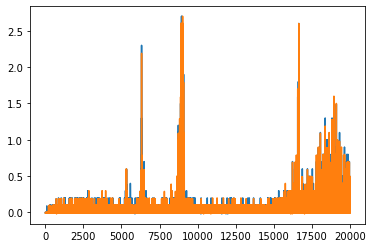

In [45]:
##Plot of score for each agent
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)

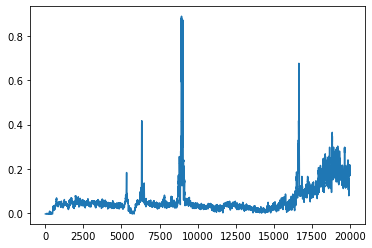

In [44]:
##Plot of average scores across agents
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg)

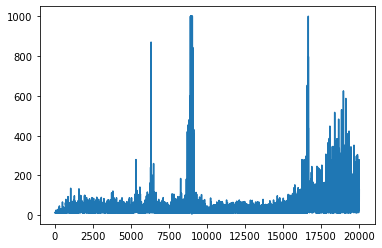

In [14]:
##Plot of steps taken at each episode
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(steps_taken)+1), steps_taken)

## Process Results 

Above deque average is over the scores of both agents for a given episode not the maximum score between both agents, therefore we recast the scores array to determine the maximum and recalculate the average over the past 100 episodes for every episode. An average score greater than 0.5 means the environment has been solved.

In [42]:
window = deque(maxlen=100)
window_avg = []
scores_max = []

for t in range(len(scores)):
    ##Calculate max score between agents for an episode
    score = np.amax(scores[t])
    
    ##Append max score to deque
    window.append(score)
    
    ##Append scores to arrays for plotting
    window_avg.append(np.mean(window))
    scores_max.append(score)
    
    ##Print episodes during which the solution was solved
    if np.mean(window) > 0.5:
        print(t)
    

8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050


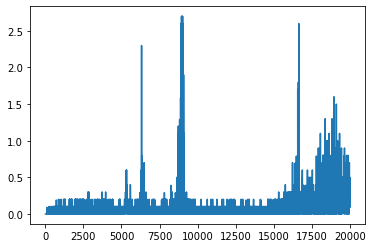

In [58]:
##Plot of max scores between agents
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_max)+1), scores_max)

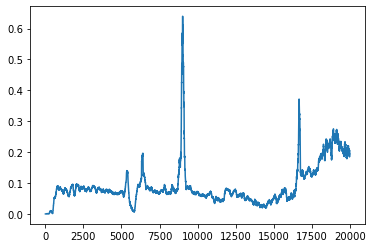

In [59]:
##Plot of average max score over last 100 episodes
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(window_avg)+1), window_avg)

## Performance Summary

As above, the environment was considered solved for the 73 episodes between 8,977 and 9,050. A maximum average score of 0.64 was achieved after approximately 5 hours of training time.

On episode 8,942 a maximum score of 2.7 was reached by one of the agents during a rally containing 53 successful shots and 1,000 actions taken by the agents.